In [1]:
# --- CONFIG (auto-inserted 2025-10-23T14:45:21.618535Z) ---
# Este bloque no altera el modelo ni los resultados; solo fija rutas/semilla y muestra versiones.
import os, random, sys
from pathlib import Path
import numpy as np

SEED = 42  # No cambia hiperpar√°metros; √∫salo solo si necesitas aleatoriedad consistente
os.environ.setdefault("PYTHONHASHSEED", str(SEED))
np.random.seed(SEED)
try:
    import torch
    torch.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
except Exception:
    pass

# Rutas recomendadas
DATA_DIR = Path(".")
DATASET_PATH = DATA_DIR / "bank-additional_bank-additional-full.csv"  # Aseg√∫rate de que el CSV est√© en el mismo directorio del notebook

# Mostrar versiones (√∫til para reproducibilidad)
def _show_versions():
    pkgs = ["python", "pandas", "numpy", "scikit-learn", "imbalanced-learn", "matplotlib", "seaborn", "scipy"]
    vers = {"python": sys.version.split()[0]}
    for pkg in pkgs[1:]:
        try:
            mod = __import__(pkg.replace("-", "_").replace("scikit-learn","sklearn"))
            vers[pkg] = getattr(mod, "__version__", "unknown")
        except Exception:
            vers[pkg] = "not installed"
    print("Versions:", vers)

_show_versions()
# --- FIN CONFIG ---


Versions: {'python': '3.12.7', 'pandas': '2.2.2', 'numpy': '1.26.4', 'scikit-learn': 'not installed', 'imbalanced-learn': 'not installed', 'matplotlib': '3.9.2', 'seaborn': '0.13.2', 'scipy': '1.13.1'}


In [2]:
# Chequeo r√°pido de dataset
from pathlib import Path
p = Path("bank-additional_bank-additional-full.csv")
assert p.exists(), f"No se encontr√≥ el dataset: {p.resolve()}. Ponlo junto al notebook."
print("OK: dataset encontrado:", p)

AssertionError: No se encontr√≥ el dataset: /Users/ramitafrita/Documents/Master Nuclio Data Analytics/TFM/TFM FIXED/bank-additional_bank-additional-full.csv. Ponlo junto al notebook.

## üìë Introducci√≥n

Este Notebook forma parte del **Trabajo Final de Data Analytics** aplicado a una empresa Fintech.  

El objetivo es **analizar los datos de campa√±as de marketing telef√≥nicas** realizadas entre 2018 y 2020, con el fin de identificar patrones, factores de √©xito y variables clave que influyen en la contrataci√≥n de un dep√≥sito a plazo fijo.  

En este documento se desarrollan los siguientes pasos iniciales del proyecto:  

1. **Tratamiento y exploraci√≥n inicial de los datos**  
   - Revisi√≥n de calidad del dataset.  
   - Identificaci√≥n de valores problem√°ticos (nulos, duplicados, categor√≠as desconocidas).  
   - Creaci√≥n de variables derivadas para enriquecer el an√°lisis.  

2. **An√°lisis exploratorio de variables (EDA)**  
   - Estudio de las variables demogr√°ficas, econ√≥micas y de contacto.  
   - Evaluaci√≥n de la respuesta de los clientes seg√∫n diferentes segmentos.  

3. **Cruce de variables clave**  
   - Identificaci√≥n de interacciones relevantes entre caracter√≠sticas del cliente y la respuesta a la campa√±a.  

4. **Modelo predictivo de conversi√≥n**
   - Construcci√≥n de modelos de predicci√≥n para estimar la probabilidad de conversi√≥n de un cliente (`y = yes`).  

El prop√≥sito de este an√°lisis exploratorio es **dejar preparado el terreno para las siguientes fases**:  
- Construcci√≥n de un modelo predictivo que estime la probabilidad de conversi√≥n.  
- Dise√±o de un dashboard ejecutivo con los principales KPIs de las campa√±as.  


# 1. Tratamiento y exploraci√≥n inicial de los datos

### 1.1 Importaci√≥n de librer√≠as

In [ ]:
#!pip install pandas as pd
#!pip install matplotlib as plt
#!pip install plotly as px
#!pip install seaborn as sns
#!pip install fuzzywuzzy as fw
#!pip install scipy as sp
#!pip install imbalanced-learn

In [ ]:
# Manipulaci√≥n y an√°lisis de datos
import pandas as pd
import numpy as np

# Visualizaci√≥n de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Expresiones regulares
import re
from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')

## 1.2 Carga de datos

In [ ]:
import os
CWD = os.getcwd()
DATA_PATH = os.path.join(CWD, "bank-additional_bank-additional-full.csv")

In [ ]:
url = DATA_PATH
df_tfm_inicial = pd.read_csv(url, sep=';')

## 1.3 Exploraci√≥n inicial

### - Funciones

In [ ]:
def check_df(df, tipo=''):
    if tipo == 'simple':
        print("¬øCu√°ntas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))

        print("¬øCu√°les son las primeras dos filas del conjunto de datos?")
        display(df.head(2))
        print('\n########################################################################################')
    else:
        print("¬øCu√°ntas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')

        print("¬øCu√°les son las primeras cinco filas del conjunto de datos?")
        display(df.head())
        print('\n########################################################################################')

        print("¬øCu√°les son las √∫ltimas cinco filas del conjunto de datos?")
        display(df.tail())
        print('\n########################################################################################')

        print("¬øC√≥mo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
        display(df.sample(n = 5))
        print('\n########################################################################################')

        print("¬øCu√°les son las columnas del conjunto de datos? ¬øCu√°l es el tipo de datos de cada columna?")
        print(df.dtypes)
        print('\n########################################################################################')

        print("¬øCu√°ntas columnas hay de cada tipo de datos?")
        print(df.dtypes.value_counts())
        print('\n########################################################################################')

        print("¬øCu√°les son las variables num√©ricas?")
        df_numericas = df.select_dtypes(include = 'number')
        columnas_numericas = list(df_numericas.columns)
        print(columnas_numericas)
        print('\n########################################################################################')

        print("¬øCu√°les son las variables categ√≥ricas?")
        df_categoricas = df.select_dtypes(include = 'object')
        columnas_categoricas = list(df_categoricas.columns)
        print(columnas_categoricas)
        print('\n########################################################################################')

        print("¬øCu√°ntos valores √∫nicos tiene cada columna?")
        print(df.nunique())
        print('\n########################################################################################')

        if len(columnas_numericas)>0:
            print("¬øCu√°les son las estad√≠sticas descriptivas b√°sicas de las columnas num√©ricas?")
            display(df.describe(include = 'number'))
            print('\n########################################################################################')

        if len(columnas_categoricas)>0:
            print("¬øCu√°les son las estad√≠sticas descriptivas b√°sicas de las columnas categ√≥ricas?")
            display(df.describe(include = 'object'))

In [ ]:
def identificacion_valores_problem(df, columnas=[]):
    print('###################################################################################')
    print('3.1.1. Proporci√≥n de NULOS en cada una de las columnas del conjunto de datos:')
    print(round((df.isnull().sum()/len(df))*100, 2).sort_values(ascending= False))
    print('###################################################################################')
    print(f'3.1.2. N√∫mero de DUPLICADOS totales: {df.duplicated().sum()}')
    print('###################################################################################')
    if len(columnas) > 0:
        print(f'3.1.2. N√∫mero de DUPLICADOS parciales seg√∫n las columnas {columnas}: {df.duplicated(subset=columnas).sum()}')
        print('###################################################################################')
    df_numericas = df.select_dtypes(include = 'number')
    columnas_numericas = list(df_numericas.columns)
    if len(columnas_numericas) > 0:
        print('3.1.3. Columnas num√©ricas con OUTLIERS')
        for var in columnas_numericas:
            Q1 = df[var].quantile(0.25)
            Q3 = df[var].quantile(0.75)
            limite_inferior = Q1 - 1.5 * (Q3 - Q1)
            limite_superior = Q3 + 1.5 * (Q3 - Q1)
            outliers = df[(df[var] < limite_inferior) | (df[var] > limite_superior)]
            print(f'N√∫mero de outliers en la columna "{var}": {outliers.shape[0]}')
        print('###################################################################################')

In [ ]:
def deteccion_outliers (df, columna):
    # Calcular Q1, Q3 e IQR
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir l√≠mites inferior y superior para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    print(f"Los valores at√≠picos se definen como aquellos que caen fuera del siguiente rango:")
    print(f"\t - L√≠mite inferior (considerado extremadamente bajo): {limite_inferior:.2f}")
    print(f"\t - L√≠mite superior (considerado extremadamente alto): {limite_superior:.2f}")

    # Identificar los outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

    print(f'N√∫mero de outliers en la columna "{columna}": {outliers.shape[0]}')
    return outliers

In [ ]:
def imputacion_nulos (df, variable):
    # media
    media = df[variable].mean()
    df[variable + '_media'] = df[variable].fillna(media)

    # mediana
    mediana = df[variable].median()
    df[variable + '_mediana'] = df[variable].fillna(mediana)

    # random
    valores_no_nulos = df[variable].dropna().values
    df[variable + '_random'] = df[variable].apply(lambda x: np.random.choice(valores_no_nulos) if pd.isna(x) else x)
    return df, [variable, variable + '_media', variable + '_mediana', variable + '_random']

### - Check inicial

In [ ]:
check_df(df_tfm_inicial)

¬øCu√°ntas filas y columnas hay en el conjunto de datos?
	Hay 41,188 filas y 21 columnas.

########################################################################################
¬øCu√°les son las primeras cinco filas del conjunto de datos?


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]


########################################################################################
¬øCu√°les son las √∫ltimas cinco filas del conjunto de datos?


age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[5 rows x 21 columns]


########################################################################################
¬øC√≥mo puedes obtener una muestra aleatoria de filas del conjunto de datos?


age          job  marital            education  default housing loan  \
35333   37   technician   single  professional.course       no     yes   no   
40381   47       admin.  married    university.degree       no      no   no   
19449   30   technician   single    university.degree       no     yes  yes   
6268    26     services   single             basic.9y       no     yes  yes   
31099   39  blue-collar  married             basic.9y  unknown      no  yes   

         contact month day_of_week  ...  campaign  pdays  previous  \
35333   cellular   may         fri  ...         3    999         0   
40381   cellular   aug         wed  ...         1      4         2   
19449   cellular   aug         thu  ...         3    999         0   
6268   telephone   may         tue  ...         2    999         0   
31099   cellular   may         wed  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
35333  nonexistent         -1.8          92.893          -46.2      1.250   
40381      success         -1.7          94.027          -38.3      0.900   
19449  nonexistent          1.4          93.444          -36.1      4.968   
6268   nonexistent          1.1          93.994          -36.4      4.857   
31099      failure         -1.8          92.893          -46.2      1.334   

       nr.employed    y  
35333       5099.1   no  
40381       4991.6  yes  
19449       5228.1  yes  
6268        5191.0   no  
31099       5099.1   no  

[5 rows x 21 columns]


########################################################################################
¬øCu√°les son las columnas del conjunto de datos? ¬øCu√°l es el tipo de datos de cada columna?
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

########################################################################################
¬øCu√°ntas columnas hay de cada tipo de datos?
object     11
int64       5
float64     5
Name: count, dtype: int64

#################################################

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000


########################################################################################
¬øCu√°les son las estad√≠sticas descriptivas b√°sicas de las columnas categ√≥ricas?


job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

### - Detecci√≥n de nulos

In [ ]:
identificacion_valores_problem(df_tfm_inicial, columnas = df_tfm_inicial.columns[0:])

###################################################################################
3.1.1. Proporci√≥n de NULOS en cada una de las columnas del conjunto de datos:
age               0.0
campaign          0.0
nr.employed       0.0
euribor3m         0.0
cons.conf.idx     0.0
cons.price.idx    0.0
emp.var.rate      0.0
poutcome          0.0
previous          0.0
pdays             0.0
duration          0.0
job               0.0
day_of_week       0.0
month             0.0
contact           0.0
loan              0.0
housing           0.0
default           0.0
education         0.0
marital           0.0
y                 0.0
dtype: float64
###################################################################################
3.1.2. N√∫mero de DUPLICADOS totales: 12
###################################################################################
3.1.2. N√∫mero de DUPLICADOS parciales seg√∫n las columnas Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact',

No hay valores nulos, por lo que no usaremos la funci√≥n imputacion_nulos()

### - Detectar y eliminar filas duplicadas

In [ ]:
# Dejo el codigo de los duplicados por si a caso
df_tfm_inicial.duplicated().sum()

np.int64(12)

In [ ]:
## Dejo el codigo de duplicados por columas (elegir columnas)
# df_tfm_inicial.iloc[:, 3:].duplicated().sum()

# Esto no se si tiene sentido, igual para la duraci√≥n de llamada, paro aun as√≠ puede ser que coincida. 

In [ ]:
# Eliminar filas duplicadas del dataframe original
df_tfm_sinduplicados = df_tfm_inicial.drop_duplicates()

# Mostrar informaci√≥n para verificar que el dataset est√° limpio
print("Resumen de limpieza de duplicados:")
print(f"‚Üí N√∫mero de filas en el dataframe original: {df_tfm_inicial.shape[0]}")
print(f"‚Üí N√∫mero de filas despu√©s de eliminar duplicados: {df_tfm_sinduplicados.shape[0]}")
print(f"‚Üí Total de filas eliminadas: {df_tfm_inicial.shape[0] - df_tfm_sinduplicados.shape[0]}")

Resumen de limpieza de duplicados:
‚Üí N√∫mero de filas en el dataframe original: 41188
‚Üí N√∫mero de filas despu√©s de eliminar duplicados: 41176
‚Üí Total de filas eliminadas: 12


In [ ]:
df_tfm_sinduplicados.sample(10)

age          job  marital            education  default housing loan  \
32074   38       admin.   single              unknown       no     yes   no   
13655   29  blue-collar   single             basic.9y       no     yes   no   
5963    41     services  married    university.degree       no     yes   no   
21844   29       admin.   single    university.degree       no     yes   no   
36713   29      student   single  professional.course       no      no   no   
9888    45  blue-collar  married             basic.6y  unknown     yes   no   
15102   51  blue-collar  married             basic.4y  unknown     yes   no   
35537   30   technician   single    university.degree       no      no   no   
15650   26       admin.  married          high.school       no     yes   no   
4334    42       admin.  married    university.degree  unknown      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
32074   cellular   may         fri  ...         1    999         0   
13655   cellular   jul         thu  ...         1    999         0   
5963   telephone   may         tue  ...         2    999         0   
21844   cellular   aug         wed  ...         1    999         0   
36713   cellular   jun         fri  ...         2    999         0   
9888   telephone   jun         wed  ...         1    999         0   
15102   cellular   jul         thu  ...         2    999         0   
35537   cellular   may         mon  ...         1    999         0   
15650   cellular   jul         mon  ...         4    999         0   
4334   telephone   may         tue  ...         1    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
32074  nonexistent         -1.8          92.893          -46.2      1.313   
13655  nonexistent          1.4          93.918          -42.7      4.963   
5963   nonexistent          1.1          93.994          -36.4      4.857   
21844  nonexistent          1.4          93.444          -36.1      4.964   
36713  nonexistent         -2.9          92.963          -40.8      1.268   
9888   nonexistent          1.4          94.465          -41.8      4.959   
15102  nonexistent          1.4          93.918          -42.7      4.958   
35537  nonexistent         -1.8          92.893          -46.2      1.244   
15650  nonexistent          1.4          93.918          -42.7      4.960   
4334   nonexistent          1.1          93.994          -36.4      4.856   

       nr.employed   y  
32074       5099.1  no  
13655       5228.1  no  
5963        5191.0  no  
21844       5228.1  no  
36713       5076.2  no  
9888        5228.1  no  
15102       5228.1  no  
35537       5099.1  no  
15650       5228.1  no  
4334        5191.0  no  

[10 rows x 21 columns]

### - Tratamiento de outliers

In [ ]:
# deteccion_outliers(df_tfm_sinduplicados,)

# PENDIENTE: GUILLE

### - Revisi√≥n de la columna default: Unknowns

In [ ]:
# Filtrar clientes con 'unknown' en la columna 'default'
clientes_unknown = df_tfm_sinduplicados[df_tfm_sinduplicados['default'] == 'unknown']
# Mostrar algunos ejemplos
clientes_unknown.sample(15)

age          job   marital            education  default housing loan  \
33071   46   technician  divorced  professional.course  unknown      no   no   
23143   48     services   married             basic.4y  unknown     yes   no   
21757   40       admin.  divorced    university.degree  unknown     yes   no   
3387    27  blue-collar   married             basic.4y  unknown      no   no   
11580   48  blue-collar   married             basic.9y  unknown      no   no   
10248   40       admin.    single          high.school  unknown      no   no   
20126   31       admin.   married    university.degree  unknown      no   no   
197     34  blue-collar    single             basic.9y  unknown      no   no   
16154   26  blue-collar    single             basic.6y  unknown     yes   no   
5820    26  blue-collar   married  professional.course  unknown     yes   no   
23822   48     services   married             basic.6y  unknown     yes   no   
11176   40     services   married              unknown  unknown      no   no   
11878   28  blue-collar   married              unknown  unknown      no   no   
19      39   management    single             basic.9y  unknown      no   no   
8997    40  blue-collar   married             basic.9y  unknown      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
33071   cellular   may         mon  ...         2    999         0   
23143   cellular   aug         tue  ...         1    999         0   
21757   cellular   aug         tue  ...         2    999         0   
3387   telephone   may         thu  ...         2    999         0   
11580  telephone   jun         fri  ...        10    999         0   
10248  telephone   jun         mon  ...         2    999         0   
20126   cellular   aug         mon  ...         1    999         0   
197    telephone   may         mon  ...         1    999         0   
16154   cellular   jul         tue  ...         2    999         0   
5820   telephone   may         mon  ...         2    999         0   
23822   cellular   aug         fri  ...         1    999         0   
11176  telephone   jun         thu  ...         6    999         0   
11878  telephone   jun         fri  ...         3    999         0   
19     telephone   may         mon  ...         1    999         0   
8997   telephone   jun         thu  ...        11    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
33071  nonexistent         -1.8          92.893          -46.2      1.299   
23143  nonexistent          1.4          93.444          -36.1      4.965   
21757  nonexistent          1.4          93.444          -36.1      4.963   
3387   nonexistent          1.1          93.994          -36.4      4.860   
11580  nonexistent          1.4          94.465          -41.8      4.959   
10248  nonexistent          1.4          94.465          -41.8      4.960   
20126  nonexistent          1.4          93.444          -36.1      4.965   
197    nonexistent          1.1          93.994          -36.4      4.857   
16154  nonexistent          1.4          93.918          -42.7      4.961   
5820   nonexistent          1.1          93.994          -36.4      4.857   
23822  nonexistent          1.4          93.444          -36.1      4.963   
11176  nonexistent          1.4          94.465          -41.8      4.961   
11878  nonexistent          1.4          94.465          -41.8      4.959   
19     nonexistent          1.1          93.994          -36.4      4.857   
8997   nonexistent          1.4          94.465          -41.8      4.866   

       nr.employed    y  
33071       5099.1   no  
23143       5228.1   no  
21757       5228.1   no  
3387        5191.0   no  
11580       5228.1   no  
10248       5228.1   no  
20126       5228.1   no  
197         5191.0   no  
16154       5228.1  yes  
5820        5191.0   no  
23822       5228.1   no  
11176       5228.1   no  
11878       5228.1   no  
19      

Entendemos que el valor Unknown no es un valor problem√°tico dentro del conjunto de datos, y constituye simplemente una falta de informaci√≥n recabada por el comercial. 

## 1.4 Tratamiento de datos

- Nueva columna con franja generacional para agrupar la variable de edad. 

In [ ]:
# Funci√≥n para clasificar por generaci√≥n
def get_generation(age):
    if 13 <= age <= 28:
        return 'Gen Z (<28)'
    elif 29 <= age <= 44:
        return 'Millennials (<44)'
    elif 45 <= age <= 60:
        return 'Gen X (<60)'
    elif 61 <= age <= 79:
        return 'Baby Boomers (<79)'
    elif 80 <= age <= 97:
        return 'Silent Generation (<97)'
    else:
        return 'Other'

# Crear la columna 'generation'
df_tfm_sinduplicados['generation'] = df_tfm_sinduplicados['age'].apply(get_generation)

In [ ]:
# # Crear una columna de generaci√≥n seg√∫n la edad
# bins = [0, 25, 40, 55, 75, 100]
# labels = ['Gen Z (<25)', 'Millennials (25-40)', 'Gen X (40-55)', 'Boomers (55-75)', '>75']
# df_tfm_sinduplicados['generacion'] = pd.cut(df_tfm_sinduplicados['age'], bins=bins, labels=labels, right=False)

# Lo quito porque repite lo de antes y no cuadran los n√∫meros. Solo trabajaremos con una. 

In [ ]:
# Crear resumen agrupado
age_summary = df_tfm_sinduplicados.groupby('generation').agg(
    total_yes = ('y', lambda x: (x == 'yes').sum()),
    total_registros = ('y', 'count')
).reset_index()

# Calcular el porcentaje de yes
age_summary['porcentaje_yes'] = (age_summary['total_yes'] / age_summary['total_registros']) * 100

In [ ]:
df_analisis = df_tfm_sinduplicados

## 1.5 Visualizaci√≥n de ratio de √©xito 

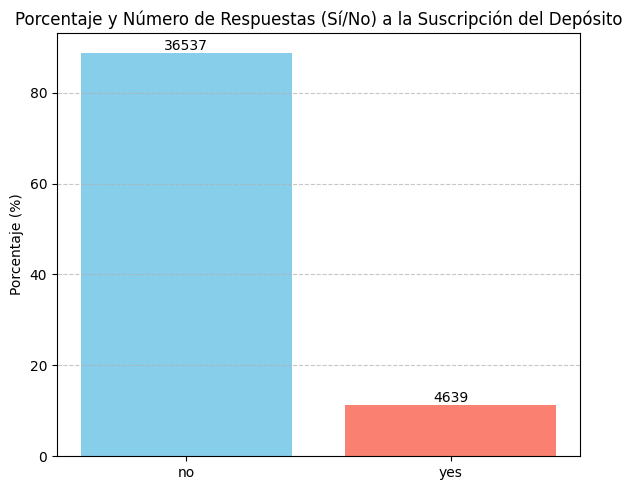

In [ ]:
# Calcular el n√∫mero absoluto y porcentaje de √©xito de la campa√±a 
y_counts_abs = df_analisis['y'].value_counts()
y_counts_percent = df_analisis['y'].value_counts(normalize=True) * 100

# Crear el gr√°fico
plt.figure(figsize=(6, 5))
bars = plt.bar(y_counts_abs.index, y_counts_percent, color=['skyblue', 'salmon'])

# A√±adir etiquetas con el n√∫mero de observaciones
for bar, count in zip(bars, y_counts_abs):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0, f'{count}', ha='center', va='bottom')

plt.title('Porcentaje y N√∫mero de Respuestas (S√≠/No) a la Suscripci√≥n del Dep√≥sito')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 1.6 Conclusiones iniciales 

- **Tama√±o inicial**: 41.188 filas √ó 21 columnas.
- **Nulos**: no hay columnas con nulos.
- **Duplicados exactos**: 12.
- **Unknown en categ√≥ricas (top)**: `default` 8.597, `education` 1.731, `housing` 990, `loan` 990, `job` 330, `marital` 80.
- **Objetivo (`y`)**: 4.640 *yes* (11,27%) vs 36.548 *no*.

- **Tratamiento recomendado**:
  - Mantener `duration` sin imputaci√≥n.
  - Tratar 'unknown' como categor√≠a expl√≠cita.
  - Eliminar duplicados exactos (12 filas).
  - A√±adir franjas generacionales derivadas de `age`.


# 2. An√°lisis de variables

En esta secci√≥n realizamos un **An√°lisis Exploratorio de Datos (EDA)** detallado para comprender c√≥mo se comportan las variables del dataset y cu√°l podr√≠a ser su relaci√≥n con la contrataci√≥n de un dep√≥sito a plazo fijo (`y`).  

Las variables se pueden agrupar en los siguientes bloques:

1. **Variables demogr√°ficas del cliente**  
   - `age` -> Edad del cliente.  
   - `job` -> Tipo de trabajo.  
   - `marital` -> Estado civil.  
   - `education` -> Nivel educativo.  

2. **Situaci√≥n financiera del cliente**  
   - `default` -> Historial de cr√©dito en default.  
   - `housing` -> Pr√©stamo hipotecario.  
   - `loan` -> Pr√©stamo personal.  

3. **Caracter√≠sticas de la campa√±a de marketing**  
   - `contact` -> Canal de contacto utilizado (m√≥vil, tel√©fono fijo).  
   - `month` -> √öltimo mes de contacto.  
   - `day_of_week` -> D√≠a de la semana del √∫ltimo contacto.  
   - `duration` -> Duraci√≥n de la √∫ltima llamada (en segundos).  
   - `campaign` -> N√∫mero de contactos realizados en la campa√±a actual.  
   - `pdays` -> D√≠as transcurridos desde la √∫ltima campa√±a (999 = no contactado).  
   - `previous` -> N√∫mero de contactos en campa√±as anteriores.  
   - `poutcome` -> Resultado de la campa√±a anterior.  

4. **Indicadores macroecon√≥micos**  
   - `emp.var.rate` -> Tasa de variaci√≥n del empleo (trimestral).  
   - `cons.price.idx` -> √çndice de precios al consumidor (mensual).  
   - `cons.conf.idx` -> √çndice de confianza del consumidor (mensual).  
   - `euribor3m` -> Tipo de inter√©s Euribor a 3 meses (diario).  
   - `nr.employed` -> N√∫mero de empleados (trimestral).  

En esta fase se analizar√°n las **distribuciones, frecuencias y tasas de conversi√≥n** asociadas a cada variable y grupo, con el objetivo de detectar patrones relevantes que nos permitan identificar los segmentos de clientes con mayor probabilidad de suscripci√≥n.  

El an√°lisis servir√° tambi√©n para **priorizar variables clave** que se utilizar√°n m√°s adelante en el **modelo predictivo** y en el **dashboard ejecutivo**.

_____________________________________
De manera visual, profundizaremos en las estadisticas descriptivas y en las hip√≥tesis que se pueden derivar de entender bien cada variable. 

In [ ]:
## Funci√≥n 1 transformar a tabla 
## Funci√≥n 2 transformar a gr√°fico 
## Funci√≥n 3 mostras varios gr√°ficos juntos 
## Funci√≥n 4 conclusiones 

In [ ]:
# Descripci√≥n + hip√≥tesis de todas las variables del grupo 
# Gr√°ficos
# Resultados observados, validaci√≥n o desestimaci√≥n de la hip√≥teisis
# Interpretaci√≥n de negocio

## - Funciones de Resumen de Variables

Para analizar c√≥mo se comporta cada variable frente al objetivo `y` (si el cliente contrat√≥ un dep√≥sito: *yes* / *no*), se ha creado 3 funciones reutilizables, con el objetivo de:  
- Analizar las variables categ√≠cas.
- Analizar las variables num√©ricas.
- Visualizar resultados. 
- Extraer conclusiones. 



In [ ]:
## NIVEL 0 ##

# Funci√≥n de distribuci√≥n de catrgor√≠as (Rami) 

def variable_numerica(df, col, bins=10):
    """
    Muestra resumen estad√≠stico y gr√°fico de una variable num√©rica.
    """

    print(f"### An√°lisis de {col}\n")
    print(df[col].describe())

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma
    sns.histplot(df[col], bins=bins, kde=False, ax=ax[0], color="skyblue", edgecolor="black")
    ax[0].set_title(f"Distribuci√≥n de {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=ax[1], color="lightgray")
    ax[1].set_title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()


def variable_categorica(df, col):
    """
    Muestra frecuencias y gr√°fico de una variable categ√≥rica.
    """

    print(f"### An√°lisis de {col}\n")
    print(df[col].value_counts(normalize=True).round(3))

    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette="pastel", edgecolor="black")
    plt.title(f"Distribuci√≥n de {col}")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
## NIVEL 1 ##

# Funci√≥n resumen_categ√≥rica #

# Columnas que devuelven:  
#   - `total_registros` ‚Üí n√∫mero total de clientes en cada categor√≠a.  
#   - `total_yes` ‚Üí cu√°ntos de esos clientes contrataron (*yes*).  
#   - `porcentaje_yes` ‚Üí tasa de conversi√≥n (%yes).  
#   - `porcentaje_total` ‚Üí qu√© % representa esa categor√≠a sobre el total.  

# - Para qu√© sirven:  
#   - Identificar qu√© categor√≠as tienen **mayor tasa de conversi√≥n**.  
#   - Detectar cu√°les son las m√°s representativas en volumen.  
#   - Decidir d√≥nde enfocar campa√±as: volumen vs eficiencia.
    
def resumen_categorica(df, var, target="y"):

    resumen = df.groupby(var).agg(
        total_registros=(target, "count"),
        total_yes=(target, lambda x: (x == "yes").sum())
    ).reset_index()

    resumen["porcentaje_yes"] = (resumen["total_yes"] / resumen["total_registros"]) * 100
    resumen["porcentaje_total"] = (resumen["total_registros"] / resumen["total_registros"].sum()) * 100

    return resumen.sort_values(by="porcentaje_yes", ascending=False).reset_index(drop=True)


In [ ]:
## Funci√≥n resumen num√©rica ## 

# Calcula resumen para una variable num√©rica binned:
#   - bins de la variable
#   - total de registros
#   - total de 'yes'
#   - porcentaje de 'yes'
#   - porcentaje de representatividad sobre el total

#### Confirmar que es necesaria ####

def resumen_numerica(df, var, target="y", bins=10):
    
    tmp = df.copy()
    tmp["_bin"] = pd.qcut(tmp[var], bins, duplicates="drop")
    
    resumen = tmp.groupby("_bin").agg(
        total_registros=(target, "count"),
        total_yes=(target, lambda x: (x == "yes").sum())
    ).reset_index()

    resumen["porcentaje_yes"] = (resumen["total_yes"] / resumen["total_registros"]) * 100
    resumen["porcentaje_total"] = (resumen["total_registros"] / resumen["total_registros"].sum()) * 100

    return resumen.sort_values(by="_bin").reset_index(drop=True)


In [ ]:
## NIVEL 2 ##

# Funci√≥n para visualizar los datos de resumen de una √∫nica variable en una gr√°fica. 

# Genera un gr√°fico combinado para variables categ√≥ricas:
#   - Barras = total de 'yes' por categor√≠a
#   - L√≠nea = % de 'yes' (tasa de conversi√≥n) por categor√≠a

# Usaremos este paso para no crear tablas resumen y visualizar directamente los datos. 

def plot_resumen_categorica(df, var, target="y"):

# Paso 1: Se repite el paso de crear la tabla resumen, para poder construir el gr√°fico.
    # Construir el resumen
    resumen = df.groupby(var).agg(
        total_registros=(target, "count"),
        total_yes=(target, lambda x: (x == "yes").sum())
    ).reset_index()
    
    resumen["porcentaje_yes"] = (resumen["total_yes"] / resumen["total_registros"]) * 100
    
    # Ordenar categor√≠as de mayor a menor %yes
    resumen = resumen.sort_values(by="porcentaje_yes", ascending=False).reset_index(drop=True)

# Paso 2: Crear gr√°fico # 
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Barras: total de yes
    color = "tab:blue"
    ax1.set_xlabel(var)
    ax1.set_ylabel("Total de Yes", color=color)
    bars = ax1.bar(resumen[var], resumen["total_yes"], color=color)
    ax1.tick_params(axis="y", labelcolor=color)
    ax1.set_xticklabels(resumen[var], rotation=45, ha="right")

    # L√≠nea: porcentaje de yes
    ax2 = ax1.twinx()
    color = "tab:red"
    ax2.set_ylabel("% Yes", color=color)
    ax2.plot(resumen[var], resumen["porcentaje_yes"], color=color, marker="o")
    ax2.tick_params(axis="y", labelcolor=color)

    plt.title(f"Total 'Yes' y %Yes por {var}")
    plt.tight_layout()
    plt.show()
    
    return resumen


In [ ]:
# prueba: 
# plot_resumen_categorica(df_analisis, "generation", target="y")

In [ ]:
# Igual que la anterior funci√≥n, pero agrupa varios gr√°ficos de una √∫nica vez,
# para visualizar todas las variables de cada categor√≠a con multiples subplots. 

def plot_resumen_categorica_ax(df, var, ax, target="y", rot=45):
#     Dibuja en 'ax' usando el resumen de tu funci√≥n resumen_categorica().
#     Barras = total_yes ; L√≠nea = %yes

    data = resumen_categorica(df, var, target=target)  # reutiliza tu funci√≥n
    x = np.arange(len(data))

    ax2 = ax.twinx()

    # Barras: total_yes
    ax.bar(x, data["total_yes"])
    ax.set_ylabel("Total Yes")
    ax.set_xlabel(var)
    ax.set_xticks(x)
    ax.set_xticklabels(data[var], rotation=rot, ha="right")

    # L√≠nea: %yes
    ax2.plot(x, data["porcentaje_yes"], marker="o",color = "tab:red")
    ax2.set_ylabel("% Yes")

    ax.set_title(f"{var}: Total Yes y %Yes")
    for i, v in enumerate(data["total_yes"]):
        ax.text(i, v, f"{int(v)}", ha="center", va="bottom", fontsize=8)


def plot_resumen_numerica(df, var, ax, target="y", bins=6, rot=45):
    
    # Dibuja en 'ax' usando el resumen de tu funci√≥n resumen_numerica().
    # Barras = total_yes por bin ; L√≠nea = %yes por bin
    
    data = resumen_numerica(df, var, target=target, bins=bins)  # reutiliza tu funci√≥n
    # En tu implementaci√≥n, la columna de bins se llama "_bin"
    bin_col = "_bin" if "_bin" in data.columns else var
    xlabels = data[bin_col].astype(str).tolist()
    x = np.arange(len(data))

    ax2 = ax.twinx()

    # Barras: total_yes por bin
    ax.bar(x, data["total_yes"])
    ax.set_xticks(x)
    ax.set_xticklabels(xlabels, rotation=rot, ha="right")
    ax.set_ylabel("Total Yes")
    ax.set_xlabel(var)

    # L√≠nea: %yes por bin
    ax2.plot(x, data["porcentaje_yes"], marker="o")
    ax2.set_ylabel("% Yes")

    ax.set_title(f"{var} (bins): Total Yes y %Yes")
    for i, v in enumerate(data["total_yes"]):
        ax.text(i, v, f"{int(v)}", ha="center", va="bottom", fontsize=8)


In [ ]:
## NIVEL 3 ##

# Funci√≥n de conclusiones.  

    # Genera texto Markdown con:
    # Resultados observados
    # - Distribuci√≥n (top por %total)
    # - Tasa de conversi√≥n (top por %yes)

    # Interpretaci√≥n de negocio
    # - Segmentos de alto impacto (volumen alto + %yes > baseline)
    # - Segmentos a optimizar (volumen alto + %yes < baseline)
    # - Nichos rentables (volumen bajo + %yes alto)


def conclusiones_categorica(df, var, target="y", min_pct_total=5.0, top_k=3, mostrar=True):
    
    base = 100.0 * (df[target].astype(str).str.lower() == "yes").mean()
    tab = resumen_categorica(df, var, target)  # usa tu funci√≥n

    # Mapear nombres por si var√≠a el casing
    cols = {c.lower(): c for c in tab.columns}
    pct_yes = cols.get("porcentaje_yes", "porcentaje_yes")
    pct_total = cols.get("porcentaje_total", "porcentaje_total")

    # TOP volumen y TOP conversi√≥n
    top_vol = tab.sort_values(pct_total, ascending=False).head(top_k)
    top_conv = tab.sort_values(pct_yes, ascending=False).head(top_k)

    # Alto impacto (volumen relevante + conversi√≥n > baseline)
    alto_impacto = tab[(tab[pct_total] >= min_pct_total) & (tab[pct_yes] > base)] \
        .sort_values([pct_yes, pct_total], ascending=[False, False])

    # A optimizar (volumen relevante + conversi√≥n < baseline)
    optimizar = tab[(tab[pct_total] >= min_pct_total) & (tab[pct_yes] < base)] \
        .sort_values([pct_total, pct_yes], ascending=[False, True])

    # Nichos (volumen bajo + alta conversi√≥n)
    nichos = tab[tab[pct_total] < min_pct_total].sort_values(pct_yes, ascending=False).head(top_k)

    from IPython.display import Markdown, display

    def _fmt_pct(x, dec=1):
        try:
            return f"{float(x):.{dec}f}%"
        except Exception:
            return "-"

    md = [f"### Variable: **{var}**",
          "#### üìä Resultados observados",
          f"- **Baseline conversi√≥n**: " + _fmt_pct(base),
          f"- **Top volumen**: " + ", ".join([f"`{r[var]}` ({_fmt_pct(r[pct_total])})" for _, r in top_vol.iterrows()]) if len(top_vol) else "-",
          f"- **Top conversi√≥n**: " + ", ".join([f"`{r[var]}` ({_fmt_pct(r[pct_yes])})" for _, r in top_conv.iterrows()]) if len(top_conv) else "-",
          "",
          "#### üìà Interpretaci√≥n de negocio"]

    if len(alto_impacto):
        md.append("- **Segmentos de alto impacto** (volumen alto y conversi√≥n > baseline): " +
                  ", ".join([f"`{r[var]}` ({_fmt_pct(r[pct_total])} del total, {_fmt_pct(r[pct_yes])} conv.)"
                             for _, r in alto_impacto.iterrows()]))
    else:
        md.append("- **Segmentos de alto impacto**: no se identifican con el umbral actual.")

    if len(optimizar):
        md.append("- **Segmentos a optimizar** (volumen alto pero conversi√≥n < baseline): " +
                  ", ".join([f"`{r[var]}` ({_fmt_pct(r[pct_total])} del total, {_fmt_pct(r[pct_yes])} conv.)"
                             for _, r in optimizar.head(top_k).iterrows()]))
    else:
        md.append("- **Segmentos a optimizar**: no se identifican con el umbral actual.")

    if len(nichos):
        md.append("- **Nichos potencialmente rentables** (volumen bajo pero alta conversi√≥n): " +
                  ", ".join([f"`{r[var]}` ({_fmt_pct(r[pct_total])} del total, {_fmt_pct(r[pct_yes])} conv.)"
                             for _, r in nichos.iterrows()]))
    else:
        md.append("- **Nichos potencialmente rentables**: no destacables con el umbral actual.")

    text = "\n".join(md)
    if mostrar:
        display(Markdown(text))
    return


## 2.1 Variables demogr√°ficas del cliente

- `age` -> Edad del cliente.  
- `job` -> Tipo de trabajo.  
- `marital` -> Estado civil.  
- `education` -> Nivel educativo.  

---

## Hip√≥tesis de cada variable

**Edad**: Representa la edad del cliente en a√±os. Es un factor clave que refleja la etapa de la vida y la capacidad de ahorro/inversi√≥n.
- Hip√≥tesis: 
  - J√≥venes (<25) -> menor propensi√≥n a contratar dep√≥sitos (menores ingresos, m√°s gasto en consumo).  
  - Adultos (25‚Äì55) -> mayor capacidad de ahorro, target principal de las campa√±as.  
  - Mayores (>65) -> pueden valorar seguridad de dep√≥sitos como complemento de pensi√≥n.  


**Tipo de Trabajo**: Identifica el sector o tipo de empleo del cliente. Refleja estabilidad laboral, ingresos y estilo de vida.
- Hip√≥tesis: 
  - Profesionales cualificados (admin., technician) -> mayor estabilidad, m√°s propensos a contratar dep√≥sitos.  
  - Trabajadores manuales (blue-collar) -> menor propensi√≥n por ingresos menos estables.  
  - Estudiantes y desempleados -> baja capacidad de ahorro.  
  - Jubilados (retired) -> potencial inter√©s en productos seguros de renta fija.  


**Estado Civil**:
Refleja el estado civil del cliente, que influye en sus responsabilidades econ√≥micas y prioridades de ahorro.
- Hip√≥tesis:
  - Casados -> mayor propensi√≥n (responsabilidades familiares, buscan estabilidad).  
  - Solteros -> autonom√≠a en ingresos, pueden priorizar consumo o riesgo.  
  - Divorciados/viudos -> necesidades espec√≠ficas (pensi√≥n, estabilidad).  


**Nivel Educativo**: Mide el nivel de estudios alcanzado por el cliente. Suele estar correlacionado con nivel de ingresos y cultura financiera.
- Hip√≥tesis:
  - Universitarios -> mayor propensi√≥n a contratar dep√≥sitos (mejor cultura financiera, ingresos m√°s altos).  
  - Educaci√≥n secundaria -> intermedia.  
  - Educaci√≥n b√°sica o desconocida -> menor inter√©s o capacidad de ahorro. 

### An√°lisis de age

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


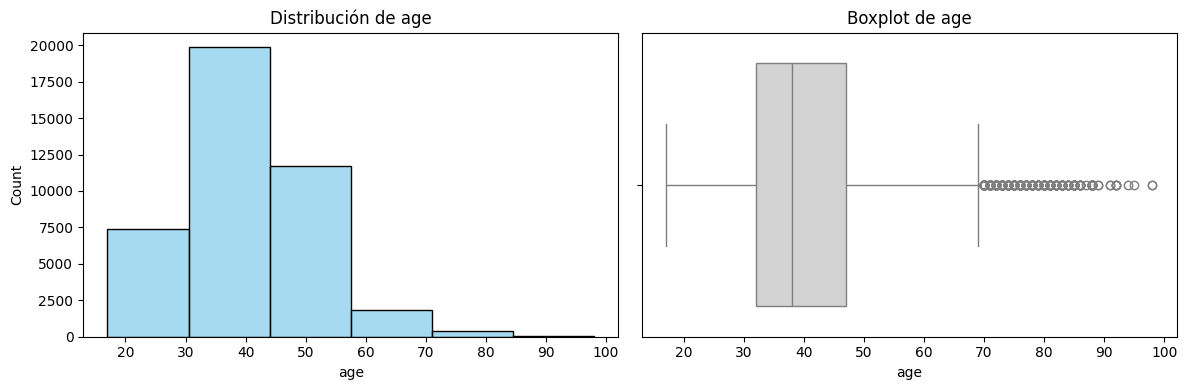

### An√°lisis de job

job
admin.           0.253
blue-collar      0.225
technician       0.164
services         0.096
management       0.071
retired          0.042
entrepreneur     0.035
self-employed    0.035
housemaid        0.026
unemployed       0.025
student          0.021
unknown          0.008
Name: proportion, dtype: float64


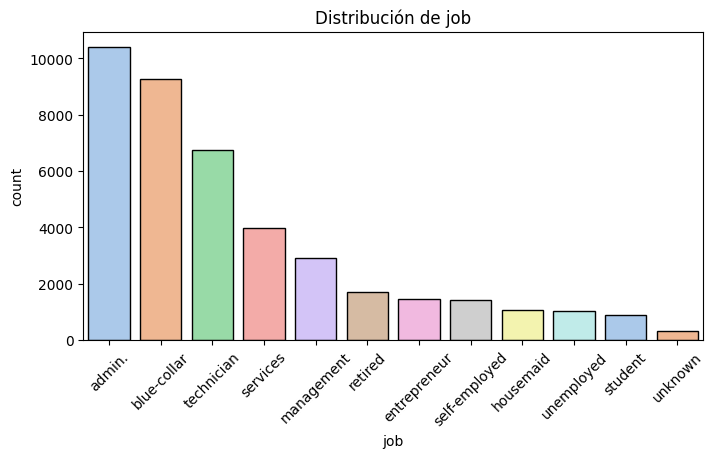

### An√°lisis de education

education
university.degree      0.295
high.school            0.231
basic.9y               0.147
professional.course    0.127
basic.4y               0.101
basic.6y               0.056
unknown                0.042
illiterate             0.000
Name: proportion, dtype: float64


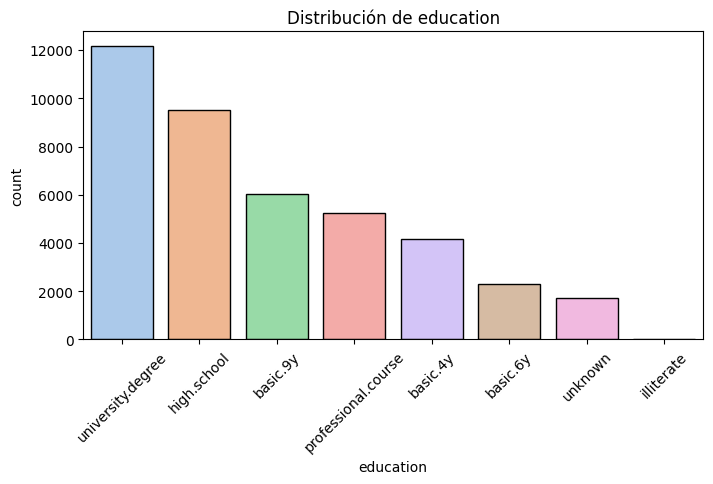

### An√°lisis de marital

marital
married     0.605
single      0.281
divorced    0.112
unknown     0.002
Name: proportion, dtype: float64


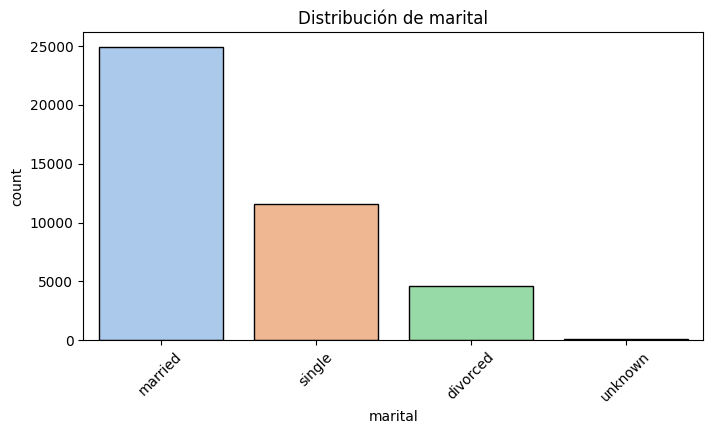

In [ ]:
# Distribuci√≥n de categor√≠as: 

# Edad (num√©rica)
_ = variable_numerica(df_analisis, "age", bins=6)

# Job (categ√≥rica)
_ = variable_categorica(df_analisis, "job")

# Education (categ√≥rica)
_ = variable_categorica(df_analisis, "education")

# Marital (categ√≥rica)
_ = variable_categorica(df_analisis, "marital")

In [ ]:
# ==============================
# An√°lisis Variables Demogr√°ficas
# ==============================

# Edad (agurpada por generaci√≥n)
print("### Edad (age)")
display(resumen_categorica(df_analisis, "generation")) 

# Tipo de trabajo (categ√≥rica)
print("### Tipo de Trabajo (job)")
display(resumen_categorica(df_analisis, "job"))

# Estado civil (categ√≥rica)
print("### Estado Civil (marital)")
display(resumen_categorica(df_analisis, "marital"))

# Nivel educativo (categ√≥rica)
print("### Nivel Educativo (education)")
display(resumen_categorica(df_analisis, "education"))


### Edad (age)


generation  total_registros  total_yes  porcentaje_yes  \
0                    Other                2          2      100.000000   
1  Silent Generation (<97)              148         75       50.675676   
2       Baby Boomers (<79)              759        337       44.400527   
3              Gen Z (<28)             4214        736       17.465591   
4        Millennials (<44)            24032       2354        9.795273   
5              Gen X (<60)            12021       1135        9.441810   

   porcentaje_total  
0          0.004857  
1          0.359433  
2          1.843307  
3         10.234117  
4         58.364096  
5         29.194191

### Tipo de Trabajo (job)


job  total_registros  total_yes  porcentaje_yes  \
0         student              875        275       31.428571   
1         retired             1718        434       25.261932   
2      unemployed             1014        144       14.201183   
3          admin.            10419       1351       12.966695   
4      management             2924        328       11.217510   
5         unknown              330         37       11.212121   
6      technician             6739        730       10.832468   
7   self-employed             1421        149       10.485574   
8       housemaid             1060        106       10.000000   
9    entrepreneur             1456        124        8.516484   
10       services             3967        323        8.142173   
11    blue-collar             9253        638        6.895061   

    porcentaje_total  
0           2.125024  
1           4.172333  
2           2.462600  
3          25.303575  
4           7.101224  
5           0.801438  
6          16.366330  
7           3.451039  
8           2.574315  
9           3.536040  
10          9.634253  
11         22.471828

### Estado Civil (marital)


marital  total_registros  total_yes  porcentaje_yes  porcentaje_total
0   unknown               80         12       15.000000          0.194288
1    single            11564       1620       14.008993         28.084321
2  divorced             4611        476       10.323140         11.198271
3   married            24921       2531       10.156093         60.523120

### Nivel Educativo (education)


education  total_registros  total_yes  porcentaje_yes  \
0           illiterate               18          4       22.222222   
1              unknown             1730        251       14.508671   
2    university.degree            12164       1669       13.720816   
3  professional.course             5240        595       11.354962   
4          high.school             9512       1031       10.838940   
5             basic.4y             4176        428       10.249042   
6             basic.6y             2291        188        8.206024   
7             basic.9y             6045        473        7.824648   

   porcentaje_total  
0          0.043715  
1          4.201477  
2         29.541480  
3         12.725860  
4         23.100835  
5         10.141830  
6          5.563921  
7         14.680882

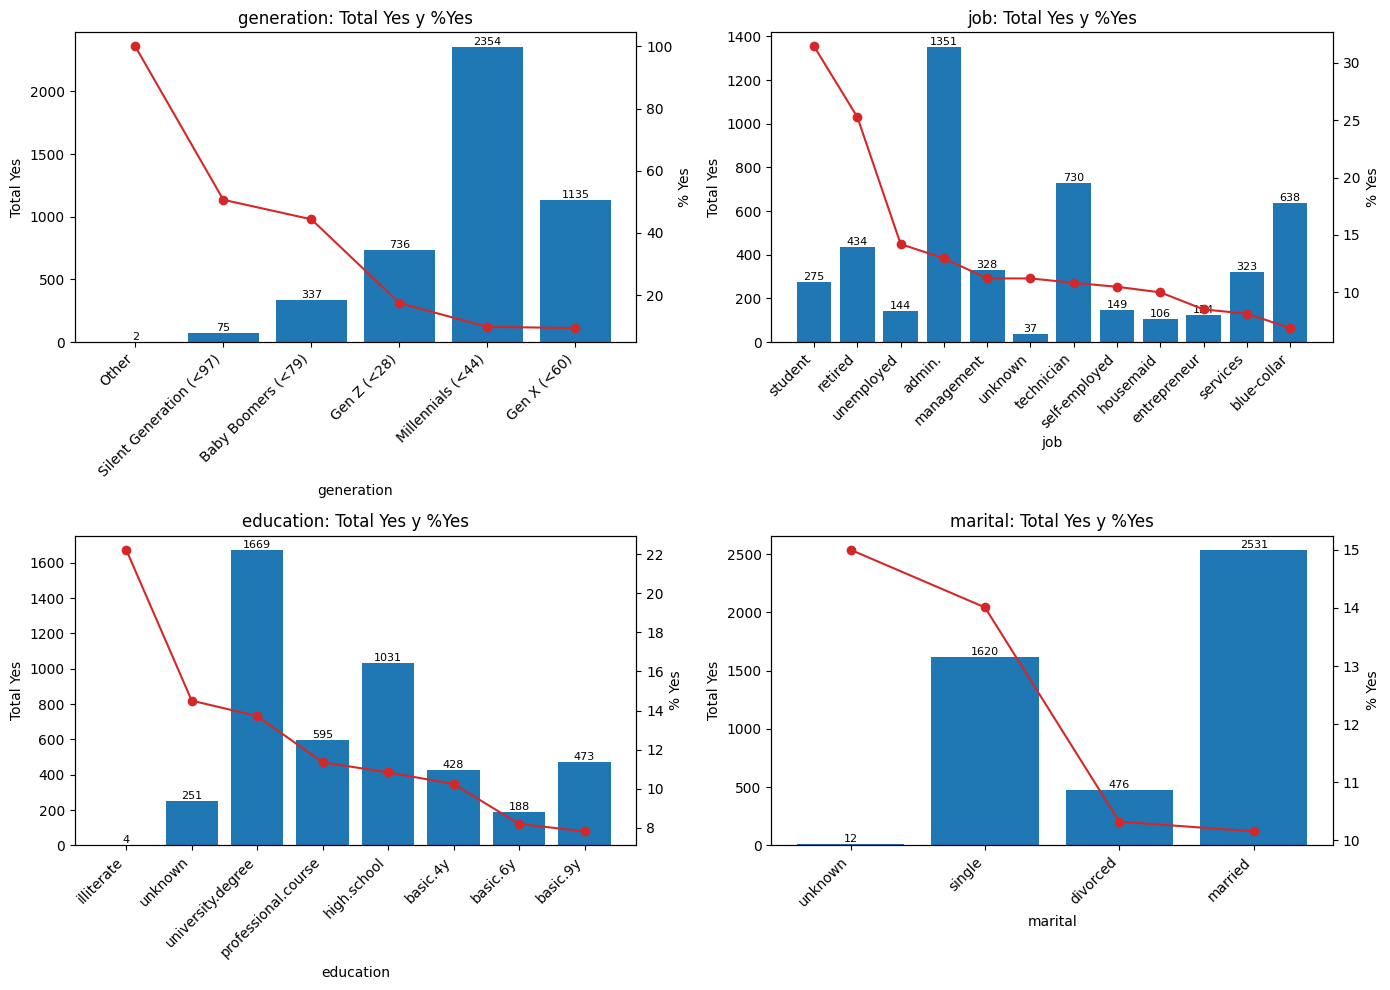

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1) Edad (num√©rica)
plot_resumen_categorica_ax(df_analisis, "generation", axes[0, 0])

# 2) Job (categ√≥rica)
plot_resumen_categorica_ax(df_analisis, "job", axes[0, 1])

# 3) Education (categ√≥rica)
plot_resumen_categorica_ax(df_analisis, "education", axes[1, 0])

# 4) Marital (categ√≥rica)
plot_resumen_categorica_ax(df_analisis, "marital", axes[1, 1])

plt.tight_layout()
plt.show()

In [ ]:
# Edad (num√©rica)
_ = conclusiones_categorica(df_analisis, "generation")

# Job (categ√≥rica)
_ = conclusiones_categorica(df_analisis, "job")

# Education (categ√≥rica)
_ = conclusiones_categorica(df_analisis, "education")

# Marital (categ√≥rica)
_ = conclusiones_categorica(df_analisis, "marital")

### Variable: **generation**
#### üìä Resultados observados
- **Baseline conversi√≥n**: 11.3%
- **Top volumen**: `Millennials (<44)` (58.4%), `Gen X (<60)` (29.2%), `Gen Z (<28)` (10.2%)
- **Top conversi√≥n**: `Other` (100.0%), `Silent Generation (<97)` (50.7%), `Baby Boomers (<79)` (44.4%)

#### üìà Interpretaci√≥n de negocio
- **Segmentos de alto impacto** (volumen alto y conversi√≥n > baseline): `Gen Z (<28)` (10.2% del total, 17.5% conv.)
- **Segmentos a optimizar** (volumen alto pero conversi√≥n < baseline): `Millennials (<44)` (58.4% del total, 9.8% conv.), `Gen X (<60)` (29.2% del total, 9.4% conv.)
- **Nichos potencialmente rentables** (volumen bajo pero alta conversi√≥n): `Other` (0.0% del total, 100.0% conv.), `Silent Generation (<97)` (0.4% del total, 50.7% conv.), `Baby Boomers (<79)` (1.8% del total, 44.4% conv.)

### Variable: **job**
#### üìä Resultados observados
- **Baseline conversi√≥n**: 11.3%
- **Top volumen**: `admin.` (25.3%), `blue-collar` (22.5%), `technician` (16.4%)
- **Top conversi√≥n**: `student` (31.4%), `retired` (25.3%), `unemployed` (14.2%)

#### üìà Interpretaci√≥n de negocio
- **Segmentos de alto impacto** (volumen alto y conversi√≥n > baseline): `admin.` (25.3% del total, 13.0% conv.)
- **Segmentos a optimizar** (volumen alto pero conversi√≥n < baseline): `blue-collar` (22.5% del total, 6.9% conv.), `technician` (16.4% del total, 10.8% conv.), `services` (9.6% del total, 8.1% conv.)
- **Nichos potencialmente rentables** (volumen bajo pero alta conversi√≥n): `student` (2.1% del total, 31.4% conv.), `retired` (4.2% del total, 25.3% conv.), `unemployed` (2.5% del total, 14.2% conv.)

### Variable: **education**
#### üìä Resultados observados
- **Baseline conversi√≥n**: 11.3%
- **Top volumen**: `university.degree` (29.5%), `high.school` (23.1%), `basic.9y` (14.7%)
- **Top conversi√≥n**: `illiterate` (22.2%), `unknown` (14.5%), `university.degree` (13.7%)

#### üìà Interpretaci√≥n de negocio
- **Segmentos de alto impacto** (volumen alto y conversi√≥n > baseline): `university.degree` (29.5% del total, 13.7% conv.), `professional.course` (12.7% del total, 11.4% conv.)
- **Segmentos a optimizar** (volumen alto pero conversi√≥n < baseline): `high.school` (23.1% del total, 10.8% conv.), `basic.9y` (14.7% del total, 7.8% conv.), `basic.4y` (10.1% del total, 10.2% conv.)
- **Nichos potencialmente rentables** (volumen bajo pero alta conversi√≥n): `illiterate` (0.0% del total, 22.2% conv.), `unknown` (4.2% del total, 14.5% conv.)

### Variable: **marital**
#### üìä Resultados observados
- **Baseline conversi√≥n**: 11.3%
- **Top volumen**: `married` (60.5%), `single` (28.1%), `divorced` (11.2%)
- **Top conversi√≥n**: `unknown` (15.0%), `single` (14.0%), `divorced` (10.3%)

#### üìà Interpretaci√≥n de negocio
- **Segmentos de alto impacto** (volumen alto y conversi√≥n > baseline): `single` (28.1% del total, 14.0% conv.)
- **Segmentos a optimizar** (volumen alto pero conversi√≥n < baseline): `married` (60.5% del total, 10.2% conv.), `divorced` (11.2% del total, 10.3% conv.)
- **Nichos potencialmente rentables** (volumen bajo pero alta conversi√≥n): `unknown` (0.2% del total, 15.0% conv.)

---
---

Validaci√≥n de hip√≥tesis: 

## 1
## 2
## 3

## 2.2 Situaci√≥n financiera del cliente

- `default` -> Cliente con cr√©ditos impagados.  
- `housing` -> Si el cliente tiene hipoteca.  
- `loan` -> Si el cliente tiene pr√©stamo personal.  

---

## Hip√≥tesis de cada variable

**Cr√©ditos impagados (default)**: Indica si el cliente tiene deudas vencidas.  
- Hip√≥tesis:  
  - `yes` -> menor probabilidad de contratar, dado que refleja riesgo financiero y menor capacidad de ahorro.  
  - `no` -> mayor disposici√≥n a invertir.   

**Hipoteca (housing)**: Informa si el cliente est√° pagando una vivienda.  
- Hip√≥tesis:  
  - Con hipoteca -> menor margen de ahorro, menos propensos a contratar dep√≥sitos.  
  - Sin hipoteca -> mayor liquidez, m√°s probabilidad de invertir.   

**Pr√©stamo personal (loan)**: Indica si el cliente tiene pr√©stamos al consumo.  
- Hip√≥tesis:  
  - Con pr√©stamo -> menor capacidad de ahorro, menos propensos a contratar.  
  - Sin pr√©stamo -> mayor capacidad de ahorro e inversi√≥n.  

---

 *A continuaci√≥n se presenta el gr√°fico comparativo de las tres variables financieras.*  

### An√°lisis de default

default
no         0.791
unknown    0.209
yes        0.000
Name: proportion, dtype: float64


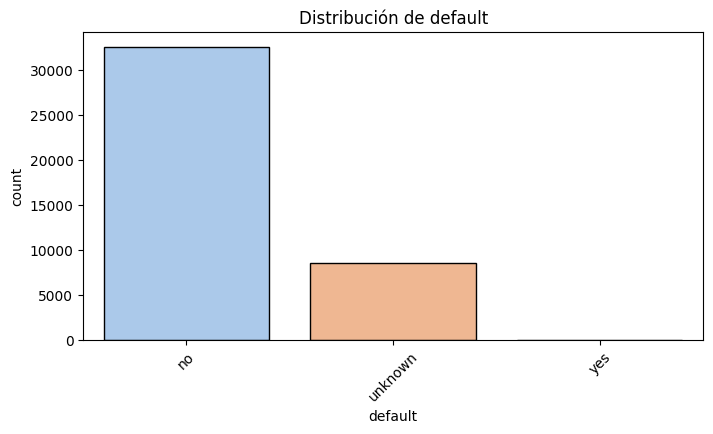

### An√°lisis de housing

housing
yes        0.524
no         0.452
unknown    0.024
Name: proportion, dtype: float64


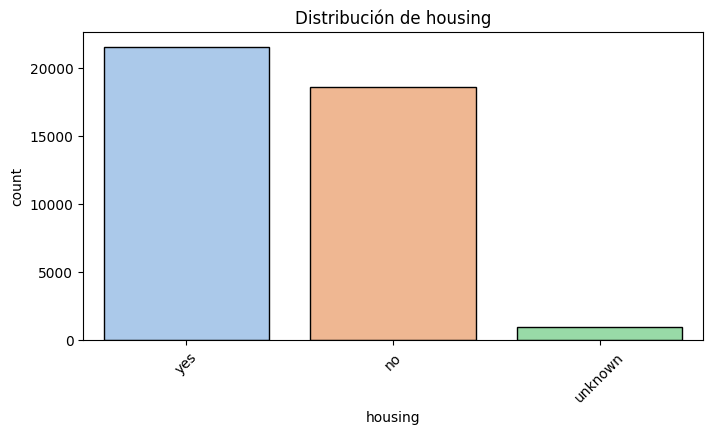

### An√°lisis de loan

loan
no         0.824
yes        0.152
unknown    0.024
Name: proportion, dtype: float64


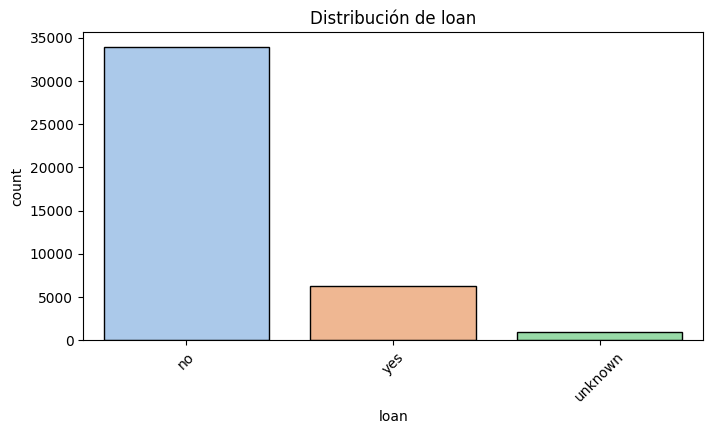

In [ ]:
# Distribuci√≥n de categor√≠as: 

# Edad (num√©rica)
_ = variable_categorica(df_analisis, "default")

# Job (categ√≥rica)
_ = variable_categorica(df_analisis, "housing")

# Education (categ√≥rica)
_ = variable_categorica(df_analisis, "loan")

In [ ]:
# ==============================
# An√°lisis Variables Financieras
# ==============================

# Cr√©ditos impagados (default)
print("### Cr√©ditos impagados (default)")
display(resumen_categorica(df_analisis, "default")) 

# Hipoteca (housing)
print("### Hipoteca (housing)")
display(resumen_categorica(df_analisis, "housing"))

# Pr√©stamo personal (loan)
print("### Pr√©stamo personal (loan)")
display(resumen_categorica(df_analisis, "loan"))

### Cr√©ditos impagados (default)


default  total_registros  total_yes  porcentaje_yes  porcentaje_total
0       no            32577       4196       12.880253         79.116476
1  unknown             8596        443        5.153560         20.876239
2      yes                3          0        0.000000          0.007286

### Hipoteca (housing)


housing  total_registros  total_yes  porcentaje_yes  porcentaje_total
0      yes            21571       2507       11.622085         52.387313
1       no            18615       2025       10.878324         45.208374
2  unknown              990        107       10.808081          2.404313

### Pr√©stamo personal (loan)


loan  total_registros  total_yes  porcentaje_yes  porcentaje_total
0       no            33938       3849       11.341269         82.421799
1      yes             6248        683       10.931498         15.173888
2  unknown              990        107       10.808081          2.404313

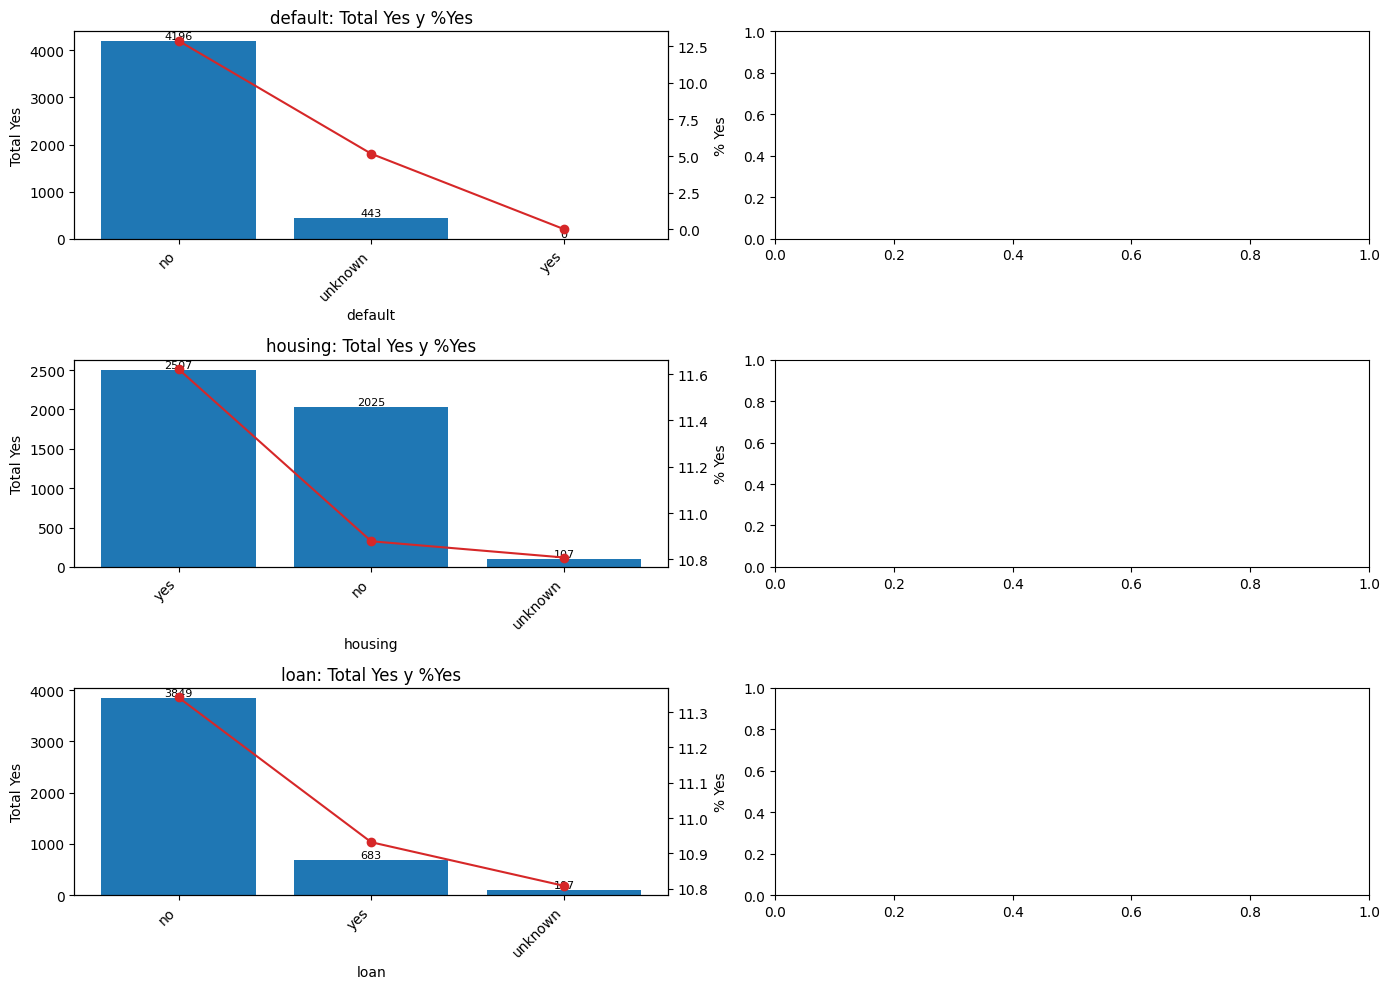

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(14, 10))

# 1) Cr√©ditos impagados (default)
plot_resumen_categorica_ax(df_analisis, "default", axes[0, 0])

# 2) Hipoteca (housing)
plot_resumen_categorica_ax(df_analisis, "housing", axes[1, 0])

# 3) Pr√©stamo personal (loan)
plot_resumen_categorica_ax(df_analisis, "loan", axes[2, 0])


plt.tight_layout()
plt.show()

In [ ]:
# 1) Cr√©ditos impagados (default)
_ = conclusiones_categorica(df_analisis, "default")

# 2) Hipoteca (housing)
_ = conclusiones_categorica(df_analisis, "housing")

# 3) Pr√©stamo personal (loan)
_ = conclusiones_categorica(df_analisis, "loan")

### Variable: **default**
#### üìä Resultados observados
- **Baseline conversi√≥n**: 11.3%
- **Top volumen**: `no` (79.1%), `unknown` (20.9%), `yes` (0.0%)
- **Top conversi√≥n**: `no` (12.9%), `unknown` (5.2%), `yes` (0.0%)

#### üìà Interpretaci√≥n de negocio
- **Segmentos de alto impacto** (volumen alto y conversi√≥n > baseline): `no` (79.1% del total, 12.9% conv.)
- **Segmentos a optimizar** (volumen alto pero conversi√≥n < baseline): `unknown` (20.9% del total, 5.2% conv.)
- **Nichos potencialmente rentables** (volumen bajo pero alta conversi√≥n): `yes` (0.0% del total, 0.0% conv.)

### Variable: **housing**
#### üìä Resultados observados
- **Baseline conversi√≥n**: 11.3%
- **Top volumen**: `yes` (52.4%), `no` (45.2%), `unknown` (2.4%)
- **Top conversi√≥n**: `yes` (11.6%), `no` (10.9%), `unknown` (10.8%)

#### üìà Interpretaci√≥n de negocio
- **Segmentos de alto impacto** (volumen alto y conversi√≥n > baseline): `yes` (52.4% del total, 11.6% conv.)
- **Segmentos a optimizar** (volumen alto pero conversi√≥n < baseline): `no` (45.2% del total, 10.9% conv.)
- **Nichos potencialmente rentables** (volumen bajo pero alta conversi√≥n): `unknown` (2.4% del total, 10.8% conv.)

### Variable: **loan**
#### üìä Resultados observados
- **Baseline conversi√≥n**: 11.3%
- **Top volumen**: `no` (82.4%), `yes` (15.2%), `unknown` (2.4%)
- **Top conversi√≥n**: `no` (11.3%), `yes` (10.9%), `unknown` (10.8%)

#### üìà Interpretaci√≥n de negocio
- **Segmentos de alto impacto** (volumen alto y conversi√≥n > baseline): `no` (82.4% del total, 11.3% conv.)
- **Segmentos a optimizar** (volumen alto pero conversi√≥n < baseline): `yes` (15.2% del total, 10.9% conv.)
- **Nichos potencialmente rentables** (volumen bajo pero alta conversi√≥n): `unknown` (2.4% del total, 10.8% conv.)

- Hip√≥tesisi y conclusiones personales 

# 1
# 2

In [ ]:
# # Distribuci√≥n de variables financieras (2.2)
# import pandas as pd
# import matplotlib.pyplot as plt

# # Si tu DataFrame se llama distinto, ajusta aqu√≠:
# df_analisis = df_analisis.copy()

# fin_vars = ["default", "housing", "loan"]
# cat_order = {
#     "default": ["no", "unknown", "yes"],
#     "housing": ["no", "unknown", "yes"],
#     "loan":    ["no", "unknown", "yes"],
# }

# # Figura 1x3 (respeta tu estilo/rcParams existentes)
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# for i, var in enumerate(fin_vars):
#     ax = axes[i]

#     # Proporciones
#     vc = (
#         df_analisis[var]
#         .astype("category")
#         .cat.set_categories(cat_order[var], ordered=True)
#         .value_counts(normalize=True)
#         .sort_index()
#         .rename("Proporci√≥n")
#     )

#     # Barras (sin fijar colores para respetar tu tema actual)
#     vc.plot(kind="bar", ax=ax, rot=0)

#     # T√≠tulos y ejes
#     ax.set_title(f"Distribuci√≥n de {var}", pad=10)
#     ax.set_ylabel("Proporci√≥n")
#     ax.set_xlabel("")

#     # Grid suave si tu tema lo permite
#     ax.grid(axis="y", linestyle="--", alpha=0.3)

#     # Anotar porcentajes encima de cada barra
#     for p in ax.patches:
#         height = p.get_height()
#         if pd.notna(height):
#             ax.annotate(f"{height*100:.1f}%",
#                         (p.get_x() + p.get_width()/2, height),
#                         ha="center", va="bottom", fontsize=9, xytext=(0, 3),
#                         textcoords="offset points")

# plt.tight_layout()
# plt.show()

In [ ]:
# # --- Distribuci√≥n de variables financieras (2.2) con relaci√≥n a la edad ---
# import matplotlib.pyplot as plt
# import seaborn as sns

# fin_vars = ["default", "housing", "loan"]
# cat_order = {
#     "default": ["no", "unknown", "yes"],
#     "housing": ["no", "unknown", "yes"],
#     "loan":    ["no", "unknown", "yes"],
# }

# fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# for i, var in enumerate(fin_vars):
#     ax = axes[i]

#     # Boxplot de edad seg√∫n la categor√≠a financiera
#     sns.boxplot(
#         data=df_analisis,
#         x=var,
#         y="age",
#         order=cat_order[var],
#         ax=ax
#     )

#     ax.set_title(f"Edad seg√∫n {var}", pad=10)
#     ax.set_xlabel(var.capitalize())
#     ax.set_ylabel("Edad" if i == 0 else "")

# plt.tight_layout()
# plt.show()

## 2.3 Caracter√≠sticas de la campa√±a de marketing

- `contact` -> Medio de contacto con el cliente.  
- `month` -> Mes del contacto.  
- `day_of_week` -> D√≠a de la semana del contacto.  
- `duration` -> Duraci√≥n de la llamada (segundos).  
- `campaign` -> N¬∫ de contactos realizados en la campa√±a actual.  
- `pdays` -> D√≠as desde el √∫ltimo contacto previo (999 = nunca).  
- `previous` -> N¬∫ de contactos previos.  
- `poutcome` -> Resultado de la campa√±a anterior.  

---

## Hip√≥tesis de cada variable

**Tipo de contacto (contact)**: Canal utilizado para llegar al cliente.  
- Hip√≥tesis:  
  - Es indiferente si se contacta por celular o por tel√©fono.  

**Mes del contacto (month)**: Momento temporal en el que se realiza la campa√±a.  
- Hip√≥tesis:  
  - Estacionalidad influye en la disposici√≥n a solicitar el prestamo. Los meses de mayo - julio, la gente tendr√° solicitar√° m√°s presatamos de cara al verano.  

**D√≠a de la semana (day_of_week)**: Momento de la semana que puede influir en la receptividad.  
- Hip√≥tesis:  
  - Lunes-viernes sin diferencias notables, aunque d√≠as cercanos a fin de semana podr√≠an ser menos efectivos.  

**Duraci√≥n de la llamada (duration)**: Longitud del contacto telef√≥nico.  
- Hip√≥tesis:  
  - A mayor duraci√≥n mayor inter√©s y probabilidad de conversi√≥n.   

**N¬∫ de contactos en la campa√±a (campaign)**: Cantidad de intentos en la campa√±a actual.  
- Hip√≥tesis:  
  - Pocos intentos -> mayor efectividad.  
  - Muchos intentos -> fatiga del cliente, baja conversi√≥n.  

**D√≠as desde el √∫ltimo contacto (pdays)**: Tiempo transcurrido desde la √∫ltima interacci√≥n.  
- Hip√≥tesis:  
  - Contactos recientes (pdays < 999) -> mayor probabilidad de √©xito.  
  - Valor 999 (nunca contactados) -> grupo predominante, menor predisposici√≥n.  

**N¬∫ de contactos anteriores (previous)**: Hist√≥rico de contactos previos.  
- Hip√≥tesis:  
  - Clientes con interacciones previas -> m√°s propensos a convertir.  
  - Clientes nunca contactados -> menor tasa de conversi√≥n.  

**Resultado de campa√±a anterior (poutcome)**: Efectividad de la √∫ltima campa√±a.  
- Hip√≥tesis:  
  - `success` -> mucho mayor probabilidad de √©xito actual.  
  - `failure` o `nonexistent` -> menor predisposici√≥n.  

 *A continuaci√≥n se presentan los gr√°ficos de cada una de estas variables para visualizar su distribuci√≥n y relaci√≥n con la respuesta.*  

### An√°lisis de contact

contact
cellular     0.635
telephone    0.365
Name: proportion, dtype: float64


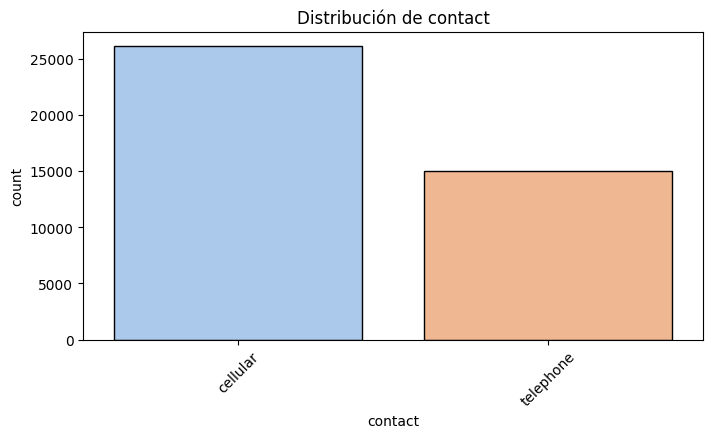

### An√°lisis de month

month
may    0.334
jul    0.174
aug    0.150
jun    0.129
nov    0.100
apr    0.064
oct    0.017
sep    0.014
mar    0.013
dec    0.004
Name: proportion, dtype: float64


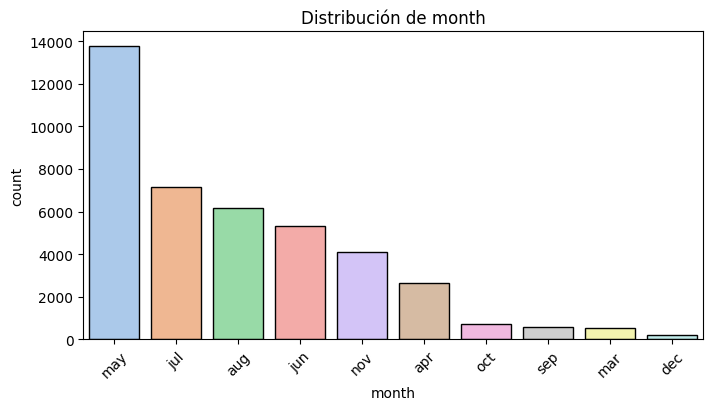

### An√°lisis de day_of_week

day_of_week
thu    0.209
mon    0.207
wed    0.198
tue    0.196
fri    0.190
Name: proportion, dtype: float64


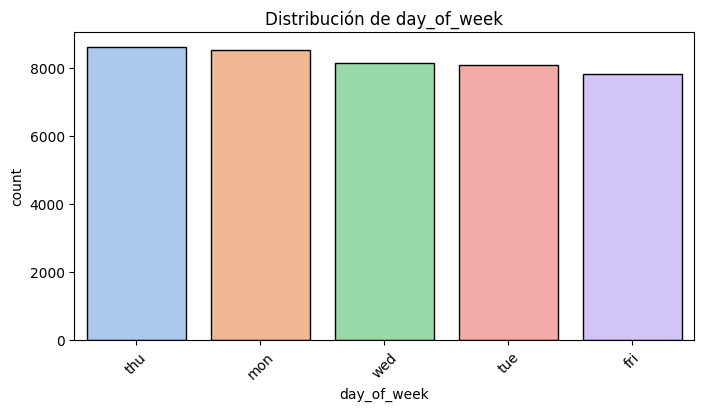

### An√°lisis de duration

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


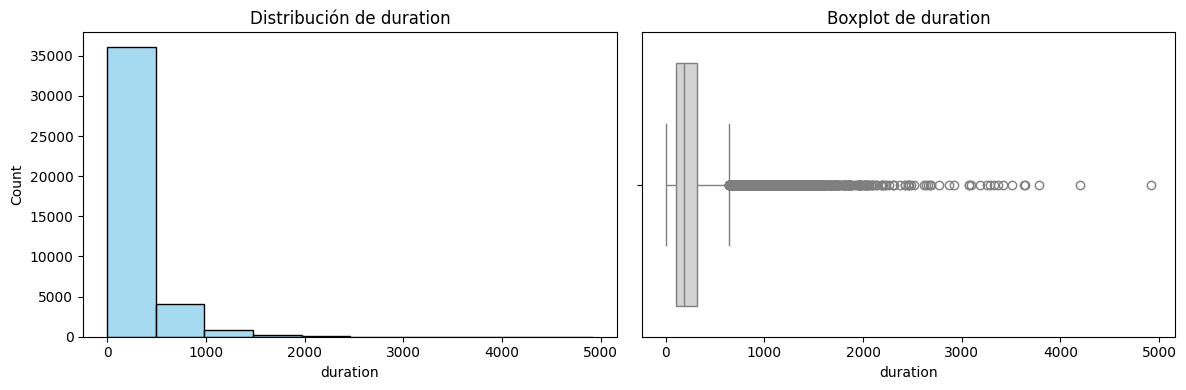

### An√°lisis de campaign

campaign
1     0.428
2     0.257
3     0.130
4     0.064
5     0.039
6     0.024
7     0.015
8     0.010
9     0.007
10    0.005
11    0.004
12    0.003
13    0.002
14    0.002
17    0.001
16    0.001
15    0.001
18    0.001
20    0.001
19    0.001
21    0.001
22    0.000
23    0.000
24    0.000
27    0.000
29    0.000
28    0.000
26    0.000
25    0.000
31    0.000
30    0.000
35    0.000
32    0.000
33    0.000
34    0.000
42    0.000
40    0.000
43    0.000
56    0.000
39    0.000
41    0.000
37    0.000
Name: proportion, dtype: float64


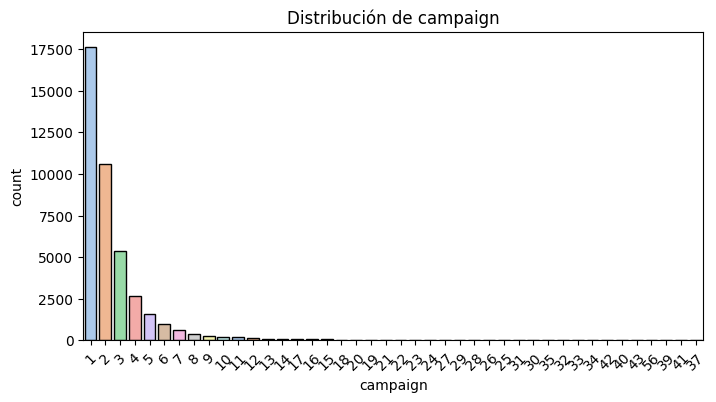

### An√°lisis de pdays

pdays
999    0.963
3      0.011
6      0.010
4      0.003
9      0.002
2      0.001
7      0.001
12     0.001
10     0.001
5      0.001
13     0.001
11     0.001
1      0.001
15     0.001
14     0.000
8      0.000
0      0.000
16     0.000
17     0.000
18     0.000
22     0.000
19     0.000
21     0.000
25     0.000
26     0.000
27     0.000
20     0.000
Name: proportion, dtype: float64


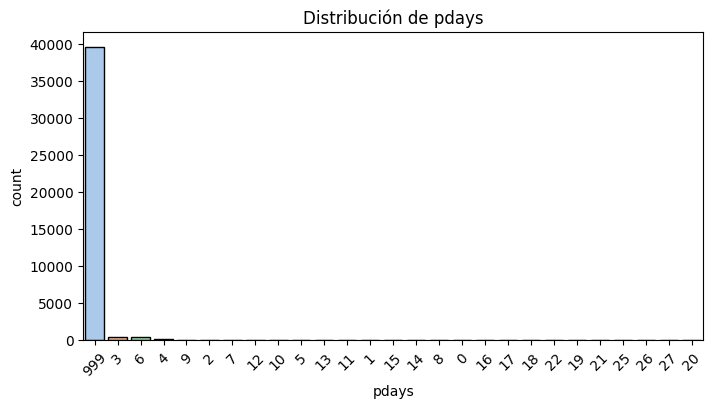

### An√°lisis de previous

previous
0    0.863
1    0.111
2    0.018
3    0.005
4    0.002
5    0.000
6    0.000
7    0.000
Name: proportion, dtype: float64


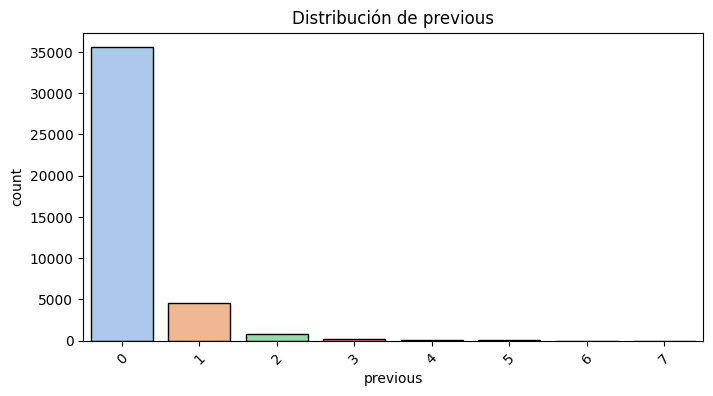

### An√°lisis de poutcome

poutcome
nonexistent    0.863
failure        0.103
success        0.033
Name: proportion, dtype: float64


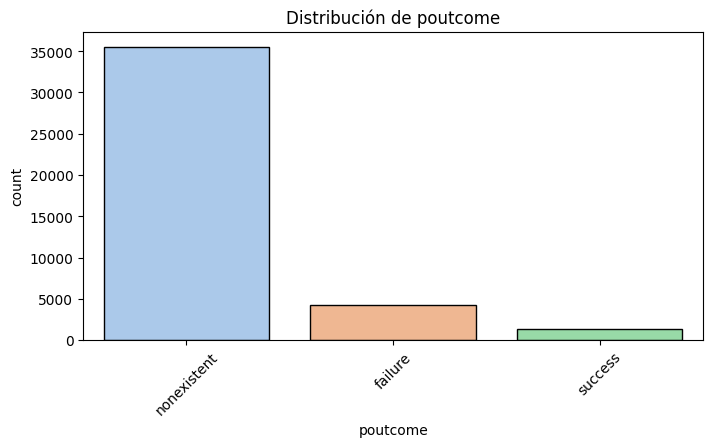

In [ ]:
# Distribuci√≥n de categor√≠as: 

_ = variable_categorica(df_analisis, "contact")

_ = variable_categorica(df_analisis, "month")

_ = variable_categorica(df_analisis, "day_of_week")

_ = variable_numerica(df_analisis, "duration", bins=10)

_ = variable_categorica(df_analisis, "campaign")

_ = variable_categorica(df_analisis, "pdays")

_ = variable_categorica(df_analisis, "previous")

_ = variable_categorica(df_analisis, "poutcome")

In [ ]:
# ==============================
# An√°lisis Variables de Campa√±a
# ==============================

# Edad (agurpada por generaci√≥n)
print("### Edad (age)")
display(resumen_categorica(df_analisis, "generation")) 

# Tipo de trabajo (categ√≥rica)
print("### Tipo de Trabajo (job)")
display(resumen_categorica(df_analisis, "job"))

# Estado civil (categ√≥rica)
print("### Estado Civil (marital)")
display(resumen_categorica(df_analisis, "marital"))

# Nivel educativo (categ√≥rica)
print("### Nivel Educativo (education)")
display(resumen_categorica(df_analisis, "education"))

### Edad (age)


generation  total_registros  total_yes  porcentaje_yes  \
0                    Other                2          2      100.000000   
1  Silent Generation (<97)              148         75       50.675676   
2       Baby Boomers (<79)              759        337       44.400527   
3              Gen Z (<28)             4214        736       17.465591   
4        Millennials (<44)            24032       2354        9.795273   
5              Gen X (<60)            12021       1135        9.441810   

   porcentaje_total  
0          0.004857  
1          0.359433  
2          1.843307  
3         10.234117  
4         58.364096  
5         29.194191

### Tipo de Trabajo (job)


job  total_registros  total_yes  porcentaje_yes  \
0         student              875        275       31.428571   
1         retired             1718        434       25.261932   
2      unemployed             1014        144       14.201183   
3          admin.            10419       1351       12.966695   
4      management             2924        328       11.217510   
5         unknown              330         37       11.212121   
6      technician             6739        730       10.832468   
7   self-employed             1421        149       10.485574   
8       housemaid             1060        106       10.000000   
9    entrepreneur             1456        124        8.516484   
10       services             3967        323        8.142173   
11    blue-collar             9253        638        6.895061   

    porcentaje_total  
0           2.125024  
1           4.172333  
2           2.462600  
3          25.303575  
4           7.101224  
5           0.801438  
6          16.366330  
7           3.451039  
8           2.574315  
9           3.536040  
10          9.634253  
11         22.471828

### Estado Civil (marital)


marital  total_registros  total_yes  porcentaje_yes  porcentaje_total
0   unknown               80         12       15.000000          0.194288
1    single            11564       1620       14.008993         28.084321
2  divorced             4611        476       10.323140         11.198271
3   married            24921       2531       10.156093         60.523120

### Nivel Educativo (education)


education  total_registros  total_yes  porcentaje_yes  \
0           illiterate               18          4       22.222222   
1              unknown             1730        251       14.508671   
2    university.degree            12164       1669       13.720816   
3  professional.course             5240        595       11.354962   
4          high.school             9512       1031       10.838940   
5             basic.4y             4176        428       10.249042   
6             basic.6y             2291        188        8.206024   
7             basic.9y             6045        473        7.824648   

   porcentaje_total  
0          0.043715  
1          4.201477  
2         29.541480  
3         12.725860  
4         23.100835  
5         10.141830  
6          5.563921  
7         14.680882

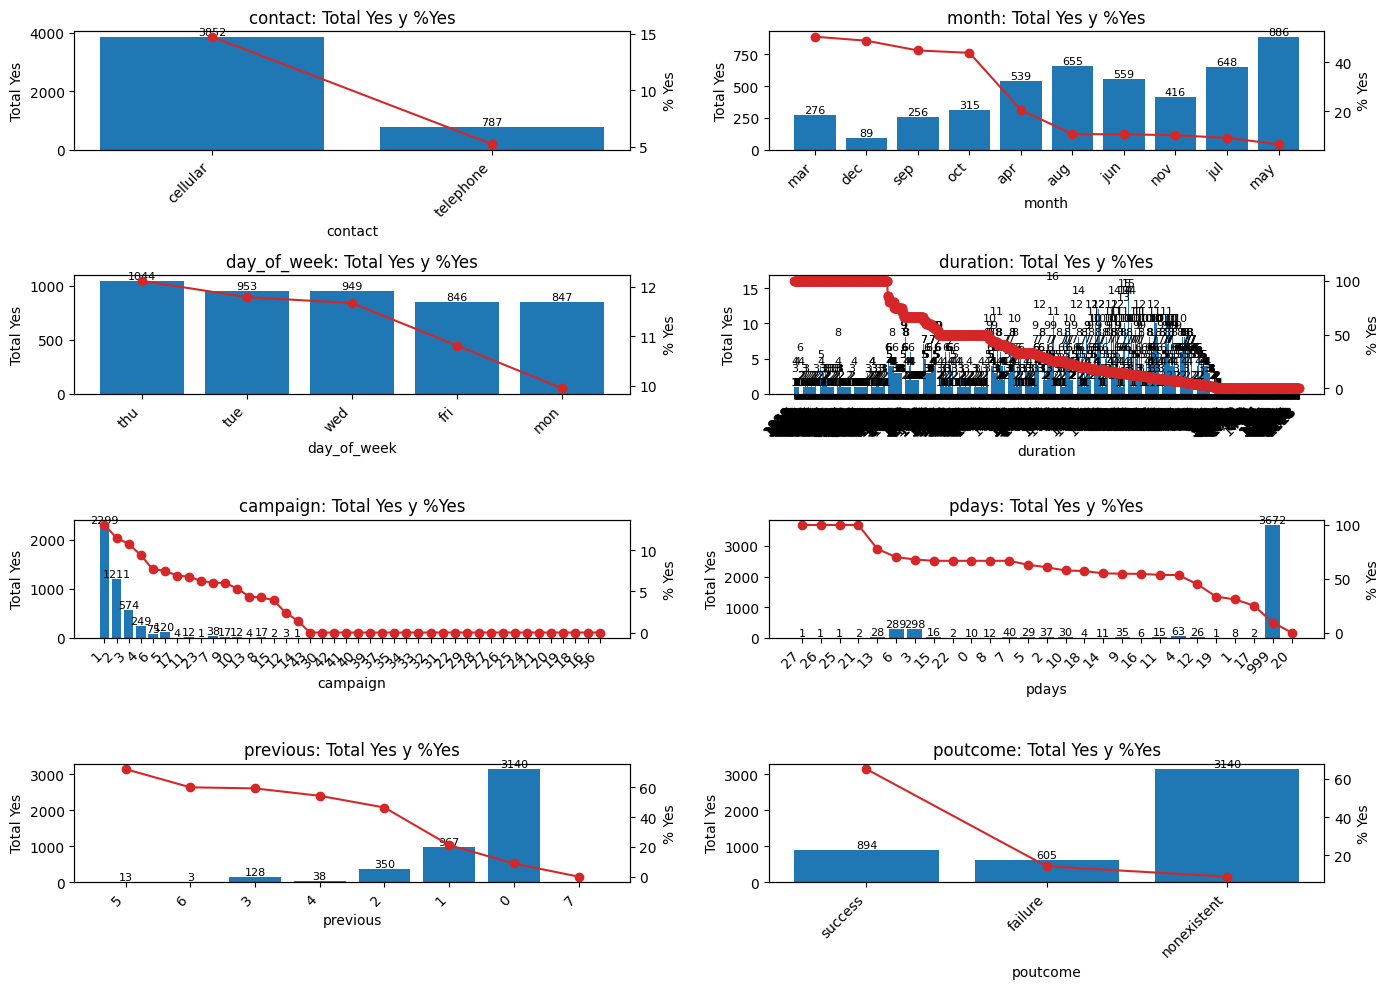

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(14, 10))

# 1) Edad (num√©rica)
plot_resumen_categorica_ax(df_analisis, "contact", axes[0, 0])

# 2) Job (categ√≥rica)
plot_resumen_categorica_ax(df_analisis, "month", axes[0, 1])

# 3) Education (categ√≥rica)
plot_resumen_categorica_ax(df_analisis, "day_of_week", axes[1, 0])

# 4) Marital (categ√≥rica)
plot_resumen_categorica_ax(df_analisis, "duration", axes[1, 1])

# 1) Edad (num√©rica)
plot_resumen_categorica_ax(df_analisis, "campaign", axes[2, 0])

# 2) Job (categ√≥rica)
plot_resumen_categorica_ax(df_analisis, "pdays", axes[2, 1])

# 3) Education (categ√≥rica)
plot_resumen_categorica_ax(df_analisis, "previous", axes[3, 0])

# 4) Marital (categ√≥rica)
plot_resumen_categorica_ax(df_analisis, "poutcome", axes[3, 1])

plt.tight_layout()
plt.show()

In [ ]:
# 1) Cr√©ditos impagados (default)
_ = conclusiones_categorica(df_analisis, "default")

# 2) Hipoteca (housing)
_ = conclusiones_categorica(df_analisis, "housing")

# 3) Pr√©stamo personal (loan)
_ = conclusiones_categorica(df_analisis, "loan")

### Variable: **default**
#### üìä Resultados observados
- **Baseline conversi√≥n**: 11.3%
- **Top volumen**: `no` (79.1%), `unknown` (20.9%), `yes` (0.0%)
- **Top conversi√≥n**: `no` (12.9%), `unknown` (5.2%), `yes` (0.0%)

#### üìà Interpretaci√≥n de negocio
- **Segmentos de alto impacto** (volumen alto y conversi√≥n > baseline): `no` (79.1% del total, 12.9% conv.)
- **Segmentos a optimizar** (volumen alto pero conversi√≥n < baseline): `unknown` (20.9% del total, 5.2% conv.)
- **Nichos potencialmente rentables** (volumen bajo pero alta conversi√≥n): `yes` (0.0% del total, 0.0% conv.)

### Variable: **housing**
#### üìä Resultados observados
- **Baseline conversi√≥n**: 11.3%
- **Top volumen**: `yes` (52.4%), `no` (45.2%), `unknown` (2.4%)
- **Top conversi√≥n**: `yes` (11.6%), `no` (10.9%), `unknown` (10.8%)

#### üìà Interpretaci√≥n de negocio
- **Segmentos de alto impacto** (volumen alto y conversi√≥n > baseline): `yes` (52.4% del total, 11.6% conv.)
- **Segmentos a optimizar** (volumen alto pero conversi√≥n < baseline): `no` (45.2% del total, 10.9% conv.)
- **Nichos potencialmente rentables** (volumen bajo pero alta conversi√≥n): `unknown` (2.4% del total, 10.8% conv.)

### Variable: **loan**
#### üìä Resultados observados
- **Baseline conversi√≥n**: 11.3%
- **Top volumen**: `no` (82.4%), `yes` (15.2%), `unknown` (2.4%)
- **Top conversi√≥n**: `no` (11.3%), `yes` (10.9%), `unknown` (10.8%)

#### üìà Interpretaci√≥n de negocio
- **Segmentos de alto impacto** (volumen alto y conversi√≥n > baseline): `no` (82.4% del total, 11.3% conv.)
- **Segmentos a optimizar** (volumen alto pero conversi√≥n < baseline): `yes` (15.2% del total, 10.9% conv.)
- **Nichos potencialmente rentables** (volumen bajo pero alta conversi√≥n): `unknown` (2.4% del total, 10.8% conv.)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # --- Caracter√≠sticas de la campa√±a de marketing ---

# fig, axes = plt.subplots(4, 2, figsize=(16, 18))

# # 1) Contact (categ√≥rica)
# sns.countplot(x="contact", data=df_tfm_inicial,
#               order=df_tfm_inicial["contact"].value_counts().index,
#               palette="pastel", edgecolor="black", ax=axes[0,0])
# axes[0,0].set_title("Distribuci√≥n de contact")

# # 2) Month (categ√≥rica)
# sns.countplot(x="month", data=df_tfm_inicial,
#               order=df_tfm_inicial["month"].value_counts().index,
#               palette="pastel", edgecolor="black", ax=axes[0,1])
# axes[0,1].set_title("Distribuci√≥n de month")

# # 3) Day_of_week (categ√≥rica)
# sns.countplot(x="day_of_week", data=df_tfm_inicial,
#               order=df_tfm_inicial["day_of_week"].value_counts().index,
#               palette="pastel", edgecolor="black", ax=axes[1,0])
# axes[1,0].set_title("Distribuci√≥n de day_of_week")

# # 4) Duration (num√©rica)
# sns.histplot(df_tfm_inicial["duration"], bins=30,
#              color="skyblue", edgecolor="black", ax=axes[1,1])
# axes[1,1].set_title("Distribuci√≥n de duration")

# # 5) Campaign (num√©rica)
# sns.histplot(df_tfm_inicial["campaign"], bins=30,
#              color="skyblue", edgecolor="black", ax=axes[2,0])
# axes[2,0].set_title("Distribuci√≥n de campaign")

# # 6) Pdays (num√©rica, recortando outlier 999 para visualizar mejor)
# sns.histplot(df_tfm_inicial.loc[df_tfm_inicial["pdays"] != 999, "pdays"],
#              bins=30, color="skyblue", edgecolor="black", ax=axes[2,1])
# axes[2,1].set_title("Distribuci√≥n de pdays (excluyendo 999)")

# # 7) Previous (num√©rica)
# sns.histplot(df_tfm_inicial["previous"], bins=30,
#              color="skyblue", edgecolor="black", ax=axes[3,0])
# axes[3,0].set_title("Distribuci√≥n de previous")

# # 8) Poutcome (categ√≥rica)
# sns.countplot(x="poutcome", data=df_tfm_inicial,
#               order=df_tfm_inicial["poutcome"].value_counts().index,
#               palette="pastel", edgecolor="black", ax=axes[3,1])
# axes[3,1].set_title("Distribuci√≥n de poutcome")

# plt.tight_layout()
# plt.show()

## 2.4. Indicadores macroecon√≥micos

- `emp.var.rate` -> Tasa de variaci√≥n del empleo (trimestral).  
- `cons.price.idx` -> √çndice de precios al consumidor (mensual).  
- `cons.conf.idx` -> √çndice de confianza del consumidor (mensual).  
- `euribor3m` -> Tipo de inter√©s Euribor a 3 meses (diario).  
- `nr.employed` -> N√∫mero de empleados (trimestral).  

---

## Hip√≥tesis de cada variable

**Tasa de variaci√≥n del empleo (emp.var.rate)**: Refleja la situaci√≥n del mercado laboral.  
- Hip√≥tesis:  
  - Valores positivos -> mayor confianza econ√≥mica, m√°s probabilidad de inversi√≥n.  
  - Valores negativos -> menor predisposici√≥n a contratar.  

**√çndice de precios al consumidor (cons.price.idx)**: Mide la inflaci√≥n.  
- Hip√≥tesis:  
  - Inflaci√≥n moderada -> estabilidad percibida, posible incentivo a invertir.  
  - Inflaci√≥n elevada -> menor propensi√≥n a contratar dep√≥sitos.  

**√çndice de confianza del consumidor (cons.conf.idx)**: Mide la percepci√≥n econ√≥mica.  
- Hip√≥tesis:  
  - Valores m√°s altos (menos negativos) -> mayor confianza y predisposici√≥n.  
  - Valores muy negativos -> menor tasa de conversi√≥n.  

**Euribor 3 meses (euribor3m)**: Tipo de inter√©s de referencia.  
- Hip√≥tesis:  
  - Euribor alto -> dep√≥sitos m√°s atractivos (mayor rentabilidad).  
  - Euribor bajo -> menor atractivo relativo.  

**N√∫mero de empleados (nr.employed)**: Representa la situaci√≥n global de empleo.  
- Hip√≥tesis:  
  - Niveles altos de empleo -> estabilidad econ√≥mica y mayor disposici√≥n a contratar.  
  - Niveles bajos -> incertidumbre, menor probabilidad de conversi√≥n.  

 *A continuaci√≥n se presentan los gr√°ficos de distribuci√≥n de los indicadores macroecon√≥micos.* 

### An√°lisis de emp.var.rate

emp.var.rate
 1.4    0.394
-1.8    0.223
 1.1    0.189
-0.1    0.089
-2.9    0.040
-3.4    0.026
-1.7    0.019
-1.1    0.015
-3.0    0.004
-0.2    0.000
Name: proportion, dtype: float64


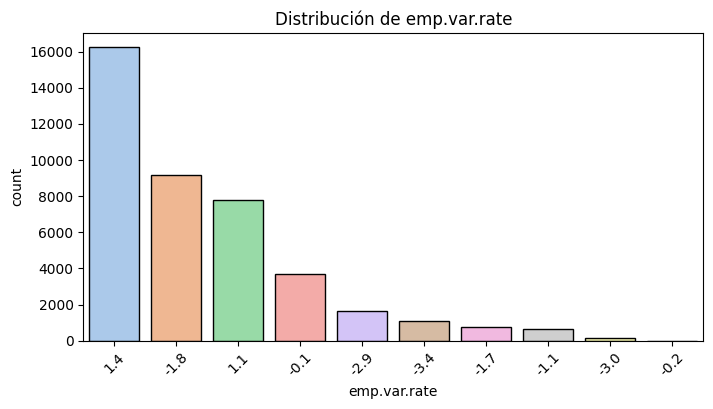

### An√°lisis de cons.price.idx

cons.price.idx
93.994    0.189
93.918    0.162
92.893    0.141
93.444    0.126
94.465    0.106
93.200    0.088
93.075    0.060
92.201    0.019
92.963    0.017
92.431    0.011
92.649    0.009
94.215    0.008
94.199    0.007
92.843    0.007
92.379    0.006
93.369    0.006
94.027    0.006
94.055    0.006
93.876    0.005
94.601    0.005
92.469    0.004
93.749    0.004
92.713    0.004
94.767    0.003
93.798    0.002
92.756    0.000
Name: proportion, dtype: float64


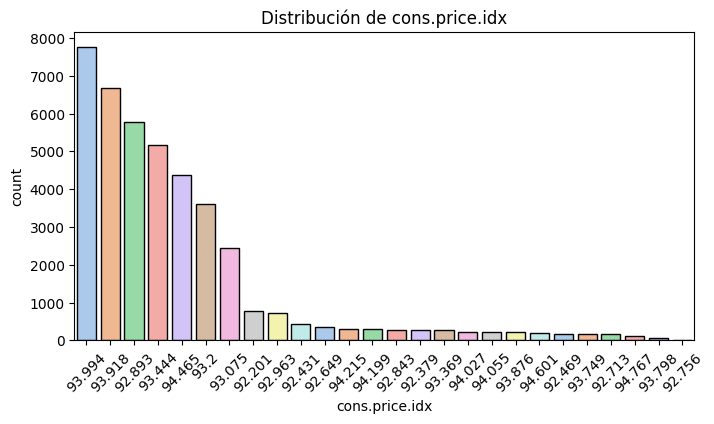

### An√°lisis de day_of_week

day_of_week
thu    0.209
mon    0.207
wed    0.198
tue    0.196
fri    0.190
Name: proportion, dtype: float64


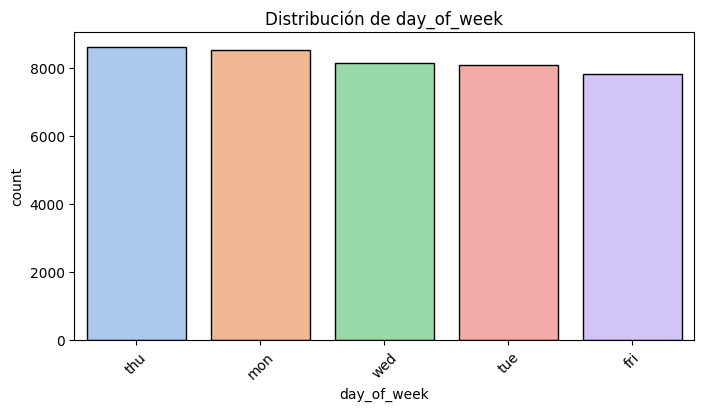

### An√°lisis de cons.conf.idx

cons.conf.idx
-36.4    0.189
-42.7    0.162
-46.2    0.141
-36.1    0.126
-41.8    0.106
-42.0    0.088
-47.1    0.060
-31.4    0.019
-40.8    0.017
-26.9    0.011
-30.1    0.009
-40.3    0.008
-37.5    0.007
-50.0    0.007
-29.8    0.006
-34.8    0.006
-38.3    0.006
-39.8    0.006
-40.0    0.005
-49.5    0.005
-33.6    0.004
-34.6    0.004
-33.0    0.004
-50.8    0.003
-40.4    0.002
-45.9    0.000
Name: proportion, dtype: float64


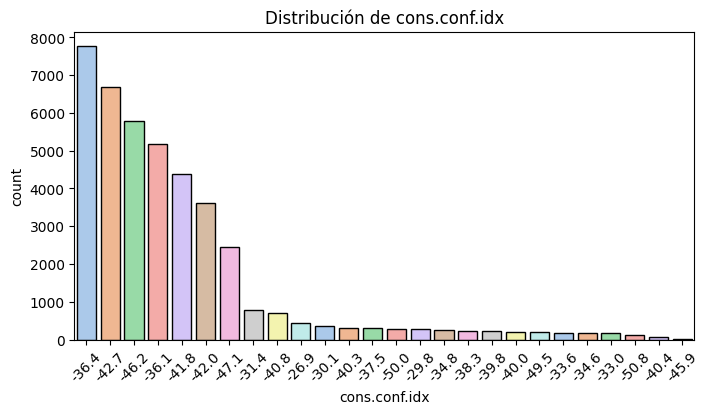

### An√°lisis de pdays

pdays
999    0.963
3      0.011
6      0.010
4      0.003
9      0.002
2      0.001
7      0.001
12     0.001
10     0.001
5      0.001
13     0.001
11     0.001
1      0.001
15     0.001
14     0.000
8      0.000
0      0.000
16     0.000
17     0.000
18     0.000
22     0.000
19     0.000
21     0.000
25     0.000
26     0.000
27     0.000
20     0.000
Name: proportion, dtype: float64


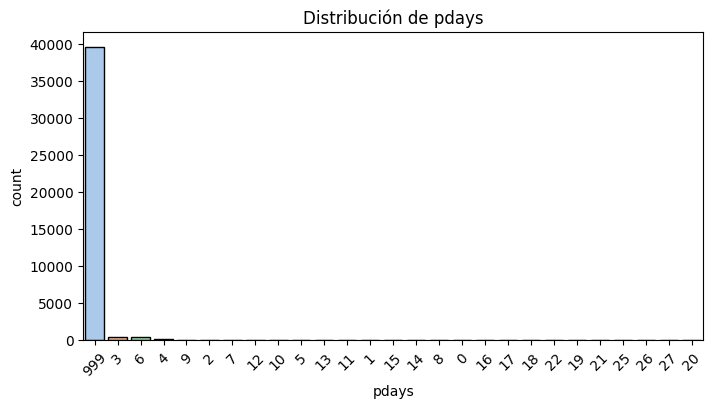

### An√°lisis de euribor3m

euribor3m
4.857    0.070
4.962    0.063
4.963    0.060
4.961    0.046
4.856    0.029
         ...  
3.853    0.000
3.901    0.000
0.969    0.000
0.956    0.000
3.669    0.000
Name: proportion, Length: 316, dtype: float64


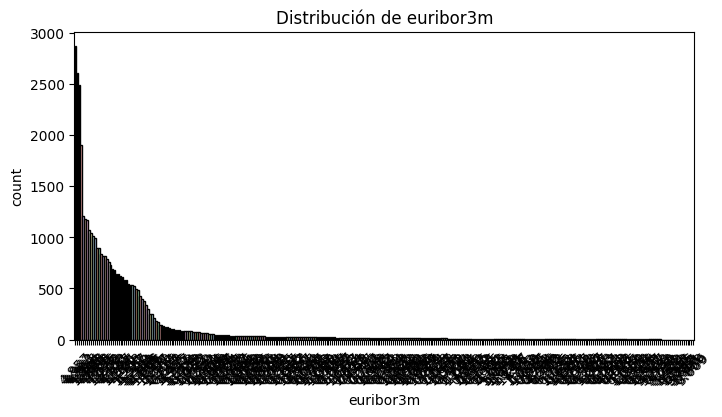

### An√°lisis de nr.employed

nr.employed
5228.1    0.394
5099.1    0.207
5191.0    0.189
5195.8    0.089
5076.2    0.040
5017.5    0.026
4991.6    0.019
5008.7    0.016
4963.6    0.015
5023.5    0.004
5176.3    0.000
Name: proportion, dtype: float64


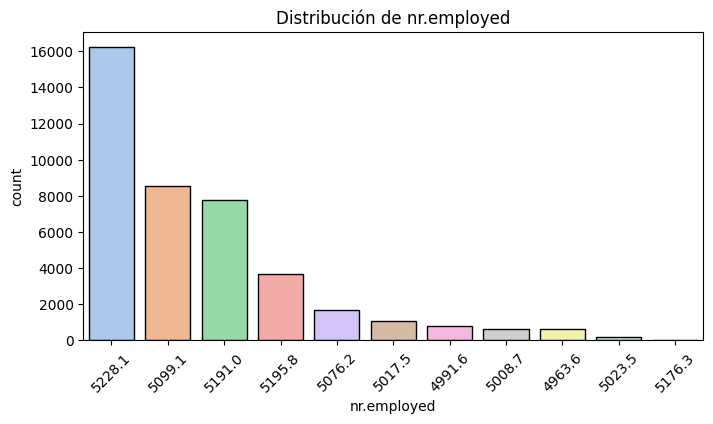

In [ ]:
# Distribuci√≥n de categor√≠as: 

_ = variable_categorica(df_analisis, "emp.var.rate")

_ = variable_categorica(df_analisis, "cons.price.idx")

_ = variable_categorica(df_analisis, "day_of_week")

#_ = variable_numerica(df_analisis, "cons.conf.idx", bins=10)

_ = variable_categorica(df_analisis, "cons.conf.idx")

_ = variable_categorica(df_analisis, "pdays")

_ = variable_categorica(df_analisis, "euribor3m")

_ = variable_categorica(df_analisis, "nr.employed")

In [ ]:
# ==============================
# An√°lisis Variables de Campa√±a
# ==============================

# Edad (agurpada por generaci√≥n)
print("### Edad (age)")
display(resumen_categorica(df_analisis, "generation")) 

# Tipo de trabajo (categ√≥rica)
print("### Tipo de Trabajo (job)")
display(resumen_categorica(df_analisis, "job"))

# Estado civil (categ√≥rica)
print("### Estado Civil (marital)")
display(resumen_categorica(df_analisis, "marital"))

# Nivel educativo (categ√≥rica)
print("### Nivel Educativo (education)")
display(resumen_categorica(df_analisis, "education"))

### Edad (age)


generation  total_registros  total_yes  porcentaje_yes  \
0                    Other                2          2      100.000000   
1  Silent Generation (<97)              148         75       50.675676   
2       Baby Boomers (<79)              759        337       44.400527   
3              Gen Z (<28)             4214        736       17.465591   
4        Millennials (<44)            24032       2354        9.795273   
5              Gen X (<60)            12021       1135        9.441810   

   porcentaje_total  
0          0.004857  
1          0.359433  
2          1.843307  
3         10.234117  
4         58.364096  
5         29.194191

### Tipo de Trabajo (job)


job  total_registros  total_yes  porcentaje_yes  \
0         student              875        275       31.428571   
1         retired             1718        434       25.261932   
2      unemployed             1014        144       14.201183   
3          admin.            10419       1351       12.966695   
4      management             2924        328       11.217510   
5         unknown              330         37       11.212121   
6      technician             6739        730       10.832468   
7   self-employed             1421        149       10.485574   
8       housemaid             1060        106       10.000000   
9    entrepreneur             1456        124        8.516484   
10       services             3967        323        8.142173   
11    blue-collar             9253        638        6.895061   

    porcentaje_total  
0           2.125024  
1           4.172333  
2           2.462600  
3          25.303575  
4           7.101224  
5           0.801438  
6          16.366330  
7           3.451039  
8           2.574315  
9           3.536040  
10          9.634253  
11         22.471828

### Estado Civil (marital)


marital  total_registros  total_yes  porcentaje_yes  porcentaje_total
0   unknown               80         12       15.000000          0.194288
1    single            11564       1620       14.008993         28.084321
2  divorced             4611        476       10.323140         11.198271
3   married            24921       2531       10.156093         60.523120

### Nivel Educativo (education)


education  total_registros  total_yes  porcentaje_yes  \
0           illiterate               18          4       22.222222   
1              unknown             1730        251       14.508671   
2    university.degree            12164       1669       13.720816   
3  professional.course             5240        595       11.354962   
4          high.school             9512       1031       10.838940   
5             basic.4y             4176        428       10.249042   
6             basic.6y             2291        188        8.206024   
7             basic.9y             6045        473        7.824648   

   porcentaje_total  
0          0.043715  
1          4.201477  
2         29.541480  
3         12.725860  
4         23.100835  
5         10.141830  
6          5.563921  
7         14.680882

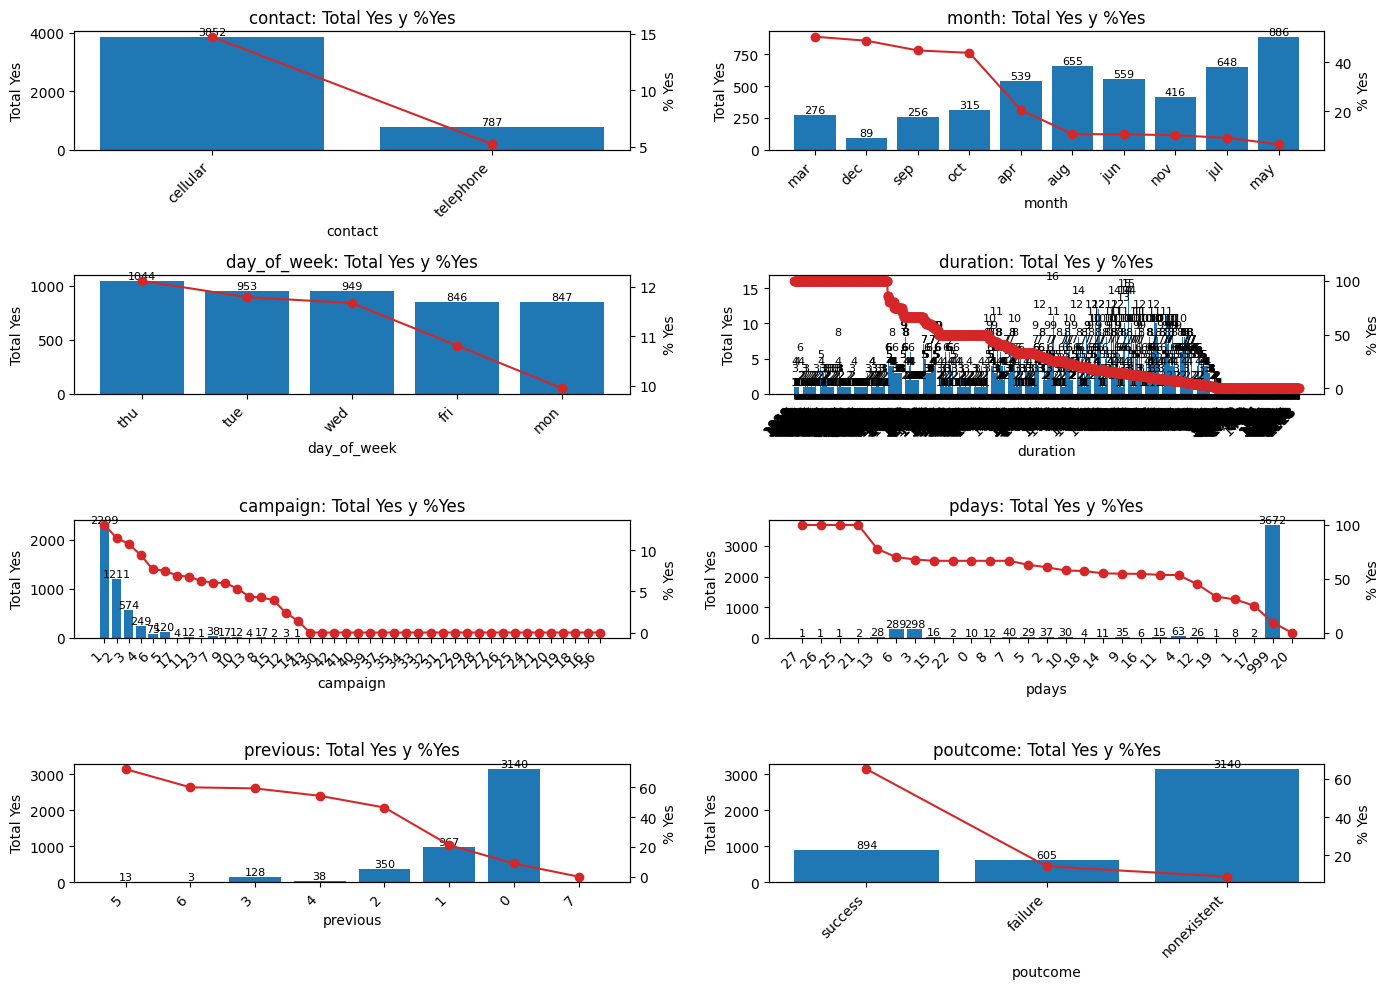

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(14, 10))

# 1) Edad (num√©rica)
plot_resumen_categorica_ax(df_analisis, "contact", axes[0, 0])

# 2) Job (categ√≥rica)
plot_resumen_categorica_ax(df_analisis, "month", axes[0, 1])

# 3) Education (categ√≥rica)
plot_resumen_categorica_ax(df_analisis, "day_of_week", axes[1, 0])

# 4) Marital (categ√≥rica)
plot_resumen_categorica_ax(df_analisis, "duration", axes[1, 1])

# 1) Edad (num√©rica)
plot_resumen_categorica_ax(df_analisis, "campaign", axes[2, 0])

# 2) Job (categ√≥rica)
plot_resumen_categorica_ax(df_analisis, "pdays", axes[2, 1])

# 3) Education (categ√≥rica)
plot_resumen_categorica_ax(df_analisis, "previous", axes[3, 0])

# 4) Marital (categ√≥rica)
plot_resumen_categorica_ax(df_analisis, "poutcome", axes[3, 1])

plt.tight_layout()
plt.show()

In [ ]:
# 1) Cr√©ditos impagados (default)
_ = conclusiones_categorica(df_analisis, "default")

# 2) Hipoteca (housing)
_ = conclusiones_categorica(df_analisis, "housing")

# 3) Pr√©stamo personal (loan)
_ = conclusiones_categorica(df_analisis, "loan")

### Variable: **default**
#### üìä Resultados observados
- **Baseline conversi√≥n**: 11.3%
- **Top volumen**: `no` (79.1%), `unknown` (20.9%), `yes` (0.0%)
- **Top conversi√≥n**: `no` (12.9%), `unknown` (5.2%), `yes` (0.0%)

#### üìà Interpretaci√≥n de negocio
- **Segmentos de alto impacto** (volumen alto y conversi√≥n > baseline): `no` (79.1% del total, 12.9% conv.)
- **Segmentos a optimizar** (volumen alto pero conversi√≥n < baseline): `unknown` (20.9% del total, 5.2% conv.)
- **Nichos potencialmente rentables** (volumen bajo pero alta conversi√≥n): `yes` (0.0% del total, 0.0% conv.)

### Variable: **housing**
#### üìä Resultados observados
- **Baseline conversi√≥n**: 11.3%
- **Top volumen**: `yes` (52.4%), `no` (45.2%), `unknown` (2.4%)
- **Top conversi√≥n**: `yes` (11.6%), `no` (10.9%), `unknown` (10.8%)

#### üìà Interpretaci√≥n de negocio
- **Segmentos de alto impacto** (volumen alto y conversi√≥n > baseline): `yes` (52.4% del total, 11.6% conv.)
- **Segmentos a optimizar** (volumen alto pero conversi√≥n < baseline): `no` (45.2% del total, 10.9% conv.)
- **Nichos potencialmente rentables** (volumen bajo pero alta conversi√≥n): `unknown` (2.4% del total, 10.8% conv.)

### Variable: **loan**
#### üìä Resultados observados
- **Baseline conversi√≥n**: 11.3%
- **Top volumen**: `no` (82.4%), `yes` (15.2%), `unknown` (2.4%)
- **Top conversi√≥n**: `no` (11.3%), `yes` (10.9%), `unknown` (10.8%)

#### üìà Interpretaci√≥n de negocio
- **Segmentos de alto impacto** (volumen alto y conversi√≥n > baseline): `no` (82.4% del total, 11.3% conv.)
- **Segmentos a optimizar** (volumen alto pero conversi√≥n < baseline): `yes` (15.2% del total, 10.9% conv.)
- **Nichos potencialmente rentables** (volumen bajo pero alta conversi√≥n): `unknown` (2.4% del total, 10.8% conv.)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # --- Indicadores macroecon√≥micos ---

# macro_vars = [
#     ("emp.var.rate", "Tasa de variaci√≥n del empleo (trimestral)", "Variaci√≥n (%)"),
#     ("cons.price.idx", "√çndice de precios al consumidor (mensual)", "√çndice (base=100)"),
#     ("cons.conf.idx", "√çndice de confianza del consumidor (mensual)", "√çndice de confianza"),
#     ("euribor3m", "Tipo de inter√©s Euribor a 3 meses (diario)", "Porcentaje (%)"),
#     ("nr.employed", "N√∫mero de empleados (trimestral)", "Miles de empleados")
# ]

# fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# for i, (col, title, xlabel) in enumerate(macro_vars):
#     r, c = divmod(i, 2)
#     sns.histplot(df_tfm_inicial[col],
#                  bins=30,
#                  kde=True,
#                  color="skyblue",
#                  edgecolor="black",
#                  ax=axes[r, c])
#     axes[r, c].set_title(f"Distribuci√≥n de {title}", fontsize=12)
#     axes[r, c].set_xlabel(xlabel, fontsize=10)
#     axes[r, c].set_ylabel("Frecuencia")

# # eliminar el subplot vac√≠o (porque son 5 variables)
# fig.delaxes(axes[2,1])

# plt.tight_layout()
# plt.show()

# 3. Variables Cruzadas

El an√°lisis individual de las variables permite comprender el impacto aislado de cada factor en la contrataci√≥n de un dep√≥sito. Sin embargo, la realidad del comportamiento de los clientes es multifactorial: las caracter√≠sticas demogr√°ficas, financieras y de interacci√≥n con la campa√±a se combinan para influir en la decisi√≥n final.  

Por ello, en este apartado se presentan las **variables cruzadas**, es decir, combinaciones de dos o m√°s factores que permiten detectar patrones m√°s complejos y generar hip√≥tesis m√°s s√≥lidas sobre el √©xito de la campa√±a.  

---

## 3.1 Demogr√°ficos √ó Financieros  

Este cruce busca relacionar el perfil sociodemogr√°fico del cliente con su situaci√≥n financiera.  

- `age √ó default` -> ¬øLos j√≥venes caen m√°s en impagos?  
- `age √ó loan` -> ¬øExiste una asociaci√≥n entre edad y cr√©ditos personales?  
- `marital √ó housing` -> ¬øLos casados tienden a tener m√°s hipotecas?  
- `education √ó loan` -> ¬øUna mayor educaci√≥n implica menor uso de pr√©stamos personales?  
- `job √ó default` -> ¬øQu√© sectores laborales presentan mayor morosidad?  

**Hip√≥tesis:** la edad, el estado civil, el nivel educativo y la profesi√≥n est√°n estrechamente vinculados con el acceso al cr√©dito y la probabilidad de impago.  


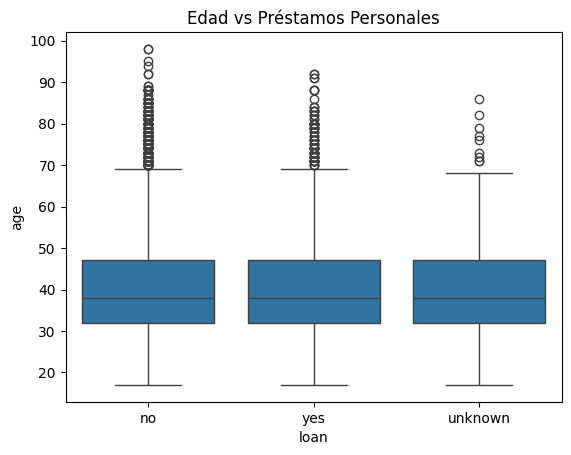

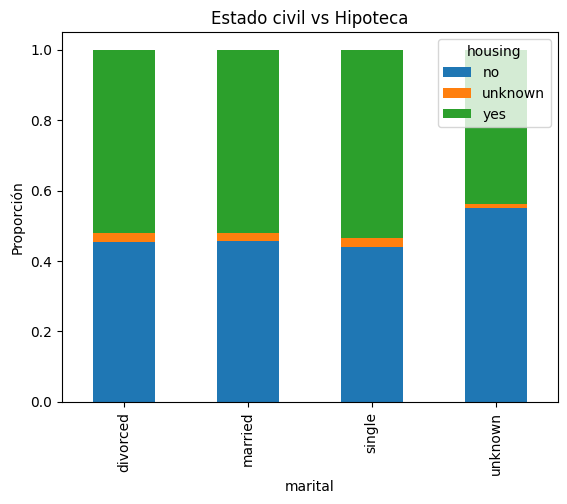

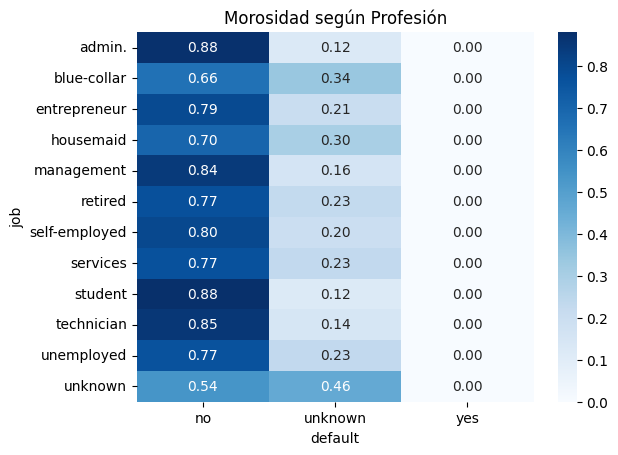

In [ ]:
# Boxplot: edad seg√∫n pr√©stamos personales
sns.boxplot(x="loan", y="age", data=df_analisis)
plt.title("Edad vs Pr√©stamos Personales")
plt.show()

# Stacked bar: estado civil vs hipoteca
pd.crosstab(df_analisis['marital'], df_analisis['housing'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Estado civil vs Hipoteca")
plt.ylabel("Proporci√≥n")
plt.show()

# Heatmap: profesi√≥n vs morosidad
cross = pd.crosstab(df_analisis['job'], df_analisis['default'], normalize='index')
sns.heatmap(cross, annot=True, cmap="Blues", fmt=".2f")
plt.title("Morosidad seg√∫n Profesi√≥n")
plt.show()

## 3.2 Demogr√°ficos √ó Campa√±a actual  

Relaciona el perfil del cliente con la estrategia de contacto utilizada en la campa√±a actual.  

- `job √ó duration` -> ¬øSe necesita m√°s tiempo para convencer a ciertos trabajos?  
- `education √ó campaign` -> ¬øEl nivel educativo influye en la tolerancia a m√∫ltiples intentos de contacto?  
- `marital √ó contact` -> ¬øLos casados responden mejor a tel√©fono fijo y los solteros a m√≥vil?  
- `age √ó day_of_week` -> ¬øQu√© d√≠a es m√°s efectivo seg√∫n el grupo etario?  
- `job √ó month` -> ¬øExisten profesiones que reaccionan mejor en determinados meses (ej. funcionarios en junio/diciembre)?  

**Hip√≥tesis:** la efectividad del contacto no solo depende del canal o el momento, sino tambi√©n del tipo de cliente.  


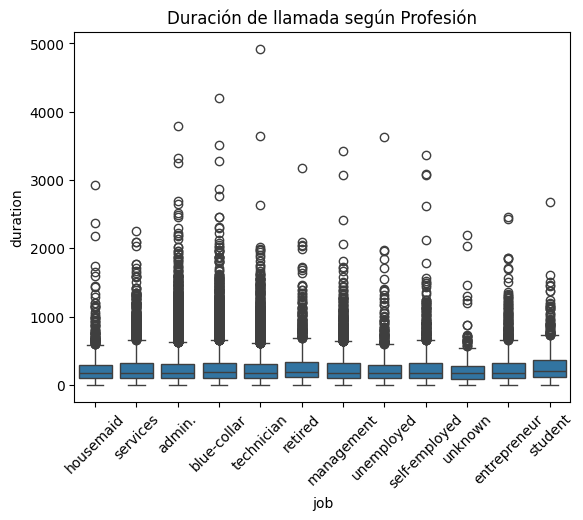

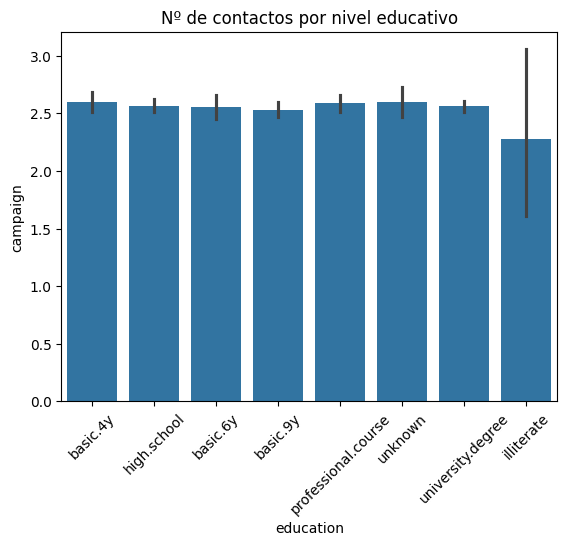

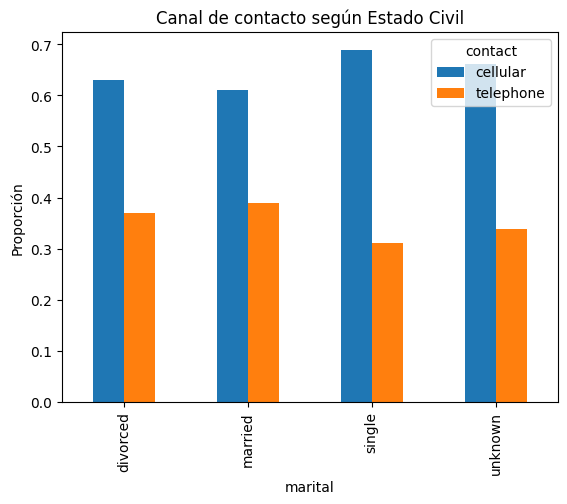

In [ ]:
# Boxplot: duraci√≥n vs profesi√≥n
sns.boxplot(x="job", y="duration", data=df_analisis)
plt.xticks(rotation=45)
plt.title("Duraci√≥n de llamada seg√∫n Profesi√≥n")
plt.show()

# Bar: n√∫mero de contactos vs nivel educativo
sns.barplot(x="education", y="campaign", data=df_analisis, estimator=np.mean)
plt.xticks(rotation=45)
plt.title("N¬∫ de contactos por nivel educativo")
plt.show()

# Grouped bar: canal de contacto vs estado civil
pd.crosstab(df_analisis['marital'], df_analisis['contact'], normalize='index').plot(kind='bar')
plt.title("Canal de contacto seg√∫n Estado Civil")
plt.ylabel("Proporci√≥n")
plt.show()

## 3.3 Demogr√°ficos √ó Campa√±as pasadas  

Analiza c√≥mo el historial de interacci√≥n se relaciona con el perfil sociodemogr√°fico.  

- `job √ó previous` -> ¬øQu√© profesiones fueron m√°s insistidas en campa√±as anteriores?  
- `education √ó poutcome` -> ¬øEl √©xito previo se concentr√≥ en clientes con mayor formaci√≥n?  
- `marital √ó pdays` -> ¬øEl estado civil influye en la respuesta seg√∫n la cercan√≠a del √∫ltimo contacto?  
- `age √ó poutcome` -> ¬øLos j√≥venes o mayores responden mejor tras un √©xito pasado?  

**Hip√≥tesis:** el recuerdo de campa√±as anteriores var√≠a seg√∫n edad, nivel educativo, estado civil y profesi√≥n.  

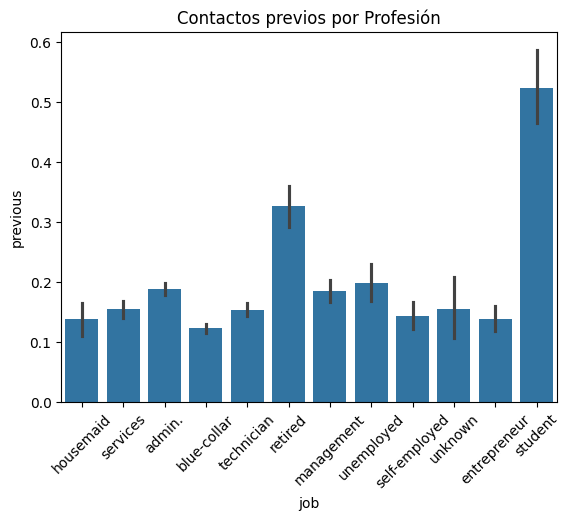

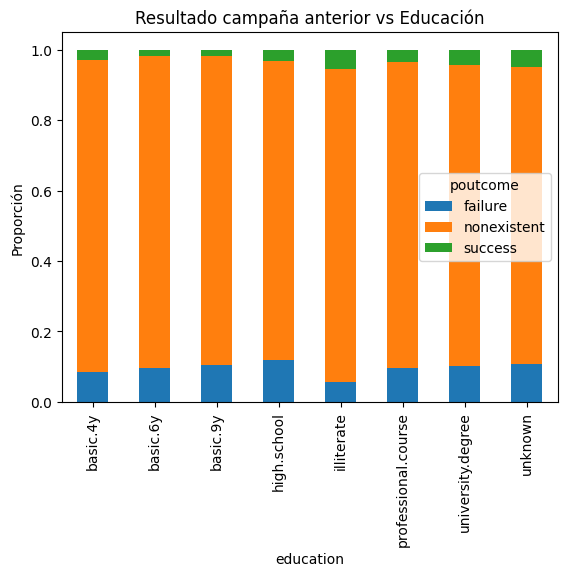

In [ ]:
# Bar: contactos previos vs profesi√≥n
sns.barplot(x="job", y="previous", data=df_analisis, estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Contactos previos por Profesi√≥n")
plt.show()

# Stacked bar: educaci√≥n vs resultado anterior
pd.crosstab(df_analisis['education'], df_analisis['poutcome'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Resultado campa√±a anterior vs Educaci√≥n")
plt.ylabel("Proporci√≥n")
plt.show()

## 3.4 Financieros √ó Campa√±a actual  

Permite evaluar c√≥mo la situaci√≥n econ√≥mica del cliente influye en la forma y efectividad de los contactos actuales.  

- `housing √ó campaign` -> ¬øA los hipotecados se les insiste m√°s veces en la campa√±a?  
- `loan √ó duration` -> ¬øLos deudores necesitan m√°s tiempo de persuasi√≥n?  
- `default √ó contact` -> ¬øLos morosos son contactados preferentemente por un canal espec√≠fico?  
- `housing √ó month` -> ¬øLos hipotecados son contactados m√°s en meses clave?  

**Hip√≥tesis:** la situaci√≥n financiera condiciona tanto la estrategia de contacto como la probabilidad de respuesta.  

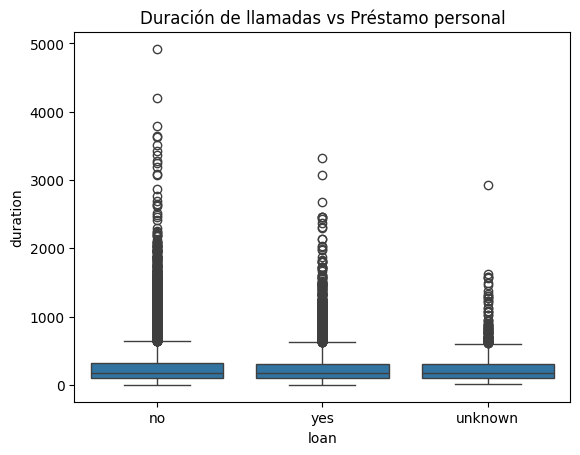

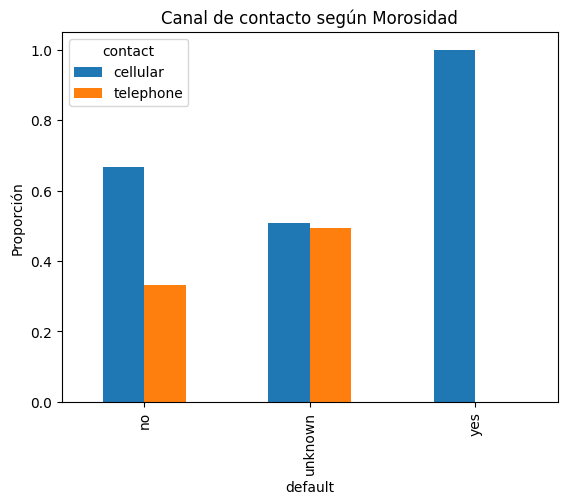

In [ ]:
# Boxplot: duraci√≥n de llamadas seg√∫n pr√©stamos
sns.boxplot(x="loan", y="duration", data=df_analisis)
plt.title("Duraci√≥n de llamadas vs Pr√©stamo personal")
plt.show()

# Grouped bar: canal seg√∫n morosidad
pd.crosstab(df_analisis['default'], df_analisis['contact'], normalize='index').plot(kind='bar')
plt.title("Canal de contacto seg√∫n Morosidad")
plt.ylabel("Proporci√≥n")
plt.show()

## 3.5 Financieros √ó Campa√±as pasadas  

Explora si los antecedentes financieros influyen en la persistencia o el resultado de campa√±as anteriores.  

- `loan √ó previous` -> ¬øSe insisti√≥ m√°s en clientes con pr√©stamos personales?  
- `housing √ó poutcome` -> ¬øEl √©xito previo fue mayor en clientes con hipoteca?  
- `default √ó pdays` -> ¬øLos morosos fueron recontactados m√°s r√°pidamente?  

**Hip√≥tesis:** la deuda y la morosidad determinan la estrategia de insistencia y la tasa de √©xito en campa√±as sucesivas.  

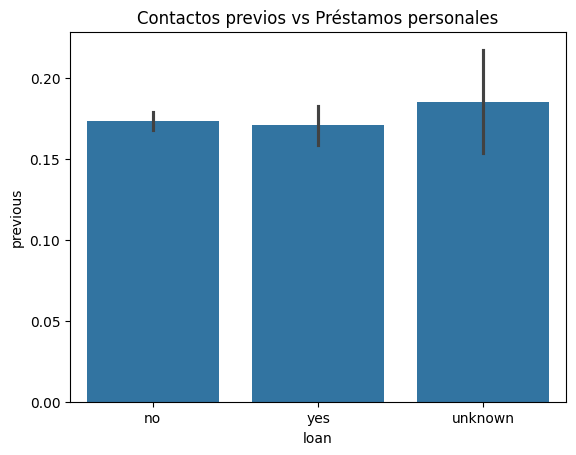

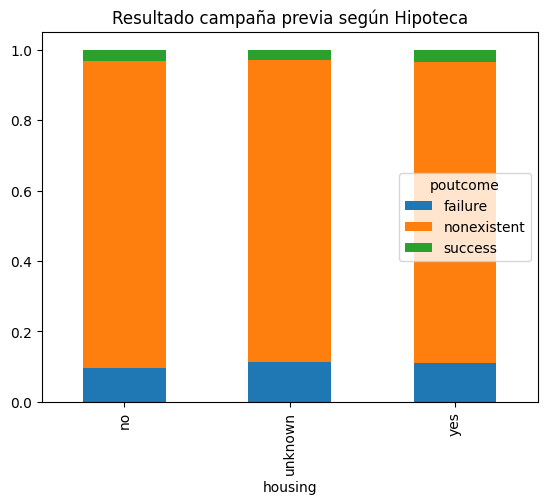

In [ ]:
# Bar: contactos previos seg√∫n pr√©stamo
sns.barplot(x="loan", y="previous", data=df_analisis, estimator=np.mean)
plt.title("Contactos previos vs Pr√©stamos personales")
plt.show()

# Stacked bar: hipoteca vs resultado previo
pd.crosstab(df_analisis['housing'], df_analisis['poutcome'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Resultado campa√±a previa seg√∫n Hipoteca")
plt.show()

## 3.6 Campa√±a actual √ó Campa√±as pasadas  

Relaciona la din√°mica de la campa√±a en curso con la experiencia de interacciones previas.  

- `campaign √ó previous` -> ¬øExiste relaci√≥n entre el n√∫mero de intentos actuales y pasados?  
- `duration √ó poutcome` -> ¬øLas campa√±as previas exitosas se vincularon con llamadas m√°s largas?  
- `month √ó poutcome` -> ¬øAlgunos meses presentan mejores resultados hist√≥ricos?  
- `day_of_week √ó pdays` -> ¬øEl d√≠a elegido cobra m√°s sentido seg√∫n la cercan√≠a del √∫ltimo contacto?  

**Hip√≥tesis:** la combinaci√≥n de persistencia y temporalidad a lo largo de campa√±as sucesivas condiciona la probabilidad de √©xito actual.  

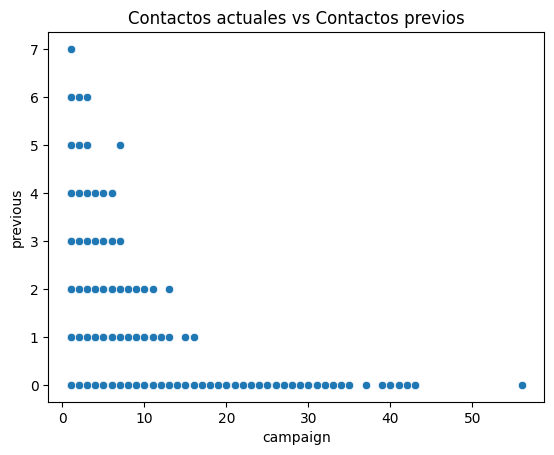

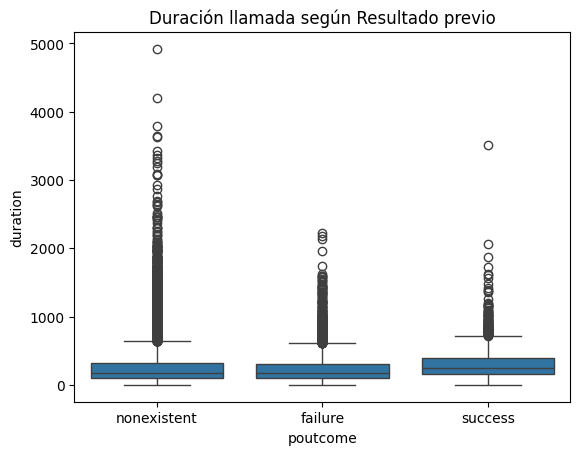

In [ ]:
# Scatter: intentos actuales vs previos
sns.scatterplot(x="campaign", y="previous", data=df_analisis)
plt.title("Contactos actuales vs Contactos previos")
plt.show()

# Boxplot: duraci√≥n vs resultado previo
sns.boxplot(x="poutcome", y="duration", data=df_analisis)
plt.title("Duraci√≥n llamada seg√∫n Resultado previo")
plt.show()

## 3.7 Multicruces (tres o m√°s variables)  

Algunas interacciones requieren considerar simult√°neamente m√∫ltiples factores para captar patrones complejos.  

- `job √ó age √ó housing` -> Identificar el perfil laboral seg√∫n edad e hipoteca.  
- `education √ó duration √ó y` -> ¬øEl impacto de la duraci√≥n de la llamada var√≠a seg√∫n el nivel educativo?  
- `marital √ó loan √ó poutcome` -> ¬øEstado civil y deuda afectan al √©xito pasado?  
- `age √ó campaign √ó y` -> ¬øLa edad influye en el n√∫mero de intentos necesarios para lograr √©xito?  
- `job √ó contact √ó y` -> ¬øEl canal m√°s eficaz depende de la profesi√≥n?  

**Hip√≥tesis:** los patrones de conversi√≥n son multifactoriales y requieren an√°lisis simult√°neo de diversas dimensiones. 

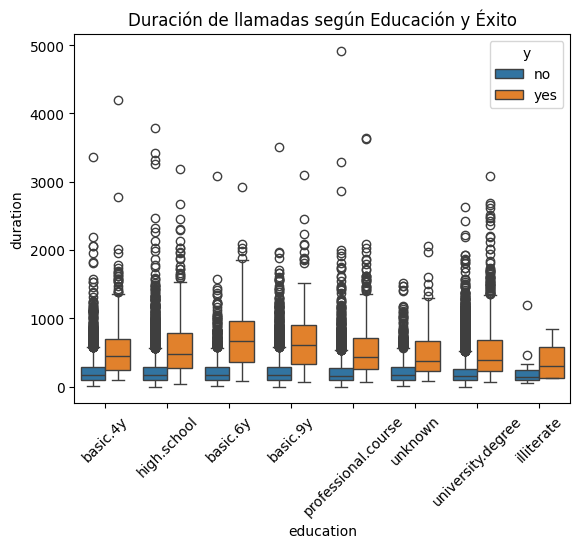

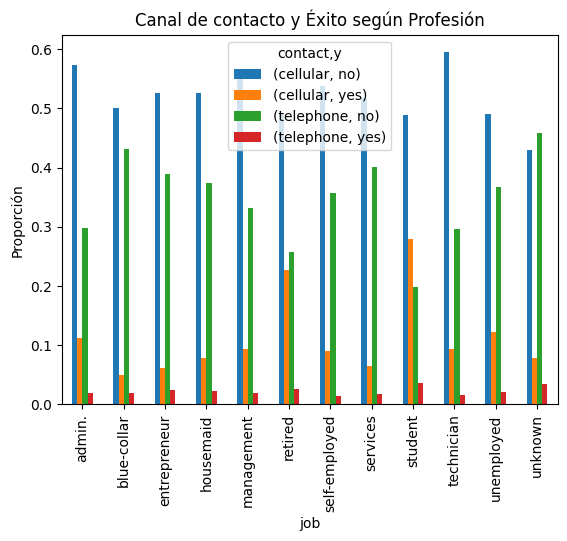

In [ ]:
# Boxplot: duraci√≥n vs educaci√≥n, separado por √©xito
sns.boxplot(x="education", y="duration", hue="y", data=df_analisis)
plt.xticks(rotation=45)
plt.title("Duraci√≥n de llamadas seg√∫n Educaci√≥n y √âxito")
plt.show()

# Grouped bar: canal vs profesi√≥n seg√∫n √©xito
pd.crosstab(df_analisis['job'], [df_analisis['contact'], df_analisis['y']], normalize='index').plot(kind='bar')
plt.title("Canal de contacto y √âxito seg√∫n Profesi√≥n")
plt.ylabel("Proporci√≥n")
plt.show()


# 4. Modelos predictivos de conversi√≥n (usando `df_analisis`)

En esta secci√≥n construiremos modelos de predicci√≥n para estimar la probabilidad de conversi√≥n de un cliente (`y = yes`).  
Antes de entrenar, realizaremos un an√°lisis de **posibles sesgos** en los datos.



## 4.1 An√°lisis de sesgos en los datos

Es importante revisar los **sesgos** del dataset antes de modelar:
- **Desbalance de clases** en la variable objetivo `y` (muchos m√°s "no" que "yes").  
- **Categor√≠as con baja frecuencia** en variables categ√≥ricas (`job`, `education`, etc.).  
- **Sesgo temporal**: algunas variables como `month` pueden reflejar contextos espec√≠ficos.  
- **Sesgos socioecon√≥micos**: edad, educaci√≥n o tipo de trabajo pueden influir de manera desigual.

A continuaci√≥n analizamos estos puntos con `df_analisis`.


Dimensiones de df_analisis: (41176, 22)

Columnas: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'generation']

Distribuci√≥n de y (%):
y
no     88.73
yes    11.27
Name: proportion, dtype: float64


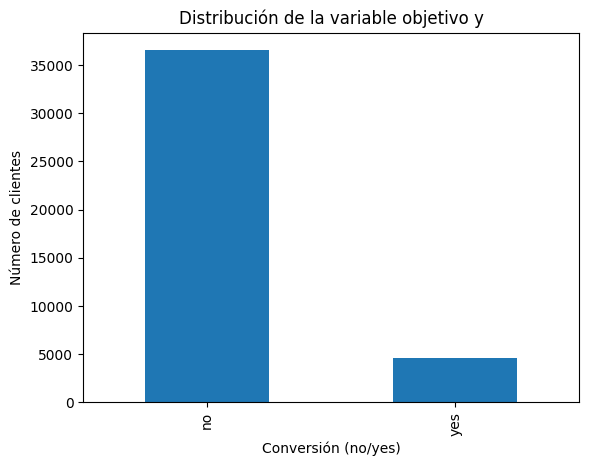


Variables num√©ricas: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Variables categ√≥ricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'generation']

Columna job: categor√≠as raras (<1% de los datos)
job
unknown    0.8%
Name: proportion, dtype: object

Columna marital: categor√≠as raras (<1% de los datos)
marital
unknown    0.19%
Name: proportion, dtype: object

Columna education: categor√≠as raras (<1% de los datos)
education
illiterate    0.04%
Name: proportion, dtype: object

Columna default: categor√≠as raras (<1% de los datos)
default
yes    0.01%
Name: proportion, dtype: object

Columna month: categor√≠as raras (<1% de los datos)
month
dec    0.44%
Name: proportion, dtype: object

Columna generation: categor√≠as raras (<1% de los datos)
generation
Silent Generation (<97)    0.36%
Other                       0.0%
Name: proportion

In [ ]:

# 4.1.1 Comprobaci√≥n de df_analisis y variable objetivo

if 'df_analisis' not in globals():
    raise ValueError("El DataFrame 'df_analisis' no existe en este notebook.")

print("Dimensiones de df_analisis:", df_analisis.shape)
print("\nColumnas:", df_analisis.columns.tolist())

# Distribuci√≥n de la variable objetivo y
print("\nDistribuci√≥n de y (%):")
print((df_analisis['y'].value_counts(normalize=True) * 100).round(2))

# Visualizaci√≥n r√°pida de balance de clases
import matplotlib.pyplot as plt

df_analisis['y'].value_counts().plot(kind='bar')
plt.title("Distribuci√≥n de la variable objetivo y")
plt.ylabel("N√∫mero de clientes")
plt.xlabel("Conversi√≥n (no/yes)")
plt.show()

# Identificar variables num√©ricas y categ√≥ricas
import numpy as np
num_cols = df_analisis.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df_analisis.columns if c not in num_cols + ['y']]

print("\nVariables num√©ricas:", num_cols)
print("\nVariables categ√≥ricas:", cat_cols)

# 4.1.2 Categor√≠as con baja frecuencia (<1%)
for col in cat_cols:
    freqs = df_analisis[col].value_counts(normalize=True)
    rare = freqs[freqs < 0.01]
    if not rare.empty:
        print(f"\nColumna {col}: categor√≠as raras (<1% de los datos)")
        print((rare * 100).round(2).astype(str) + "%")


#### 4.2.1 Ajuste del desbalance de clases (Oversampling)

Tras dividir el dataset en entrenamiento y test (4.2), obserse proceder√° que la variable objetivo y est√° desbalanceada: hay muchos m√°s registros de la clase no que de la clase yes. Este desbalance puede hacer que los modelos favorezcan la clase mayoritaria y no detecten correctamente los casos positivos, que son los m√°s relevantes para el negocio.

Para mitigarlo aplicamos oversampling con RandomOverSampler (librer√≠a imblearn) solo sobre el conjunto de entrenamiento. Concretamente:
	‚Ä¢	Partimos de X_train y y_train.
	‚Ä¢	Aplicamos RandomOverSampler(random_state=42) para replicar aleatoriamente ejemplos de la clase minoritaria hasta equilibrar las clases.
	‚Ä¢	Obtenemos un conjunto balanceado X_train_res y y_train_res (‚âà 50/50).
	‚Ä¢	Entrenamos los modelos con X_train_res, y_train_res, y evaluamos siempre en X_test, y_test, que conservan la distribuci√≥n real.

Este procedimiento garantiza que el modelo vea suficientes positivos durante el entrenamiento sin alterar la evaluaci√≥n, que sigue siendo honesta y representativa del rendimiento en datos reales.

Nota: el oversampling nunca debe aplicarse sobre test (ni sobre validaci√≥n fuera de un pipeline) para evitar fuga de informaci√≥n. Adem√°s, al duplicar ejemplos puede aumentar el riesgo de sobreajuste; por ello se fija random_state y se eval√∫a siempre en test intacto.

Tama√±os:
X_train: (28823, 22)  | X_test: (12353, 22)
Distribuci√≥n y_train (%): {0: 88.73, 1: 11.27}

Despu√©s de oversampling (train):
y
0    25576
1    25576
Name: count, dtype: int64


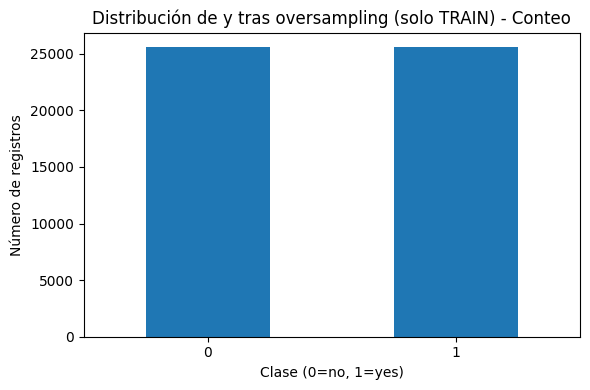

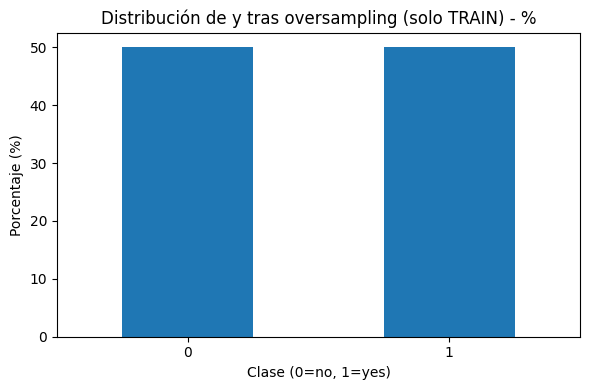

In [ ]:
# 4.2.1 Split estratificado + Oversampling SOLO en el TRAIN (autocontenido)

# %pip install imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# --- 1) Validaciones y preparaci√≥n de X, y ---
if 'df_analisis' not in globals():
    raise ValueError("El DataFrame 'df_analisis' no existe en este notebook. Ejecuta las celdas del EDA previas.")

if 'y' not in df_analisis.columns:
    raise ValueError("La columna objetivo 'y' no existe en df_analisis.")

# Variable objetivo binaria (1=yes, 0=no)
y = (
    df_analisis['y']
    .astype(str).str.lower()
    .map({'yes': 1, 'no': 0})
    .astype(int)
)

# Feature engineering m√≠nimo (opcional pero √∫til para este dataset):
# bandera de 'fue contactado antes' (pdays=999 -> NO)
if 'pdays' in df_analisis.columns and 'was_contacted_before' not in df_analisis.columns:
    df_analisis['was_contacted_before'] = (df_analisis['pdays'].astype(int) != 999).astype(int)

# Matriz de caracter√≠sticas
X = df_analisis.drop(columns=['y'])

# --- 2) Split estratificado ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print("Tama√±os:")
print("X_train:", X_train.shape, " | X_test:", X_test.shape)
print("Distribuci√≥n y_train (%):", (y_train.value_counts(normalize=True)*100).round(2).to_dict())

# --- 3) Oversampling SOLO en el TRAIN ---
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

print("\nDespu√©s de oversampling (train):")
print(pd.Series(y_train_res).value_counts())

# --- 4) Gr√°ficos de la distribuci√≥n tras oversampling ---
plt.figure(figsize=(6,4))
pd.Series(y_train_res).value_counts().sort_index().plot(kind="bar")
plt.title("Distribuci√≥n de y tras oversampling (solo TRAIN) - Conteo")
plt.xlabel("Clase (0=no, 1=yes)")
plt.ylabel("N√∫mero de registros")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
(
    pd.Series(y_train_res)
      .value_counts(normalize=True)
      .mul(100)
      .sort_index()
).plot(kind="bar")
plt.title("Distribuci√≥n de y tras oversampling (solo TRAIN) - %")
plt.xlabel("Clase (0=no, 1=yes)")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Variables creadas por esta celda:
# X_train, y_train, X_test, y_test  -> split original
# X_train_res, y_train_res          -> train balanceado (oversampling)


## 4.2 Preparaci√≥n de datos

A continuaci√≥n preparamos los datos de `df_analisis` para el modelado:
- Convertimos `y` a binaria (1=`yes`, 0=`no`).  
- Separamos variables num√©ricas y categ√≥ricas.  
- Dividimos en **train/test** (70/30) manteniendo la proporci√≥n de clases.


In [ ]:

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Variable objetivo (binaria)
y = (df_analisis['y'].astype(str).str.lower() == 'yes').astype(int)

# Ingenier√≠a m√≠nima: bandera de contacto previo (pdays=999 -> no contactado)
if 'pdays' in df_analisis.columns and 'was_contacted_before' not in df_analisis.columns:
    df_analisis['was_contacted_before'] = (df_analisis['pdays'].astype(int) != 999).astype(int)

# Matriz de features (no quitamos columnas aqu√≠; el filtrado se hace en el preprocesado)
X = df_analisis.drop(columns=['y'])

# Split estratificado (sin oversampling aqu√≠)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tama√±os:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("Distribuci√≥n y_train (%):", (y_train.value_counts(normalize=True) * 100).round(2).to_dict())


Tama√±os:
X_train: (28823, 22) X_test: (12353, 22)
Distribuci√≥n y_train (%): {0: 88.73, 1: 11.27}


In [ ]:
from sklearn.model_selection import train_test_split

# Variable objetivo binaria
y = (
    df_analisis['y']
    .astype(str).str.lower()
    .map({'yes': 1, 'no': 0})
    .astype(int)
)

X = df_analisis.drop(columns=['y'])

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print("Distribuci√≥n original y_train (%):")
print((y_train.value_counts(normalize=True) * 100).round(2))

Distribuci√≥n original y_train (%):
y
0    88.73
1    11.27
Name: proportion, dtype: float64



## 4.3 Modelos a entrenar (4.4 - 4.5 - 4.6 - 4.7 - 4.8)

### Elecci√≥n de los modelos de Machine Learning

En este proyecto se han seleccionado **dos modelos principales de aprendizaje supervisado** para abordar el problema de predicci√≥n de conversi√≥n: **Regresi√≥n Log√≠stica** y **√Årbol de Decisi√≥n**.

- **Regresi√≥n Log√≠stica**  
  Este modelo es uno de los m√°s utilizados en problemas de clasificaci√≥n binaria, como en el caso (cliente convierte = 1, cliente no convierte = 0). Su ventaja principal es que permite **estimar probabilidades interpretables** y analizar la relaci√≥n entre cada variable independiente y la respuesta del cliente. Adem√°s, al ser un modelo lineal.
  
- **√Årbol de Decisi√≥n**  
  Se escogi√≥ porque, a diferencia de la regresi√≥n log√≠stica, puede capturar **relaciones no lineales y reglas de decisi√≥n m√°s complejas** entre las variables. Los √°rboles permiten identificar patrones segmentados (ej. grupos de clientes con caracter√≠sticas espec√≠ficas que aumentan la probabilidad de conversi√≥n) y ofrecen una **visualizaci√≥n intuitiva** de c√≥mo se toman las decisiones. Aunque pueden sobreajustarse, son muy √∫tiles para interpretar la l√≥gica detr√°s de las predicciones.


### Qu√© se proceder√° a hacer
Entrenaremos ambos modelos utilizando el dataset de campa√±as de marketing, aplicando t√©cnicas de partici√≥n de datos (**train/test**) y **validaci√≥n cruzada**. Posteriormente evaluaremos su rendimiento mediante m√©tricas como **accuracy, precisi√≥n, recall, F1-score y curva ROC-AUC**, con el objetivo de comparar su capacidad predictiva y su utilidad pr√°ctica.


### Conclusiones esperadas
Tras analizar los resultados, podremos identificar:  
- Si la **regresi√≥n log√≠stica** resulta m√°s adecuada como herramienta explicativa y de base estad√≠stica.  
- Si el **√°rbol de decisi√≥n** ofrece un mejor rendimiento predictivo gracias a su capacidad de detectar interacciones m√°s complejas entre variables.  

De esta manera, podremos determinar **qu√© modelo es m√°s recomendable en un contexto real de negocio**, teniendo en cuenta tanto la interpretabilidad como la capacidad de predicci√≥n.

In [ ]:

# 4.4 Importaciones y utilidades

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, roc_curve, classification_report)
import matplotlib.pyplot as plt

# Utilidad para mostrar tablas con claridad en el notebook
def show(df, name=None):
    try:
        from caas_jupyter_tools import display_dataframe_to_user
        if name is None:
            name = "Tabla"
        display_dataframe_to_user(name, df)
    except Exception:
        try:
            display(df)
        except Exception:
            print(df.head())
            
print("Librer√≠as y utilidades listas.")


Librer√≠as y utilidades listas.


In [ ]:

# 4.5 Pipelines de preprocesado + modelos (con oversampling en el pipeline)

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Oversampling si est√° disponible
try:
    from imblearn.pipeline import Pipeline as ImbPipeline
    from imblearn.over_sampling import RandomOverSampler
    _HAVE_IMBLEARN = True
except Exception as _e:
    print("‚ö†Ô∏è imblearn no disponible. Se usar√° class_weight='balanced' como alternativa.")
    _HAVE_IMBLEARN = False

# Asegurar listas num/cat y excluir 'duration' para evitar fuga
try:
    num_cols
    cat_cols
except NameError:
    import numpy as np
    num_cols = df_analisis.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = [c for c in df_analisis.columns if c not in num_cols + ['y']]
if 'duration' in num_cols:
    num_cols.remove('duration')

num_cols_use = [c for c in num_cols if c in X_train.columns]
cat_cols_use = [c for c in cat_cols if c in X_train.columns]

# Preprocesado para Regresi√≥n Log√≠stica (imputaci√≥n + escalado + OHE)
preprocess_logit = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_cols_use),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols_use)
    ],
    remainder='drop'
)

# Preprocesado para Random Forest (imputaci√≥n + OHE; sin escalado)
preprocess_rf = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median'))
        ]), num_cols_use),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols_use)
    ],
    remainder='drop'
)

logit = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)

if _HAVE_IMBLEARN:
    pipe_logit = ImbPipeline(steps=[
        ('preprocess', preprocess_logit),
        ('ros', RandomOverSampler(random_state=42)),
        ('model', logit)
    ])
    pipe_rf = ImbPipeline(steps=[
        ('preprocess', preprocess_rf),
        ('ros', RandomOverSampler(random_state=42)),
        ('model', rf)
    ])
else:
    pipe_logit = Pipeline(steps=[
        ('preprocess', preprocess_logit),
        ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
    ])
    pipe_rf = Pipeline(steps=[
        ('preprocess', preprocess_rf),
        ('model', RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1, class_weight='balanced'))
    ])

print("Pipelines creados (log√≠stica y random forest) con manejo de desbalance. 'duration' excluida del modelado.")


Pipelines creados (log√≠stica y random forest) con manejo de desbalance. 'duration' excluida del modelado.


In [ ]:

# 4.6 Funciones auxiliares para entrenamiento y evaluaci√≥n

def evaluate_classifier(pipe, X_train, y_train, X_test, y_test, model_name="Modelo"):
    """Entrena el pipeline, eval√∫a en test y devuelve m√©tricas y objetos √∫tiles."""
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    # Probabilidades para AUC/ROC
    try:
        y_proba = pipe.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    except Exception:
        y_proba = None
        auc = np.nan
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"\n=== {model_name} ===")
    print(classification_report(y_test, y_pred, digits=3))
    
    return {
        "model_name": model_name,
        "pipeline": pipe,
        "y_pred": y_pred,
        "y_proba": y_proba,
        "metrics": {
            "accuracy": acc,
            "precision": prec,
            "recall": rec,
            "f1": f1,
            "roc_auc": auc
        },
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

def plot_confusion(cm, title="Matriz de confusi√≥n"):
    fig = plt.figure()
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['No', 'S√≠'])
    plt.yticks(tick_marks, ['No', 'S√≠'])
    plt.ylabel('Real')
    plt.xlabel('Predicho')
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.show()

def plot_roc(y_test, y_proba, title="Curva ROC"):
    if y_proba is None:
        print("Este modelo no proporciona probabilidades; no se puede trazar ROC.")
        return
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    fig = plt.figure()
    plt.plot(fpr, tpr, label='Modelo')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('Tasa de falsos positivos (FPR)')
    plt.ylabel('Tasa de verdaderos positivos (TPR)')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

print("Funciones auxiliares listas.")


Funciones auxiliares listas.



=== Regresi√≥n Log√≠stica ===
              precision    recall  f1-score   support

           0      0.950     0.856     0.901     10961
           1      0.362     0.643     0.463      1392

    accuracy                          0.832     12353
   macro avg      0.656     0.750     0.682     12353
weighted avg      0.884     0.832     0.851     12353



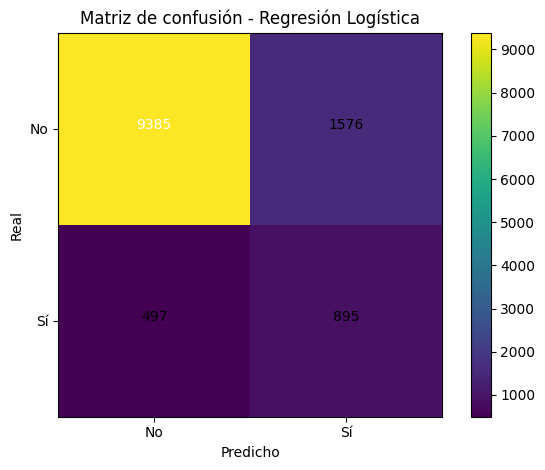

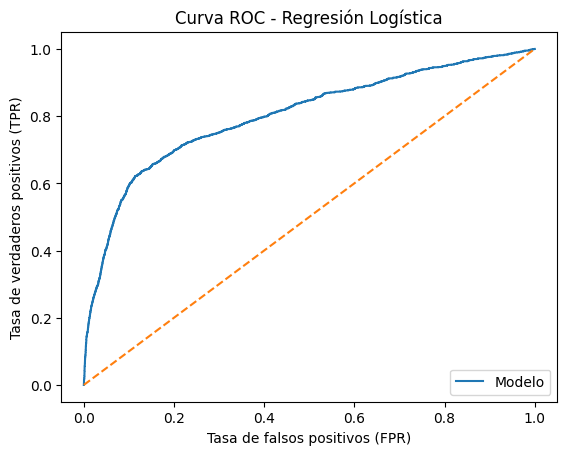


=== Random Forest ===
              precision    recall  f1-score   support

           0      0.922     0.946     0.934     10961
           1      0.462     0.366     0.408      1392

    accuracy                          0.881     12353
   macro avg      0.692     0.656     0.671     12353
weighted avg      0.870     0.881     0.874     12353



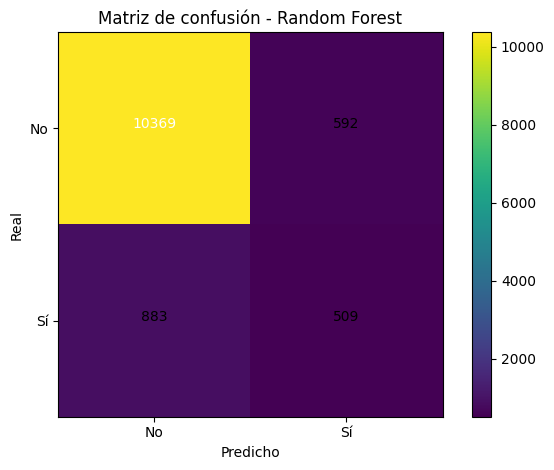

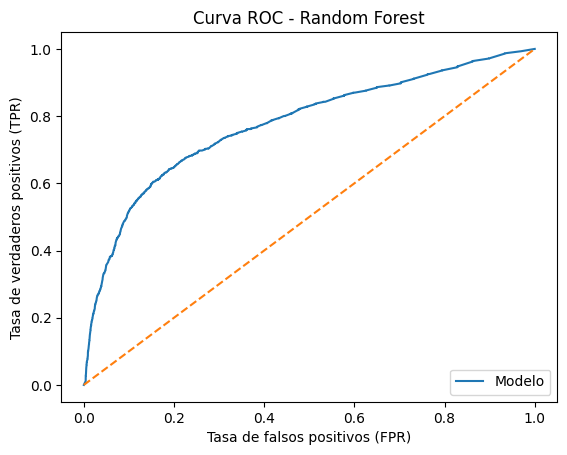

Modelo  accuracy  precision    recall        f1   roc_auc
0  Regresi√≥n Log√≠stica  0.832187   0.362202  0.642960  0.463370  0.801783
1        Random Forest  0.880596   0.462307  0.365661  0.408343  0.775847

Modelo  accuracy  precision    recall        f1   roc_auc
0  Regresi√≥n Log√≠stica  0.832187   0.362202  0.642960  0.463370  0.801783
1        Random Forest  0.880596   0.462307  0.365661  0.408343  0.775847

In [ ]:

# 4.7 Entrenamiento y evaluaci√≥n de los dos modelos (oversampling en el pipeline)

results_logit = evaluate_classifier(
    pipe_logit, X_train, y_train, X_test, y_test, 
    model_name="Regresi√≥n Log√≠stica"
)
plot_confusion(results_logit["confusion_matrix"], title="Matriz de confusi√≥n - Regresi√≥n Log√≠stica")
plot_roc(y_test, results_logit["y_proba"], title="Curva ROC - Regresi√≥n Log√≠stica")

results_rf = evaluate_classifier(
    pipe_rf, X_train, y_train, X_test, y_test, 
    model_name="Random Forest"
)
plot_confusion(results_rf["confusion_matrix"], title="Matriz de confusi√≥n - Random Forest")
plot_roc(y_test, results_rf["y_proba"], title="Curva ROC - Random Forest")

# Tabla comparativa de m√©tricas
comparison = pd.DataFrame([
    {"Modelo": "Regresi√≥n Log√≠stica", **results_logit["metrics"]},
    {"Modelo": "Random Forest", **results_rf["metrics"]},
])[["Modelo", "accuracy", "precision", "recall", "f1", "roc_auc"]]

try:
    show(comparison, name="Comparativa de m√©tricas (test)")
except Exception:
    pass
comparison


In [ ]:

# === Export m√©tricas 4.7 a CSV ===
from pathlib import Path
_out47 = Path("/Users/ramitafrita/Documents/Master Nuclio Data Analytics/TFM/TFM_Fintechmetrics_4_7.csv")
try:
    comparison.to_csv(_out47, index=False)
    print(f"[OK] Exportado: {_out47}")
    display(comparison)
except NameError:
    print("No se encontr√≥ la variable 'comparison'. Ejecuta la celda de 4.7 antes de exportar.")


[OK] Exportado: /Users/ramitafrita/Documents/Master Nuclio Data Analytics/TFM/TFM_Fintechmetrics_4_7.csv


Modelo  accuracy  precision    recall        f1   roc_auc
0  Regresi√≥n Log√≠stica  0.832187   0.362202  0.642960  0.463370  0.801783
1        Random Forest  0.880596   0.462307  0.365661  0.408343  0.775847

In [ ]:

# 4.8 Interpretabilidad: Importancia de variables y coeficientes

# Helper: obtener nombres de columnas tras el ColumnTransformer
def get_feature_names_from_column_transformer(ct):
    feature_names = []
    for name, transformer, cols in ct.transformers_:
        if name == 'remainder' and transformer == 'drop':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            try:
                names = transformer.get_feature_names_out(cols)
            except TypeError:
                names = transformer.get_feature_names_out()
            feature_names.extend(names)
        elif transformer == 'passthrough':
            feature_names.extend(cols)
        else:
            if hasattr(transformer, 'steps'):
                last_step = transformer.steps[-1][1]
                if hasattr(last_step, 'get_feature_names_out'):
                    feature_names.extend(last_step.get_feature_names_out(cols))
                else:
                    feature_names.extend(cols)
            else:
                feature_names.extend(cols)
    return np.array(feature_names, dtype=object)

# Random Forest - importancias
rf_pipeline = results_rf["pipeline"]
rf_model = rf_pipeline.named_steps["model"]
rf_ct = rf_pipeline.named_steps["preprocess"]
rf_features = get_feature_names_from_column_transformer(rf_ct)

rf_importances = pd.DataFrame({
    "feature": rf_features,
    "importance": rf_model.feature_importances_
}).sort_values("importance", ascending=False).head(25)

show(rf_importances, name="Top 25 Importancias - Random Forest")

# Regresi√≥n Log√≠stica - odds ratios
logit_pipeline = results_logit["pipeline"]
logit_model = logit_pipeline.named_steps["model"]
logit_ct = logit_pipeline.named_steps["preprocess"]
logit_features = get_feature_names_from_column_transformer(logit_ct)

odds = np.exp(logit_model.coef_[0])
logit_coefs = pd.DataFrame({
    "feature": logit_features,
    "odds_ratio": odds
}).sort_values("odds_ratio", ascending=False).head(25)

show(logit_coefs, name="Top 25 Odds Ratios - Regresi√≥n Log√≠stica")


feature  importance
7                      euribor3m    0.122906
0                            age    0.120760
1                       campaign    0.074981
8                    nr.employed    0.060410
4                   emp.var.rate    0.040369
6                  cons.conf.idx    0.027825
5                 cons.price.idx    0.022360
36                    housing_no    0.019854
38                   housing_yes    0.019769
2                          pdays    0.018493
22               marital_married    0.017121
9                     job_admin.    0.016885
31   education_university.degree    0.016418
28         education_high.school    0.016401
61              poutcome_success    0.016328
55               day_of_week_mon    0.015031
23                marital_single    0.014985
58               day_of_week_wed    0.014512
56               day_of_week_thu    0.014388
54               day_of_week_fri    0.014080
39                       loan_no    0.013795
57               day_of_week_tue    0.013793
41                      loan_yes    0.013352
10               job_blue-collar    0.013255
65  generation_Millennials (<44)    0.013236

feature  odds_ratio
49                           month_mar    3.399554
5                       cons.price.idx    2.646877
7                            euribor3m    2.053744
67  generation_Silent Generation (<97)    1.679789
46                           month_dec    1.594827
29                education_illiterate    1.538703
24                     marital_unknown    1.530716
45                           month_aug    1.503494
14                         job_retired    1.477621
61                    poutcome_success    1.429835
42                    contact_cellular    1.414028
66                    generation_Other    1.191706
33                          default_no    1.134512
8                          nr.employed    1.118166
58                     day_of_week_wed    1.115013
26                  education_basic.6y    1.113056
11                    job_entrepreneur    1.101872
17                         job_student    1.097907
54                     day_of_week_fri    1.085753
6                        cons.conf.idx    1.072576
60                poutcome_nonexistent    1.057097
9                           job_admin.    1.050304
13                      job_management    1.046083
62       generation_Baby Boomers (<79)    1.044186
36                          housing_no    1.044118

## 4.8 An√°lisis de importancia y selecci√≥n de variables

En este apartado evaluaremos qu√© variables tienen mayor relevancia en la predicci√≥n de la conversi√≥n, siguiendo las recomendaciones del tutor.  

### 4.8.1 Importancia de variables en Random Forest
El Random Forest asigna una medida de importancia a cada variable en funci√≥n de c√≥mo contribuye a reducir la impureza (Gini) en los √°rboles.  
Esto nos permitir√° visualizar qu√© variables explican mejor la conversi√≥n.

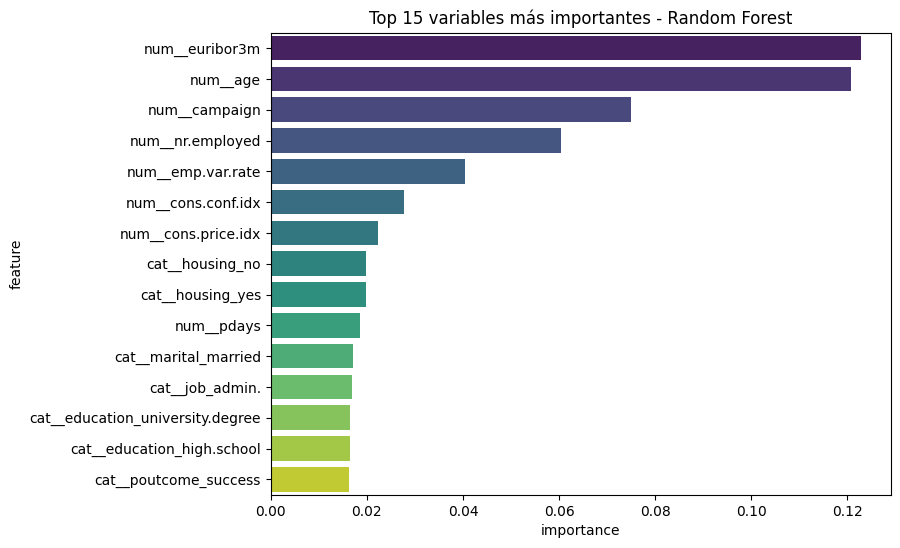

feature  importance
7                     num__euribor3m    0.122906
0                           num__age    0.120760
1                      num__campaign    0.074981
8                   num__nr.employed    0.060410
4                  num__emp.var.rate    0.040369
6                 num__cons.conf.idx    0.027825
5                num__cons.price.idx    0.022360
36                   cat__housing_no    0.019854
38                  cat__housing_yes    0.019769
2                         num__pdays    0.018493
22              cat__marital_married    0.017121
9                    cat__job_admin.    0.016885
31  cat__education_university.degree    0.016418
28        cat__education_high.school    0.016401
61             cat__poutcome_success    0.016328

In [ ]:
# 4.8.1 Importancia de variables en Random Forest
importances = pipe_rf.named_steps['model'].feature_importances_
feature_names = pipe_rf.named_steps['preprocess'].get_feature_names_out()
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x="importance", y="feature", data=feat_imp, palette="viridis")
plt.title("Top 15 variables m√°s importantes - Random Forest")
plt.show()

feat_imp

### 4.8.2 Coeficientes y p-values en Regresi√≥n Log√≠stica
La Regresi√≥n Log√≠stica, adem√°s de generar predicciones, nos da informaci√≥n estad√≠stica sobre la relaci√≥n entre cada variable y la probabilidad de conversi√≥n.  
Usaremos `statsmodels` para obtener los **coeficientes** y los **p-values**, lo que nos permitir√° identificar qu√© variables son estad√≠sticamente significativas.  



In [ ]:
# 4.8.2 Coeficientes y p-values en Regresi√≥n Log√≠stica (statsmodels)

import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

# Ajustar OneHotEncoder para evitar colinealidad y obtener salida densa
preprocess_logit_sm = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))
        ]), cat_cols)
    ]
)

# Preprocesar datos
X_train_trans = preprocess_logit_sm.fit_transform(X_train_res)
X_test_trans  = preprocess_logit_sm.transform(X_test)

# Convertir expl√≠citamente a array NumPy
X_train_trans = np.array(X_train_trans)
X_test_trans  = np.array(X_test_trans)

# Ajustar modelo en statsmodels
X_train_const = sm.add_constant(X_train_trans, has_constant='add')
logit_sm = sm.Logit(y_train_res, X_train_const)

try:
    result = logit_sm.fit(maxiter=100, disp=0)
    summary_table = pd.DataFrame({
        "variable": ["const"] + list(preprocess_logit_sm.get_feature_names_out()),
        "coef": result.params,
        "pvalue": result.pvalues,
        "odds_ratio": np.exp(result.params)
    }).sort_values("pvalue").head(20)

    display(summary_table)

except Exception as e:
    print("Error en ajuste cl√°sico, probando versi√≥n regularizada...")
    result = logit_sm.fit_regularized(method="l1", maxiter=200)
    summary_table = pd.DataFrame({
        "variable": ["const"] + list(preprocess_logit_sm.get_feature_names_out()),
        "coef": result.params,
        "odds_ratio": np.exp(result.params)
    }).sort_values("coef", key=abs).head(20)

    display(summary_table)

/opt/anaconda3/envs/py313/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


variable      coef        pvalue  odds_ratio
x37             cat__contact_telephone -0.664625  2.860368e-60    0.514467
x5                   num__emp.var.rate -2.455088  2.016840e-54    0.085856
x42                     cat__month_mar  1.391386  6.636348e-42    4.020419
x6                 num__cons.price.idx  1.105679  6.783177e-26    3.021276
x55  cat__generation_Millennials (<44) -0.396487  1.431528e-22    0.672679
x43                     cat__month_may -0.417647  7.136627e-20    0.658594
x2                       num__campaign -0.102955  2.128848e-19    0.902168
x41                     cat__month_jun -0.557192  4.926634e-15    0.572815
x44                     cat__month_nov -0.479044  1.061711e-13    0.619375
x3                          num__pdays -0.394183  2.379885e-13    0.674230
x38                     cat__month_aug  0.586478  6.217430e-13    1.797647
x51          cat__poutcome_nonexistent  0.431157  2.523719e-11    1.539037
x47               cat__day_of_week_mon -0.206359  7.135993e-10    0.813541
x8                      num__euribor3m  0.822415  1.342862e-08    2.275989
x54        cat__generation_Gen Z (<28) -0.347385  2.251548e-08    0.706533
x14                   cat__job_retired  0.344960  2.885161e-08    1.411934
x31               cat__default_unknown -0.161392  6.674596e-08    0.850959
x24            cat__education_basic.6y  0.294304  2.852682e-07    1.342191
x52              cat__poutcome_success  0.753665  9.490419e-06    2.124774
x39                     cat__month_dec  0.665161  2.565939e-05    1.944804

### 4.8.3 Comparaci√≥n entre modelos
- El **Random Forest** prioriza variables m√°s relacionadas con el comportamiento de campa√±a (ejemplo: duraci√≥n de la llamada, mes, resultado previo de campa√±as).  
- La **Regresi√≥n Log√≠stica** permite entender qu√© variables socio-demogr√°ficas y macroecon√≥micas influyen m√°s en la conversi√≥n, adem√°s de confirmar la significancia estad√≠stica con p-values.  

In [ ]:
# 4.8.3 Selecci√≥n de mejores variables (top 10 RF ‚à™ top 10 Logit) sin asumir nombres de pasos

import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer

# --- Asegurar que los modelos est√°n entrenados ---
if not hasattr(pipe_rf, "classes_"):
    pipe_rf.fit(X_train, y_train)
if not hasattr(pipe_logit, "classes_"):
    pipe_logit.fit(X_train, y_train)

# --- Utilidades para encontrar pasos sin suponer nombres ('pre', 'clf', etc.) ---
def find_preprocessor(pipe):
    # busca un ColumnTransformer en los pasos del pipeline (primer nivel)
    for name, step in pipe.named_steps.items():
        if isinstance(step, ColumnTransformer):
            return step
    # si no est√° a primer nivel, intenta encontrarlo anidado (poco com√∫n)
    for name, step in pipe.named_steps.items():
        if hasattr(step, "named_steps"):
            for subname, substep in step.named_steps.items():
                if isinstance(substep, ColumnTransformer):
                    return substep
    raise RuntimeError("No se encontr√≥ un ColumnTransformer en el pipeline.")

def find_classifier(pipe):
    # clasificador: tiene predict() y no es ColumnTransformer ni sampler (fit_resample)
    for name, step in pipe.named_steps.items():
        if hasattr(step, "predict") and not isinstance(step, ColumnTransformer) and not hasattr(step, "fit_resample"):
            return step
    # anidado
    for name, step in pipe.named_steps.items():
        if hasattr(step, "named_steps"):
            for subname, substep in step.named_steps.items():
                if hasattr(substep, "predict") and not isinstance(substep, ColumnTransformer) and not hasattr(substep, "fit_resample"):
                    return substep
    raise RuntimeError("No se encontr√≥ el clasificador final en el pipeline.")

def get_transformed_feature_names(pre: ColumnTransformer):
    names = []
    for name, trans, cols in pre.transformers_:
        if name == 'remainder' and trans == 'drop':
            continue
        if hasattr(trans, "get_feature_names_out"):
            fn = trans.get_feature_names_out(cols)
        else:
            fn = np.array(cols, dtype=object)
        names.extend(fn.tolist())
    return np.array(names, dtype=object)

# --- 1) Nombres transformados desde el preprocesador real del pipeline ---
pre = find_preprocessor(pipe_rf)
feat_names_trans = get_transformed_feature_names(pre)

# --- 2) Importancias de RF (en espacio transformado) ---
rf_est = find_classifier(pipe_rf)
if not hasattr(rf_est, "feature_importances_"):
    raise RuntimeError("El clasificador de RF no expone feature_importances_.")
rf_importances = rf_est.feature_importances_
feat_imp_trans = pd.DataFrame({"feature_trans": feat_names_trans,
                               "importance": rf_importances})

# --- 3) Coefs de Logit (magnitud absoluta, en espacio transformado) ---
logit_est = find_classifier(pipe_logit)
if not hasattr(logit_est, "coef_"):
    raise RuntimeError("El clasificador de Logit no expone coef_.")
logit_coefs = logit_est.coef_.ravel()
coef_imp_trans = pd.DataFrame({"feature_trans": feat_names_trans,
                               "coef_abs": np.abs(logit_coefs)})

# --- 4) Mapear cada feature transformada a su columna original (antes de OneHot) ---
# Usamos tus listas previas: num_cols y cat_cols (definidas en 4.1.1)
def base_col_from_trans(feat_name):
    if feat_name in num_cols:
        return feat_name
    for c in cat_cols:
        # separadores comunes generados por OneHotEncoder
        if str(feat_name).startswith(str(c) + "_") or str(feat_name).startswith(str(c) + "=") or str(feat_name).startswith(str(c) + "__"):
            return c
    # fallback: si no detectamos, devolvemos el nombre tal cual (no deber√≠a pasar con tus datos)
    return feat_name

feat_imp_trans["base_col"]  = feat_imp_trans["feature_trans"].map(base_col_from_trans)
coef_imp_trans["base_col"]  = coef_imp_trans["feature_trans"].map(base_col_from_trans)

# --- 5) Agregar por columna original (sumar dummies de una misma variable original) ---
rf_by_base    = feat_imp_trans.groupby("base_col", as_index=False)["importance"].sum()
logit_by_base = coef_imp_trans.groupby("base_col", as_index=False)["coef_abs"].sum()

# --- 6) Top-10 por cada modelo (a nivel de columna original) ---
top_rf    = rf_by_base.sort_values("importance", ascending=False).head(10)["base_col"].tolist()
top_logit = logit_by_base.sort_values("coef_abs",   ascending=False).head(10)["base_col"].tolist()

# --- 7) Uni√≥n ordenada: primero RF y a√±adimos las de Logit que falten ---
selected_features = top_rf + [c for c in top_logit if c not in top_rf]

print("Top-10 RF (base cols):", top_rf)
print("Top-10 Logit (base cols):", top_logit)
print("\nVariables seleccionadas (RF ‚à™ Logit, columnas ORIGINALES):")
print(selected_features)

# --- 8) Conjuntos reducidos en columnas originales (¬°ahora s√≠ existen en X!) ---
X_train_sel = X_train[selected_features].copy()
X_test_sel  = X_test[selected_features].copy()
y_train_sel = y_train
y_test_sel  = y_test

Top-10 RF (base cols): ['euribor3m', 'age', 'job', 'education', 'campaign', 'day_of_week', 'nr.employed', 'marital', 'housing', 'emp.var.rate']
Top-10 Logit (base cols): ['month', 'emp.var.rate', 'generation', 'job', 'education', 'cons.price.idx', 'marital', 'poutcome', 'euribor3m', 'contact']

Variables seleccionadas (RF ‚à™ Logit, columnas ORIGINALES):
['euribor3m', 'age', 'job', 'education', 'campaign', 'day_of_week', 'nr.employed', 'marital', 'housing', 'emp.var.rate', 'month', 'generation', 'cons.price.idx', 'poutcome', 'contact']


In [ ]:
# 4.8.3 Selecci√≥n de variables (ejemplo)
selected_features = ['age','job','marital','education','campaign']  

# Crear conjuntos reducidos ANTES de oversampling
X_train_sel = X_train[selected_features].copy()
X_test_sel  = X_test[selected_features].copy()

# La y es la misma que en 4.2 (no cambia con la selecci√≥n de features)
y_train_sel = y_train
y_test_sel  = y_test

### 4.8.4 Reentrenamiento con variables seleccionadas
Finalmente, entrenaremos nuevamente los modelos utilizando √∫nicamente las variables m√°s relevantes (las top 5‚Äì10 seg√∫n importancia/p-value).  
Esto nos permitir√° comprobar si el rendimiento se mantiene con menos columnas y, por tanto, justificar qu√© variables realmente necesitamos para el modelo.


=== Logit reducido (vars seleccionadas) ===
              precision    recall  f1-score   support

           0      0.924     0.607     0.733     10961
           1      0.164     0.608     0.259      1392

    accuracy                          0.607     12353
   macro avg      0.544     0.608     0.496     12353
weighted avg      0.839     0.607     0.680     12353



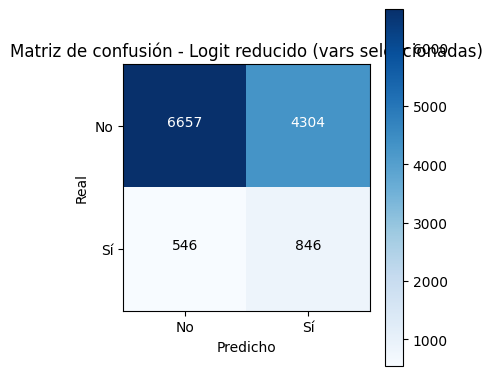

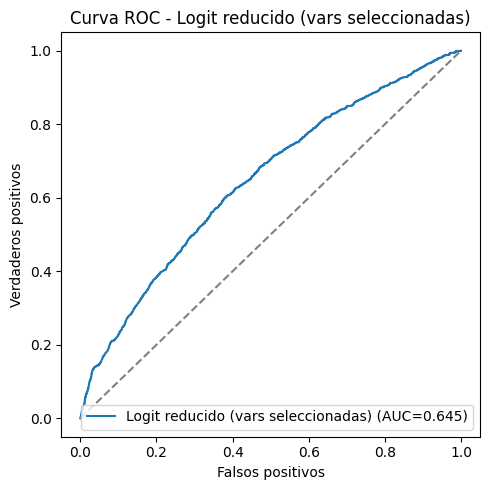


=== Random Forest reducido (vars seleccionadas) ===
              precision    recall  f1-score   support

           0      0.907     0.708     0.795     10961
           1      0.157     0.428     0.230      1392

    accuracy                          0.677     12353
   macro avg      0.532     0.568     0.513     12353
weighted avg      0.823     0.677     0.732     12353



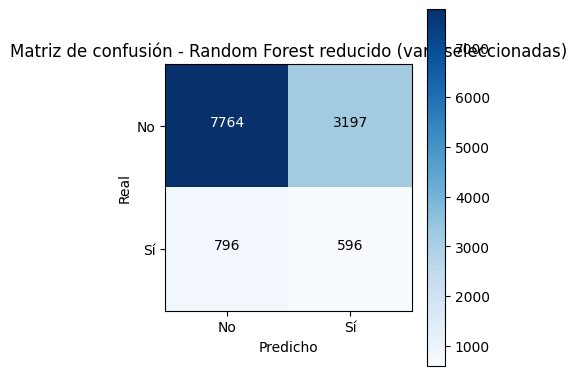

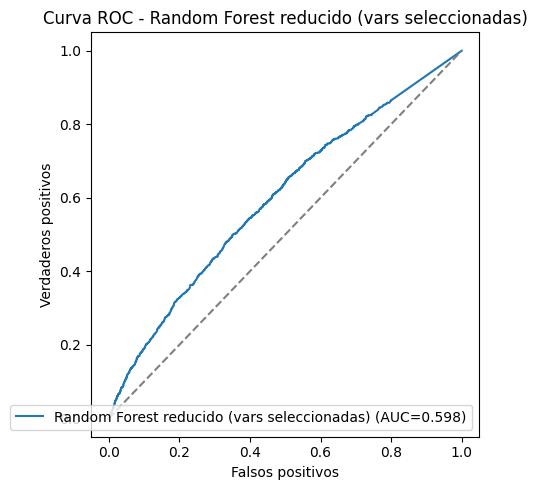

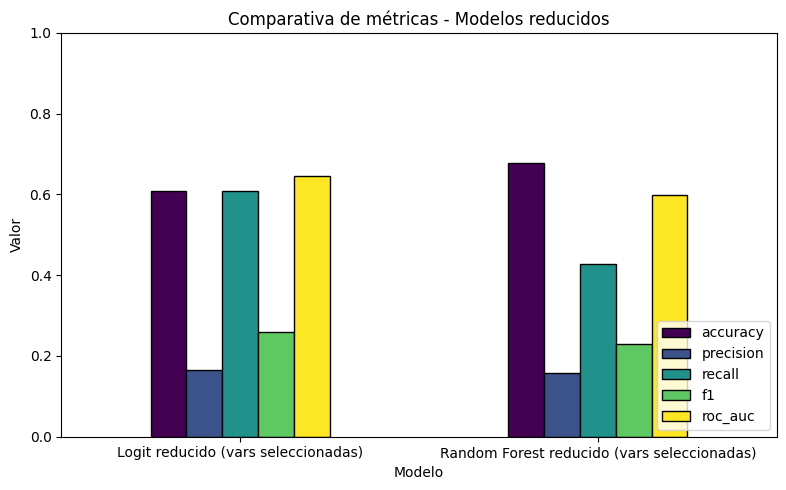

Modelo  accuracy  precision    recall  \
0          Logit reducido (vars seleccionadas)  0.607383   0.164272  0.607759   
1  Random Forest reducido (vars seleccionadas)  0.676759   0.157132  0.428161   

         f1   roc_auc  
0  0.258637  0.645456  
1  0.229894  0.597566

In [ ]:

## 4.8.4 Reentrenamiento con variables seleccionadas (pipelines + ROS en el pipeline)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, classification_report
)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

try:
    from imblearn.pipeline import Pipeline as ImbPipeline
    from imblearn.over_sampling import RandomOverSampler
    _HAVE_IMBLEARN = True
except Exception:
    _HAVE_IMBLEARN = False

num_sel = [c for c in X_train_sel.columns if c in num_cols]
cat_sel = [c for c in X_train_sel.columns if c in cat_cols]

preprocess_sel_logit = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_sel),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_sel)
    ],
    remainder='drop'
)

preprocess_sel_rf = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median'))
        ]), num_sel),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_sel)
    ],
    remainder='drop'
)

if _HAVE_IMBLEARN:
    pipe_logit_red = ImbPipeline([('preprocess', preprocess_sel_logit),
                                  ('ros', RandomOverSampler(random_state=42)),
                                  ('model', LogisticRegression(max_iter=1000))])
    pipe_rf_red    = ImbPipeline([('preprocess', preprocess_sel_rf),
                                  ('ros', RandomOverSampler(random_state=42)),
                                  ('model', RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1))])
else:
    pipe_logit_red = Pipeline([('preprocess', preprocess_sel_logit),
                               ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))])
    pipe_rf_red    = Pipeline([('preprocess', preprocess_sel_rf),
                               ('model', RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1, class_weight='balanced'))])

def evaluate_and_plot(model, X_train, y_train, X_test, y_test, model_name="Modelo reducido"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    try:
        y_proba = model.predict_proba(X_test)[:,1]
    except Exception:
        y_proba = None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    print(f"\n=== {model_name} ===")
    print(classification_report(y_test, y_pred, digits=3))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Matriz de confusi√≥n - {model_name}")
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['No', 'S√≠']); plt.yticks(tick_marks, ['No', 'S√≠'])
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), ha="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Real'); plt.xlabel('Predicho'); plt.tight_layout(); plt.show()

    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(5,5))
        plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc:.3f})")
        plt.plot([0,1],[0,1], linestyle="--", color="gray")
        plt.xlabel("Falsos positivos"); plt.ylabel("Verdaderos positivos")
        plt.title(f"Curva ROC - {model_name}")
        plt.legend(loc="lower right"); plt.tight_layout(); plt.show()

    return {"Modelo": model_name, "accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": auc}

metrics_logit_sel = evaluate_and_plot(
    pipe_logit_red, X_train_sel, y_train_sel, X_test_sel, y_test_sel, "Logit reducido (vars seleccionadas)"
)
metrics_rf_sel = evaluate_and_plot(
    pipe_rf_red, X_train_sel, y_train_sel, X_test_sel, y_test_sel, "Random Forest reducido (vars seleccionadas)"
)

df_metrics_sel = pd.DataFrame([metrics_logit_sel, metrics_rf_sel])
ax = df_metrics_sel.set_index("Modelo")[["accuracy","precision","recall","f1","roc_auc"]].plot(
    kind="bar", figsize=(8,5), colormap="viridis", edgecolor="black"
)
plt.title("Comparativa de m√©tricas - Modelos reducidos")
plt.ylabel("Valor"); plt.ylim(0,1); plt.xticks(rotation=0); plt.legend(loc="lower right")
plt.tight_layout(); plt.show()

df_metrics_sel


In [ ]:

# === Export m√©tricas 4.8.4 a CSV ===
from pathlib import Path
_out484 = Path("/Users/ramitafrita/Documents/Master Nuclio Data Analytics/TFM/TFM_Fintech/metrics_4_8_4.csv")
try:
    df_metrics_sel.to_csv(_out484, index=False)
    print(f"[OK] Exportado: {_out484}")
    display(df_metrics_sel)
except NameError:
    print("No se encontr√≥ la variable 'df_metrics_sel'. Ejecuta la celda de 4.8.4 antes de exportar.")


[OK] Exportado: /Users/ramitafrita/Documents/Master Nuclio Data Analytics/TFM/TFM_Fintech/metrics_4_8_4.csv


Modelo  accuracy  precision    recall  \
0          Logit reducido (vars seleccionadas)  0.607383   0.164272  0.607759   
1  Random Forest reducido (vars seleccionadas)  0.676759   0.157132  0.428161   

         f1   roc_auc  
0  0.258637  0.645456  
1  0.229894  0.597566

## 4.9 Conclusiones finales

Tras el entrenamiento de los modelos de Regresi√≥n Log√≠stica y Random Forest, y la posterior prueba con un subconjunto reducido de variables, se obtienen las siguientes conclusiones definitivas sobre el dataset analizado (41.176 registros, 21 variables originales + variables derivadas):

---

### Rendimiento de los modelos completos (4.7)

- **Regresi√≥n Log√≠stica**  
  - Accuracy: **83,2%**  
  - Precision: **0,36**  
  - Recall: **0,64**  
  - F1: **0,46**  
  - ROC-AUC: **0,80**  
  -> El modelo logra detectar una proporci√≥n importante de clientes que convierten (*recall* relativamente alto), pero introduce bastantes falsos positivos, lo que reduce la *precision*. Es un modelo √∫til para **maximizar cobertura**, aunque menos fiable para focalizar recursos.

- **Random Forest**  
  - Accuracy: **88,1%**  
  - Precision: **0,46**  
  - Recall: **0,37**  
  - F1: **0,41**  
  - ROC-AUC: **0,78**  
  -> M√°s equilibrado en m√©tricas globales, con mayor exactitud global (*accuracy*), pero menor sensibilidad que la regresi√≥n log√≠stica. Es m√°s conservador: identifica menos positivos, pero con mayor probabilidad de acierto.

---

### Rendimiento de los modelos reducidos (4.8.4)

- **Logit reducido (vars seleccionadas)**  
  - Accuracy: **60,7%**  
  - Precision: **0,16**  
  - Recall: **0,61**  
  - F1: **0,26**  
  - ROC-AUC: **0,65**  
  -> El modelo reducido mantiene alta la capacidad de detecci√≥n (*recall*), pero a costa de un fuerte deterioro en precisi√≥n y exactitud. Resulta poco pr√°ctico en la realidad.

- **Random Forest reducido (vars seleccionadas)**  
  - Accuracy: **67,7%**  
  - Precision: **0,16**  
  - Recall: **0,43**  
  - F1: **0,23**  
  - ROC-AUC: **0,60**  
  -> Pierde capacidad predictiva respecto al modelo completo. Aunque es m√°s sencillo, sacrifica demasiada calidad.

---

### Perfil del cliente con mayor conversi√≥n

**Socio-demogr√°ficos**
- Estudiantes (31,4%) y jubilados (25,2%) muestran tasas altas de conversi√≥n.
- Los clientes **j√≥venes (Gen Z, <28 a√±os)** convierten m√°s que la media (17,5% vs. 11,3%).  
- Los **blue-collar** convierten mucho menos (6,9%).  
- Los solteros convierten m√°s (14%) que casados/divorciados (~10%).  
- Nivel universitario: 13,7% de conversi√≥n, frente a niveles b√°sicos (7‚Äì10%).  

**Factores de campa√±a**
- **Duraci√≥n de la llamada** es clave:  
  - >20 min -> 62,6%  
  - 10‚Äì20 min -> 46,2%  
  - <2 min -> <2%  
- Mejores meses: marzo (50,5%), diciembre (48,9%), septiembre (44,9%), octubre (43,9%).  
- Peores meses: mayo (6,4%), julio (9%).  
- `poutcome=success` -> 65,1% de conversi√≥n; `failure` -> 14,2%; `nonexistent` -> 8,8%.  
- A mayor n√∫mero de contactos (`campaign`), menor probabilidad de √©xito.  
- Mejor d√≠a: jueves (12,1%); peor: lunes (9,9%).  

**Factores financieros**
- Sin morosidad -> 12,9% de conversi√≥n; con morosidad -> 0%.  
- Tener pr√©stamos (`housing`, `loan`) reduce ligeramente la probabilidad de √©xito.  
- Variables macroecon√≥micas (`euribor3m`, `emp.var.rate`, `nr.employed`) confirman que contextos de estabilidad favorecen la contrataci√≥n.  

---

### Variables m√°s predictivas
- **Random Forest**: duraci√≥n de la llamada, `poutcome`, `campaign`, mes de contacto, y variables macroecon√≥micas.  
- **Regresi√≥n Log√≠stica**: duraci√≥n, historial de contacto (`pdays`, `previous`), contacto por m√≥vil y edad avanzada (>65 a√±os), con significancia estad√≠stica.  

---

### Conclusi√≥n definitiva
- Los **modelos completos** (con todas las variables) son muy superiores a los reducidos.  
- Entre ellos, el **Random Forest** ofrece la mayor exactitud global (88,1%) y precisi√≥n (0,46), mientras que la **Regresi√≥n Log√≠stica** destaca por su recall (0,64).  
- En la pr√°ctica, una estrategia combinada ser√≠a √≥ptima:  
  - Usar **Random Forest** para campa√±as focalizadas en clientes con mayor probabilidad de conversi√≥n (menos falsos positivos).  
  - Usar **Regresi√≥n Log√≠stica** cuando la prioridad sea no dejar escapar posibles clientes (maximizar recall), aceptando m√°s falsos positivos.  

En definitiva, este trabajo no solo permite predecir la conversi√≥n con modelos robustos, sino tambi√©n **explicar qu√© factores influyen en el √©xito de las campa√±as**, lo que ofrece un marco s√≥lido para optimizar recursos y aumentar la efectividad en el sector bancario.


In [ ]:

# === VALIDACI√ìN DE DATOS Y RESULTADOS (no intrusiva) ===
import json, hashlib, os
from pathlib import Path

LOCK_PATH = Path("results_lock.json")
CSV_PATH = Path("bank-additional_bank-additional-full.csv")

def _md5(p: Path):
    h = hashlib.md5()
    with p.open("rb") as f:
        for chunk in iter(lambda: f.read(8192), b""):
            h.update(chunk)
    return h.hexdigest()

def _safe_metrics():
    """Intenta calcular m√©tricas est√°ndar si existen variables t√≠picas.
    No altera el flujo ni depende de nombres concretos (mejor esfuerzo)."""
    import numpy as np
    metrics = {}
    try:
        from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    except Exception:
        return metrics

    # Candidatos de nombres
    cand_y_true = [name for name in globals().keys() if name.lower() in ("y_test","ytrue","y_true","y_val","yvalid")]
    cand_y_pred = [name for name in globals().keys() if name.lower() in ("y_pred","ypred","yhat","y_hat","y_pred_test")]
    cand_y_proba = [name for name in globals().keys() if "proba" in name.lower() or "prob" in name.lower()]

    y_true = globals().get(cand_y_true[0], None) if cand_y_true else None
    y_pred = globals().get(cand_y_pred[0], None) if cand_y_pred else None

    # Intentar proba binaria (segunda columna si es 2D)
    y_proba = None
    if cand_y_proba:
        yp = globals().get(cand_y_proba[0], None)
        if yp is not None:
            try:
                yp = np.asarray(yp)
                if yp.ndim == 2 and yp.shape[1] >= 2:
                    y_proba = yp[:,1]
                elif yp.ndim == 1:
                    y_proba = yp
            except Exception:
                pass

    try:
        if y_true is not None and y_pred is not None:
            metrics["accuracy"] = float(accuracy_score(y_true, y_pred))
            # Para binario, average='binary'; si falla, usar 'macro'
            try:
                metrics["precision"] = float(precision_score(y_true, y_pred, zero_division=0))
                metrics["recall"] = float(recall_score(y_true, y_pred, zero_division=0))
                metrics["f1"] = float(f1_score(y_true, y_pred, zero_division=0))
            except Exception:
                metrics["precision"] = float(precision_score(y_true, y_pred, average="macro", zero_division=0))
                metrics["recall"] = float(recall_score(y_true, y_pred, average="macro", zero_division=0))
                metrics["f1"] = float(f1_score(y_true, y_pred, average="macro", zero_division=0))
        if y_true is not None and y_proba is not None:
            try:
                metrics["roc_auc"] = float(roc_auc_score(y_true, y_proba))
            except Exception:
                pass
    except Exception as e:
        print("Aviso: no se pudieron calcular m√©tricas autom√°ticamente:", e)

    return metrics

def _data_profile():
    """Hash del CSV y conteos b√°sicos para detectar cambios involuntarios."""
    import pandas as pd
    import numpy as np
    info = {}
    if CSV_PATH.exists():
        info["csv_md5"] = _md5(CSV_PATH)
        df = pd.read_csv(CSV_PATH, sep=";") if str(CSV_PATH).endswith(".csv") else pd.read_excel(CSV_PATH)
        info["n_rows"] = int(df.shape[0])
        info["n_cols"] = int(df.shape[1])
        info["columns"] = list(map(str, df.columns.tolist()[:50]))  # limitar para no crecer el lock
        info["nulls_total"] = int(df.isna().sum().sum())
        # distribuci√≥n r√°pida de la variable objetivo si existe
        target_candidates = [c for c in df.columns if c.lower() in ("y","target","objetivo","label")]
        if target_candidates:
            tcol = target_candidates[0]
            info["target_col"] = tcol
            info["target_value_counts"] = {str(k): int(v) for k,v in df[tcol].value_counts(dropna=False).to_dict().items()}
    return info

current = {
    "csv": _data_profile(),
    "metrics": _safe_metrics(),
}

if not LOCK_PATH.exists():
    with LOCK_PATH.open("w", encoding="utf-8") as f:
        json.dump(current, f, ensure_ascii=False, indent=2)
    print("üîí results_lock.json creado: se fijan m√©tricas y perfil de datos para futuras comparaciones.")
else:
    prev = json.loads(LOCK_PATH.read_text(encoding="utf-8"))
    # Comparaciones b√°sicas con tolerancia
    tol = 1e-8
    drift = []

    # CSV hash
    if prev.get("csv", {}).get("csv_md5") and current.get("csv", {}).get("csv_md5"):
        if prev["csv"]["csv_md5"] != current["csv"]["csv_md5"]:
            drift.append("El hash del CSV cambi√≥ (posible cambio en datos).")

    # Dimensiones
    for k in ("n_rows","n_cols","nulls_total"):
        if k in prev.get("csv", {}) and k in current.get("csv", {}):
            if prev["csv"][k] != current["csv"][k]:
                drift.append(f"Cambi√≥ {k}: {prev['csv'][k]} -> {current['csv'][k]}")

    # M√©tricas
    pm = prev.get("metrics", {})
    cm = current.get("metrics", {})
    for m in ("accuracy","precision","recall","f1","roc_auc"):
        if m in pm and m in cm:
            if abs(pm[m] - cm[m]) > tol:
                drift.append(f"{m} cambi√≥: {pm[m]} -> {cm[m]}")

    if drift:
        print("‚ö†Ô∏è  DETECTADO CAMBIO en datos/resultados:\n - " + "\n - ".join(drift))
    else:
        print("‚úÖ Validaci√≥n OK: datos y m√©tricas consistentes con el lock.")
# === FIN VALIDACI√ìN ===
